In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
data = pd.read_csv('FF_FourthRev_SubsData v02.csv')

In [3]:
data


market_code  customer_id  subscription_id subscription_start_date  \
0               UK      2287026           564953              24/08/2021   
1               UK      2646497           761192              01/07/2022   
2               UK      2577429           647982              13/01/2022   
3               UK      2685035           759259              25/06/2022   
4               UK      2481431           610650              22/11/2021   
...            ...          ...              ...                     ...   
552398          UK      2712424           799500              18/12/2022   
552399          UK      2639626           702038              23/03/2022   
552400          UK      2639911           702362              23/03/2022   
552401          UK      2639850           717743              12/04/2022   
552402          UK      2640365           930901              01/11/2024   

       subscription_cancellation_date postcode_sector  \
0                          16/12/2021            CA13   
1                          02/08/2022            NE31   
2                          29/04/2022            EX16   
3                          15/05/2023             SW8   
4                                 NaN            TW18   
...                               ...             ...   
552398                     22/12/2022             BS6   
552399                            NaN             WS4   
552400                     16/06/2022            KT24   
552401                     15/06/2022            SE22   
552402                     28/11/2024              N6   

       acquisition_master_channel acquisition_channel acquisition_coupon_code  \
0                             NaN                 NaN                     NaN   
1                             NaN                 NaN                     NaN   
2                        Paid Web            Facebook               NEWYEAR15   
3                    Direct Sales                 F2F               50FLOWERY   
4                             RAF                 RAF               ANDYW9971   
...                           ...                 ...                     ...   
552398                        RAF    RAF- Box Voucher                  R44EM9   
552399                   Paid Web           PPC Brand               50FLOWERY   
552400                   Paid Web           PPC Brand               50FLOWERY   
552401                        NaN                 NaN                     NaN   
552402                        NaN                 NaN                     NaN   

       restart_master_channel  ... month_1_sub_total month_1_shop_total  \
0                    Restarts  ...               0.0                0.0   
1                    Restarts  ...              12.5                0.0   
2                         NaN  ...              17.5                0.0   
3                         NaN  ...              25.0                0.0   
4                         NaN  ...               0.0                0.0   
...                       ...  ...               ...                ...   
552398                    NaN  ...               0.0                0.0   
552399                    NaN  ...               0.0                0.0   
552400                    NaN  ...              25.0                0.0   
552401                    NaN  ...              25.0                0.0   
552402               Restarts  ...              15.6                0.0   

        month_2_sub_total month_2_shop_total month_3_sub_total  \
0                     0.0                0.0               0.0   
1                     0.0                0.0               0.0   
2                     0.0                0.0               0.0   
3                    25.0                0.0              25.0   
4                    12.5                0.0              25.0   
...                   ...                ...               ...   
552398                0.0                0.0               0.0   
552399 

# Sense check data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552403 entries, 0 to 552402
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   market_code                       552403 non-null  object 
 1   customer_id                       552403 non-null  int64  
 2   subscription_id                   552403 non-null  int64  
 3   subscription_start_date           552403 non-null  object 
 4   subscription_cancellation_date    478237 non-null  object 
 5   postcode_sector                   552086 non-null  object 
 6   acquisition_master_channel        378444 non-null  object 
 7   acquisition_channel               378444 non-null  object 
 8   acquisition_coupon_code           350466 non-null  object 
 9   restart_master_channel            143448 non-null  object 
 10  restart_channel                   143448 non-null  object 
 11  restart_coupon_code               111663 non-null  o

In [6]:
data.isnull().sum()

market_code                              0
customer_id                              0
subscription_id                          0
subscription_start_date                  0
subscription_cancellation_date       74166
postcode_sector                        317
acquisition_master_channel          173959
acquisition_channel                 173959
acquisition_coupon_code             201937
restart_master_channel              408955
restart_channel                     408955
restart_coupon_code                 440740
trip_number                              0
original_plan_frequency                  0
latest_plan_frequency                    0
original_product_tier                  102
latest_product_tier                    102
no_of_showstopper_boxes_received         0
email_optin_status                       0
email_unsubscribe_date              223014
raf_subscription_count                   0
raf_gift_count                           0
volume_of_RMF_ratings                    0
average_RMF

In [7]:
data.describe()

customer_id  subscription_id    trip_number  \
count  5.524030e+05     5.524030e+05  552403.000000   
mean   2.309615e+06     7.160742e+05       1.422242   
std    7.222664e+05     1.706794e+05       0.887235   
min    2.300000e+01     4.220010e+05       1.000000   
25%    2.271950e+06     5.686065e+05       1.000000   
50%    2.499690e+06     7.145920e+05       1.000000   
75%    2.692708e+06     8.627670e+05       2.000000   
max    3.013393e+06     1.013475e+06      31.000000   

       no_of_showstopper_boxes_received  raf_subscription_count  \
count                     552403.000000           552403.000000   
mean                           0.279274                0.297030   
std                            2.407947                1.585367   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.000000                0.000000   
75%                            0.000000                0.000000   
max                          171.000000              384.000000   

       raf_gift_count  volume_of_RMF_ratings  average_RMF_rating  \
count   552403.000000           552403.00000        52710.000000   
mean         0.004363                0.13806            4.130896   
std          0.381717                0.58346            1.063984   
min          0.000000                0.00000            1.000000   
25%          0.000000                0.00000            3.500000   
50%          0.000000                0.00000            4.500000   
75%          0.000000                0.00000            5.000000   
max        160.000000               69.00000            5.000000   

       order_error_tag_total  error_discount_total  month_1_sub_total  \
count          552403.000000         552403.000000      552403.000000   
mean                0.329292              2.161479          23.457998   
std                 0.884767              8.430719          23.145059   
min                 0.000000              0.000000         -25.000000   
25%                 0.000000              0.000000           0.000000   
50%                 0.000000              0.000000          24.600000   
75%                 0.000000              0.000000          36.400000   
max                59.000000            500.000000        1785.000000   

       month_1_shop_total  month_2_sub_total  month_2_shop_total  \
count       552403.000000      552403.000000       552403.000000   
mean             0.701027          16.392693            0.278648   
std              5.315656          23.125928            3.307636   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              0.000000          25.000000            0.000000   
max            605.000000         500.000000          320.000000   

       month_3_sub_total  month_3_shop_total  month_4_onwards_sub_total  \
count      552403.000000       552403.000000              552403.000000   
mean           12.377320            0.148688                 110.797898   
std            21.202113            2.435554                 344.579941   
min           -25.000000            0.000000                   0.000000   
25%             0.000000            0.000000                   0.000000   
50%             0.000000            0.000000                   0.000000   
75%            25.000000            0.000000                  50.000000   
max           600.000000          260.000000               15795.000000   

       month_4_onwards_shop_total  total_volume_sub  total_volume_shop  
count               552403.000000     552403.000000      552403.000000  
mean                     0.692334          7.186397           0.710548  
std                      6.790459         14.897743           1.207699  
min                      0.000000          0.000000     

## Data Types


#### Change data types for customer and sub id into objects

In [10]:
# from integer to object
data[['customer_id', 'subscription_id']] = data[['customer_id', 'subscription_id']].astype('object')


#### Datatime for dates

In [12]:
# from object to datetime

data['subscription_start_date'] = pd.to_datetime(data['subscription_start_date'], dayfirst=True)
data['subscription_cancellation_date'] = pd.to_datetime(data['subscription_cancellation_date'], dayfirst=True)


## Handling nulls

In [14]:
## Replace Postcode nulls with Unknown
data['postcode_sector'] = data['postcode_sector'].fillna('Unknown')

In [15]:
# Rename nulls in acquisition channels as Organic
data['acquisition_master_channel'] = data['acquisition_master_channel'].fillna('Organic')
data['acquisition_channel'] = data['acquisition_channel'].fillna('Organic')

In [16]:
# Replace nulls in the coupon columns with no coupon
data['acquisition_coupon_code'] = data['acquisition_coupon_code'].fillna('No Coupon')
data['restart_coupon_code'] = data['restart_coupon_code'].fillna('No Coupon')

In [17]:
# Replace nulls in the product tier with None (What are the nulls in the product column? Some have no sales at all, some have sales and no prouduct)
data['original_product_tier'] = data['original_product_tier'].fillna('None')
data['latest_product_tier'] = data['latest_product_tier'].fillna('None')


In [18]:
# Replace NaN in restart channes with Not Restarted
data['restart_master_channel'] = data['restart_master_channel'].fillna('Not Restarted')
data['restart_channel'] = data['restart_channel'].fillna('Not Restarted')

#### What are the nulls in the product column? Some have no sales at all, some have sales and no prouduct

In [20]:
## View the transformations
data.isnull().sum()

market_code                              0
customer_id                              0
subscription_id                          0
subscription_start_date                  0
subscription_cancellation_date       74166
postcode_sector                          0
acquisition_master_channel               0
acquisition_channel                      0
acquisition_coupon_code                  0
restart_master_channel                   0
restart_channel                          0
restart_coupon_code                      0
trip_number                              0
original_plan_frequency                  0
latest_plan_frequency                    0
original_product_tier                    0
latest_product_tier                      0
no_of_showstopper_boxes_received         0
email_optin_status                       0
email_unsubscribe_date              223014
raf_subscription_count                   0
raf_gift_count                           0
volume_of_RMF_ratings                    0
average_RMF

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552403 entries, 0 to 552402
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   market_code                       552403 non-null  object        
 1   customer_id                       552403 non-null  object        
 2   subscription_id                   552403 non-null  object        
 3   subscription_start_date           552403 non-null  datetime64[ns]
 4   subscription_cancellation_date    478237 non-null  datetime64[ns]
 5   postcode_sector                   552403 non-null  object        
 6   acquisition_master_channel        552403 non-null  object        
 7   acquisition_channel               552403 non-null  object        
 8   acquisition_coupon_code           552403 non-null  object        
 9   restart_master_channel            552403 non-null  object        
 10  restart_channel                 

## New columns


#### Calculate tenure (time a customer has stayed subscribed)

In [84]:

# Use cancellation date if present, otherwise use August 1 as last available date.
data['tenure_end'] = data['subscription_cancellation_date'].fillna(pd.Timestamp('1/08/2025'))

data['tenure_days'] = (data['tenure_end'] - data['subscription_start_date']).dt.days

# Tenure in months and years
data['tenure_months'] = data['tenure_days'] // 30
data['tenure_years'] = (data['tenure_days'] / 365).round(0)
data['tenure_weeks'] = (data['tenure_days'] / 7).round(0)


#### Active Customers column

In [87]:
## Create a column for customer who are still active
data['is_active'] = data['subscription_cancellation_date'].isnull().map({True: 'Active', False: 'Not Active'})


#### Customer spend totals

In [90]:
## Add total spend columns: 3 columns

# 1. Subscription only spend
data['total_sub_spend'] = (
    data['month_1_sub_total'] +
    data['month_2_sub_total'] +
    data['month_3_sub_total'] +
    data['month_4_onwards_sub_total']
)

# 2. Shop only spend
data['total_shop_spend'] = (
    data['month_1_shop_total'] +
    data['month_2_shop_total'] +
    data['month_3_shop_total'] +
    data['month_4_onwards_shop_total']
)

# 3. Total spend (subscriptions + shop)
data['total_spend'] = data['total_sub_spend'] + data['total_shop_spend']


##### Remove Rows with no sales

In [93]:
count_zero = (data['total_spend'] == 0).sum()
percent_zero = (count_zero / len(data)) * 100
print(f"Total spend = 0 is {count_zero:,} percentage of customers is({percent_zero:.2f}%)")


Total spend = 0 is 117,490 percentage of customers is(21.27%)


In [95]:
# Remove cusotmers who did not spend
data_c = data[data['total_spend'] != 0]

#### Average Spend

In [98]:
# Average spend per box (shop + subscirptipn)

data['avg_price_per_box'] = np.where(
    data['total_volume_sub'] > 0,
    data['total_spend'] / data['total_volume_sub'],
    np.nan
)

In [100]:
pd.set_option('display.max_columns', None)

data

market_code customer_id subscription_id subscription_start_date  \
0               UK     2287026          564953              2021-08-24   
1               UK     2646497          761192              2022-07-01   
2               UK     2577429          647982              2022-01-13   
3               UK     2685035          759259              2022-06-25   
4               UK     2481431          610650              2021-11-22   
...            ...         ...             ...                     ...   
552398          UK     2712424          799500              2022-12-18   
552399          UK     2639626          702038              2022-03-23   
552400          UK     2639911          702362              2022-03-23   
552401          UK     2639850          717743              2022-04-12   
552402          UK     2640365          930901              2024-11-01   

       subscription_cancellation_date postcode_sector  \
0                          2021-12-16            CA13   
1                          2022-08-02            NE31   
2                          2022-04-29            EX16   
3                          2023-05-15             SW8   
4                                 NaT            TW18   
...                               ...             ...   
552398                     2022-12-22             BS6   
552399                            NaT             WS4   
552400                     2022-06-16            KT24   
552401                     2022-06-15            SE22   
552402                     2024-11-28              N6   

       acquisition_master_channel acquisition_channel acquisition_coupon_code  \
0                         Organic             Organic               No Coupon   
1                         Organic             Organic               No Coupon   
2                        Paid Web            Facebook               NEWYEAR15   
3                    Direct Sales                 F2F               50FLOWERY   
4                             RAF                 RAF               ANDYW9971   
...                           ...                 ...                     ...   
552398                        RAF    RAF- Box Voucher                  R44EM9   
552399                   Paid Web           PPC Brand               50FLOWERY   
552400                   Paid Web           PPC Brand               50FLOWERY   
552401                    Organic             Organic               No Coupon   
552402                    Organic             Organic               No Coupon   

       restart_master_channel   restart_channel restart_coupon_code  \
0                    Restarts  Restart- Natural              R3X7H3   
1                    Restarts         No Coupon           No Coupon   
2               Not Restarted     Not Restarted           No Coupon   
3               Not Restarted     Not Restarted           No Coupon   
4               Not Restarted     Not Restarted           No Coupon   
...                       ...               ...                 ...   
552398          Not Restarted     Not Restarted           No Coupon   
552399          Not Restarted     Not Restarted           No Coupon   
552400          Not Restarted     Not Restarted           No Coupon   
552401          Not Restarted     Not Restarted           No Coupon   
552402               Restarts  Restart- Calling    RESTART40X20LONG   

        trip_number original_plan_frequency latest_plan_frequency  \
0                 2                  Weekly                Weekly   
1                 2             Fortnightly           Fortnightly   
2                 1             Fortnightly           Fortnightly   
3                 1                  Weekly               Monthly   
4                 1                  Weekly           Fortnightly   
...             ...                     ...                   ...   
552398            1                3 Weekly              3 Weekly   
552399            1             Fortnightly           F

In [102]:
data.describe()

subscription_start_date subscription_cancellation_date  \
count                         552403                         478237   
mean   2022-09-29 15:07:53.465205504  2022-12-02 13:06:47.388805376   
min              2021-01-01 00:00:00            2021-01-01 00:00:00   
25%              2021-09-06 00:00:00            2021-12-11 00:00:00   
50%              2022-04-08 00:00:00            2022-07-18 00:00:00   
75%              2023-12-05 00:00:00            2023-12-20 00:00:00   
max              2025-07-15 00:00:00            2025-07-15 00:00:00   
std                              NaN                            NaN   

         trip_number  no_of_showstopper_boxes_received  \
count  552403.000000                     552403.000000   
mean        1.422242                          0.279274   
min         1.000000                          0.000000   
25%         1.000000                          0.000000   
50%         1.000000                          0.000000   
75%         2.000000                          0.000000   
max        31.000000                        171.000000   
std         0.887235                          2.407947   

       raf_subscription_count  raf_gift_count  volume_of_RMF_ratings  \
count           552403.000000   552403.000000           552403.00000   
mean                 0.297030        0.004363                0.13806   
min                  0.000000        0.000000                0.00000   
25%                  0.000000        0.000000                0.00000   
50%                  0.000000        0.000000                0.00000   
75%                  0.000000        0.000000                0.00000   
max                384.000000      160.000000               69.00000   
std                  1.585367        0.381717                0.58346   

       average_RMF_rating  order_error_tag_total  error_discount_total  \
count        52710.000000          552403.000000         552403.000000   
mean             4.130896               0.329292              2.161479   
min              1.000000               0.000000              0.000000   
25%              3.500000               0.000000              0.000000   
50%              4.500000               0.000000              0.000000   
75%              5.000000               0.000000              0.000000   
max              5.000000              59.000000            500.000000   
std              1.063984               0.884767              8.430719   

       month_1_sub_total  month_1_shop_total  month_2_sub_total  \
count      552403.000000       552403.000000      552403.000000   
mean           23.457998            0.701027          16.392693   
min           -25.000000            0.000000           0.000000   
25%             0.000000            0.000000           0.000000   
50%            24.600000            0.000000           0.000000   
75%            36.400000            0.000000          25.000000   
max          1785.000000          605.000000         500.000000   
std            23.145059            5.315656          23.125928   

       month_2_shop_total  month_3_sub_total  month_3_shop_total  \
count       552403.000000      552403.000000       552403.000000   
mean             0.278648          12.377320            0.148688   
min              0.000000         -25.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              0.000000          25.000000            0.000000   
max            320.000000         600.000000          260.000000   
std              3.307636          21.202113            2.435554   

       month_4_onwards_sub_total  month_4_onwards_shop_total  \
count              552403.000000               552403.000000   
mean                  110.797898                    0.692334   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000 

# Sense check new dataframe

In [105]:
data.columns

Index(['market_code', 'customer_id', 'subscription_id',
       'subscription_start_date', 'subscription_cancellation_date',
       'postcode_sector', 'acquisition_master_channel', 'acquisition_channel',
       'acquisition_coupon_code', 'restart_master_channel', 'restart_channel',
       'restart_coupon_code', 'trip_number', 'original_plan_frequency',
       'latest_plan_frequency', 'original_product_tier', 'latest_product_tier',
       'no_of_showstopper_boxes_received', 'email_optin_status',
       'email_unsubscribe_date', 'raf_subscription_count', 'raf_gift_count',
       'volume_of_RMF_ratings', 'average_RMF_rating', 'order_error_tag_total',
       'error_discount_total', 'month_1_sub_total', 'month_1_shop_total',
       'month_2_sub_total', 'month_2_shop_total', 'month_3_sub_total',
       'month_3_shop_total', 'month_4_onwards_sub_total',
       'month_4_onwards_shop_total', 'total_volume_sub', 'total_volume_shop',
       'tenure_end', 'tenure_days', 'tenure_months', 'tenure_yea

In [107]:
data.nunique(dropna=False)

market_code                              1
customer_id                         436480
subscription_id                     552403
subscription_start_date               1657
subscription_cancellation_date        1658
postcode_sector                       2623
acquisition_master_channel               4
acquisition_channel                     39
acquisition_coupon_code              57951
restart_master_channel                   2
restart_channel                         11
restart_coupon_code                   1660
trip_number                             31
original_plan_frequency                  4
latest_plan_frequency                    4
original_product_tier                    5
latest_product_tier                      5
no_of_showstopper_boxes_received       117
email_optin_status                       2
email_unsubscribe_date                2598
raf_subscription_count                  71
raf_gift_count                          23
volume_of_RMF_ratings                   36
average_RMF

# Explore data

#### View values for main dimensions

In [111]:
included_cols = ['acquisition_master_channel', 'acquisition_channel', 'restart_master_channel','restart_channel','trip_number'
                , 'original_plan_frequency','latest_plan_frequency','original_product_tier','latest_product_tier' ] 

for col in included_cols:
    print(f"\n{col} - unique values:")
    print(sorted(data[col].dropna().unique()))



acquisition_master_channel - unique values:
['Direct Sales', 'Organic', 'Paid Web', 'RAF']

acquisition_channel - unique values:
['Abandon Cart', 'Affiliate', 'CRM', 'Competition', 'DM', 'Door Drop', 'Email', 'F2F', 'Facebook', 'Gifting', 'Google Display', 'Influencer', 'Influencergift', 'Insert', 'Instagram', 'Lead Gen', 'Native', 'Newsletter', 'Newspaper', 'No Coupon', 'Organic', 'PPC Brand', 'PPC Generic', 'Partnerships', 'Pinterest', 'Podcasts', 'RAF', 'RAF- Box Voucher', 'RAF- Friend Code', 'Restart- Calling', 'Restart- DM', 'Restart- Digital', 'Restart- Email', 'Restart- SMS', 'Staff', 'TV', 'Testing', 'Tiktok', 'YouTube']

restart_master_channel - unique values:
['Not Restarted', 'Restarts']

restart_channel - unique values:
['Errors', 'No Coupon', 'Not Restarted', 'Restart- Calling', 'Restart- DM', 'Restart- Digital', 'Restart- Email', 'Restart- F2F', 'Restart- Natural', 'Restart- SMS', 'Team Keep']

trip_number - unique values:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 

## Correlation matrix for numericla values

In [114]:
import pandas as pd
import numpy as np

# selected columns
selected_cols = [
    'month_1_sub_total', 'month_1_shop_total',
    'month_2_sub_total', 'month_2_shop_total',
    'month_3_sub_total', 'month_3_shop_total',
    'month_4_onwards_sub_total', 'month_4_onwards_shop_total',
    'total_volume_sub', 'total_volume_shop', 'tenure_days', 'trip_number', 'total_spend', 'total_shop_spend'
]

# Correlation matrix
corr = data[selected_cols].corr(method='pearson')

# Apply gradient
styled_corr = (
    corr.style
    .background_gradient(cmap='coolwarm', axis=None)
    .format("{:.2f}")
)

styled_corr


In [116]:

# selected columns
selected_cols = [
    'month_1_sub_total',
    'month_2_sub_total',
    'month_3_sub_total',
    'month_4_onwards_sub_total',
    'total_volume_sub',  'tenure_days', 'trip_number', 'total_spend', 'total_shop_spend'
]

# Correlation matrix
corr = data[selected_cols].corr(method='pearson')

# Apply gradient
styled_corr = (
    corr.style
    .background_gradient(cmap='coolwarm', axis=None)
    .format("{:.2f}")
)

styled_corr


- Tenure and total spend is 73% (the longer the tneure, the more the spend)
- Month 1 and Mont 2 49%
- Month 2 and Month 3 64%
- Month 3 and Month 4 53%

## Countplots: categorical values

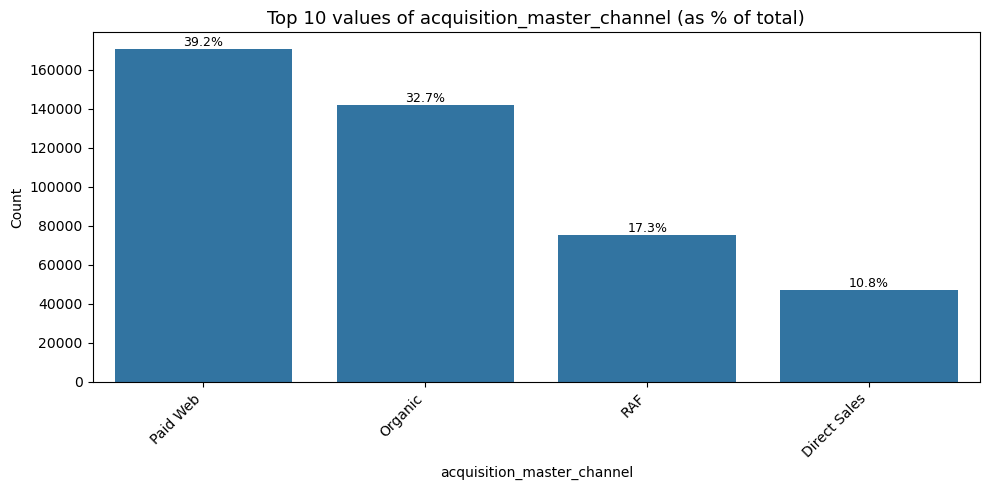

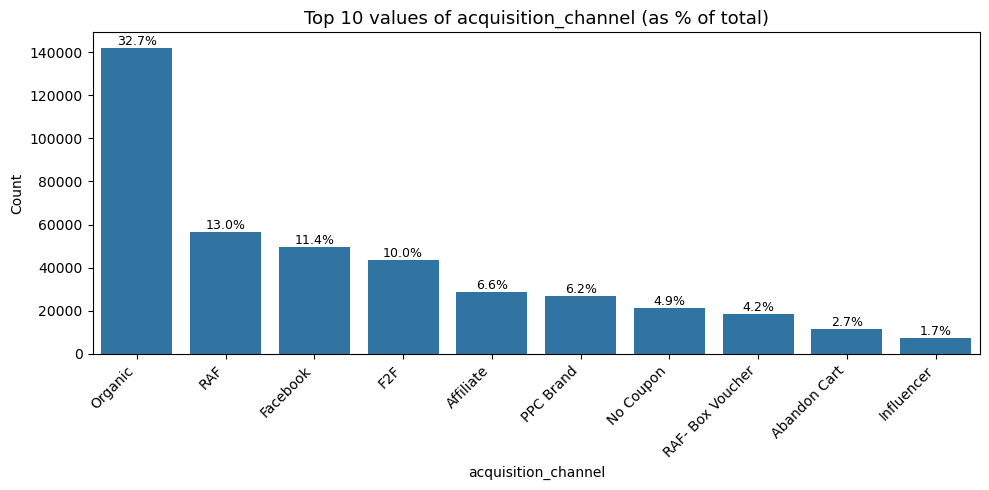

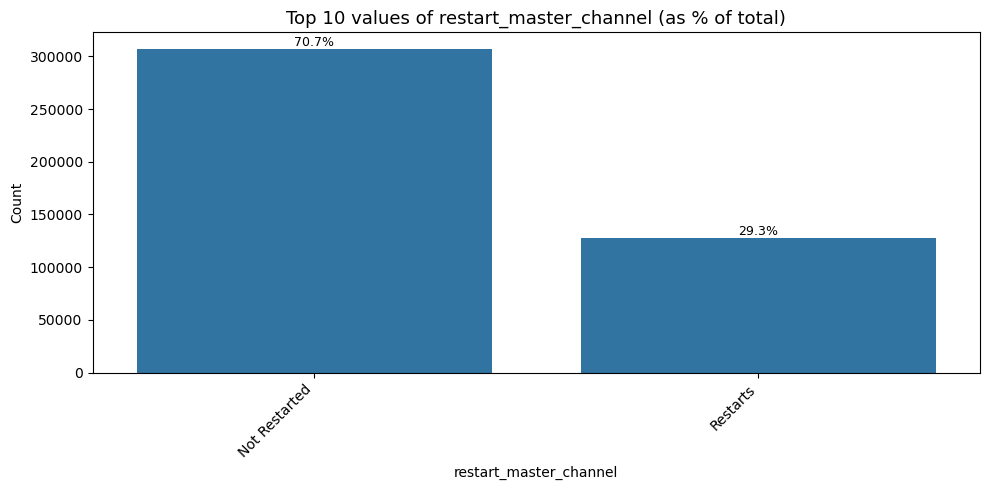

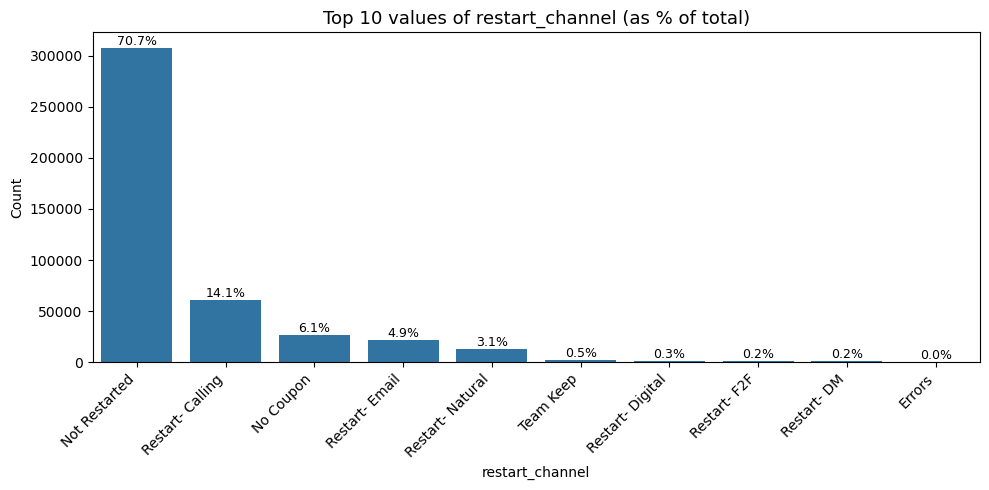

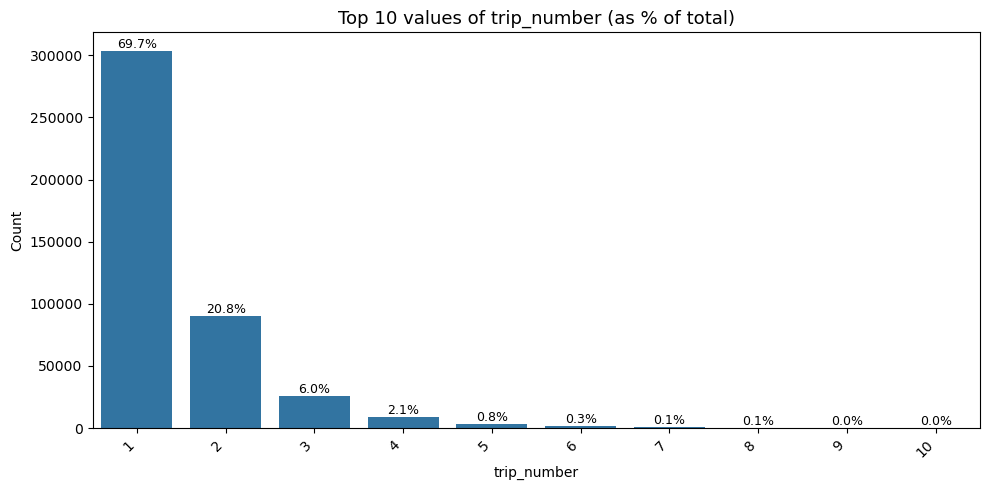

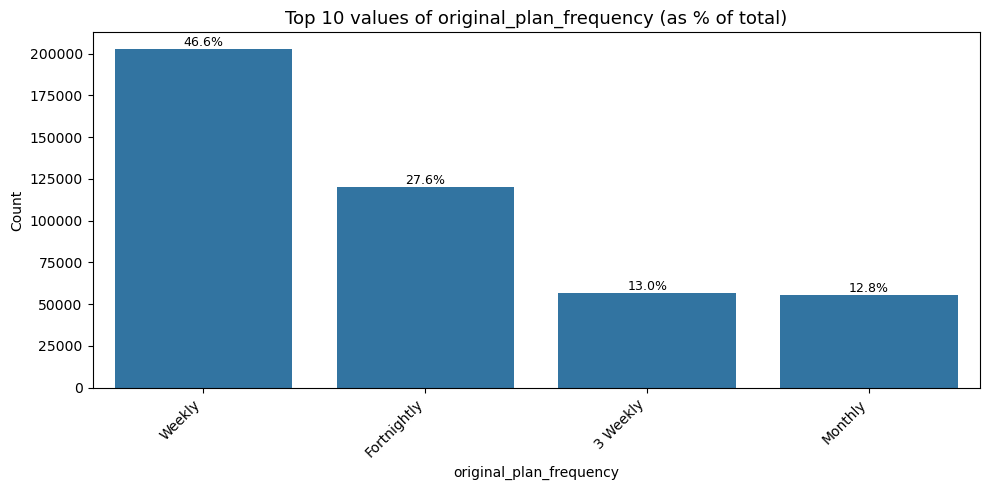

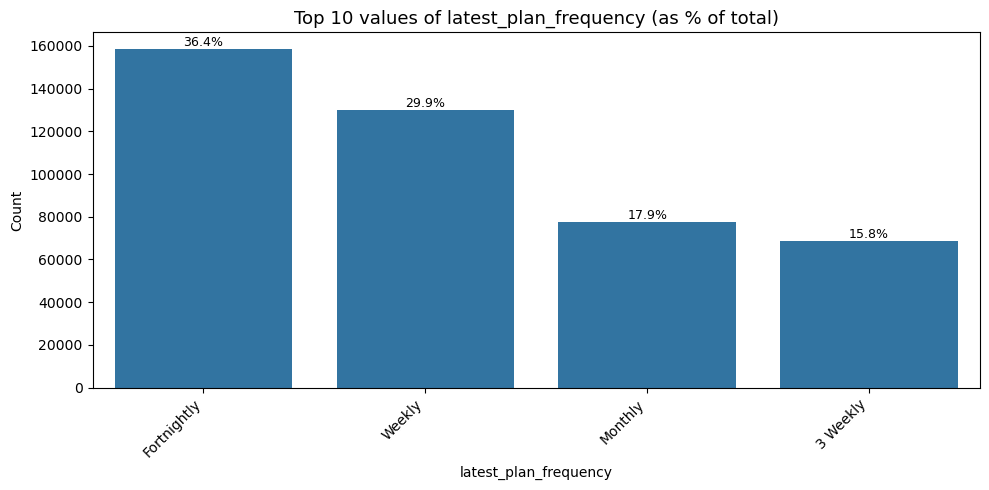

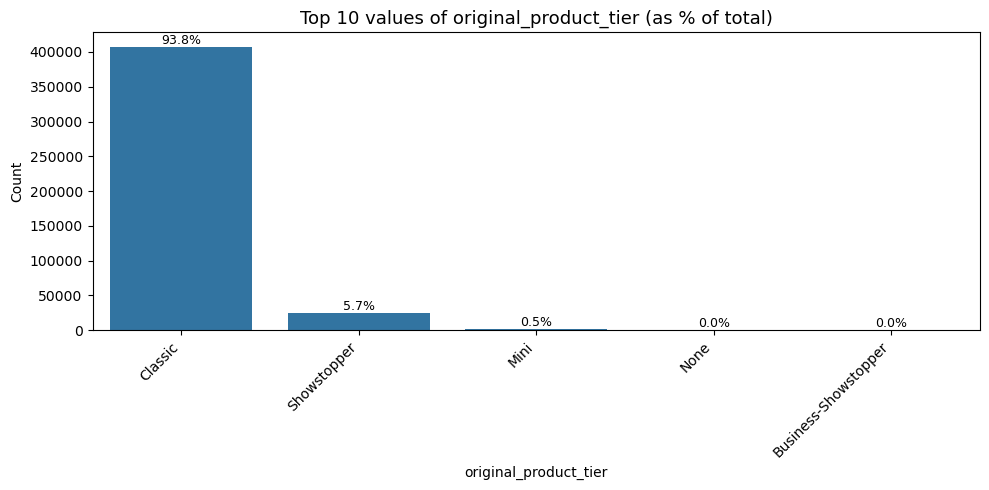

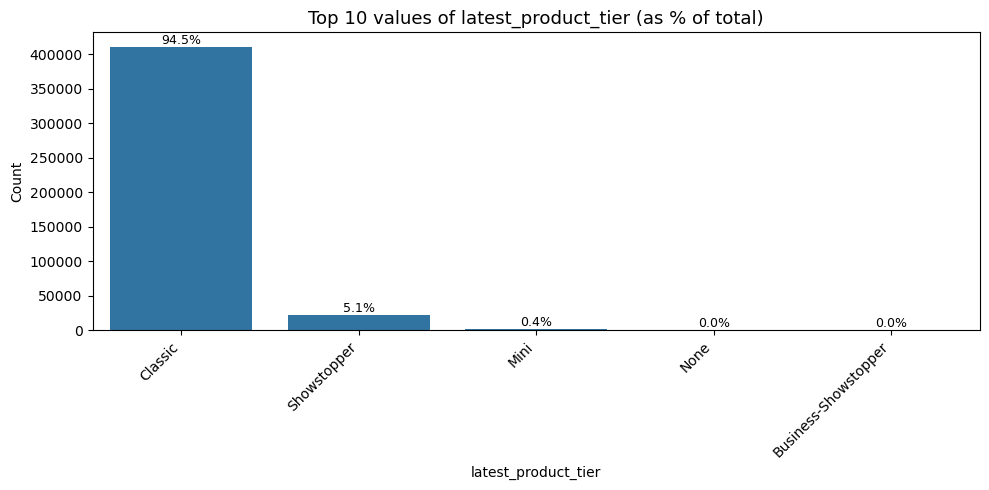

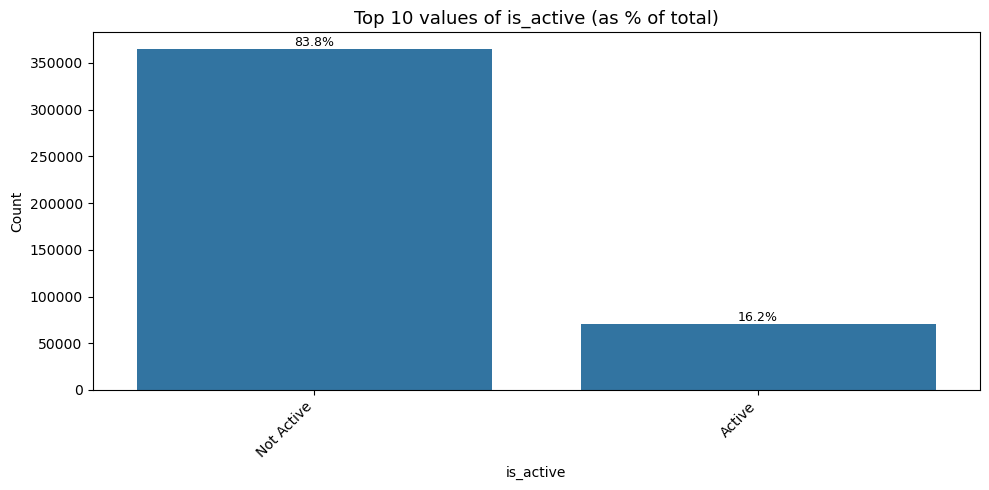

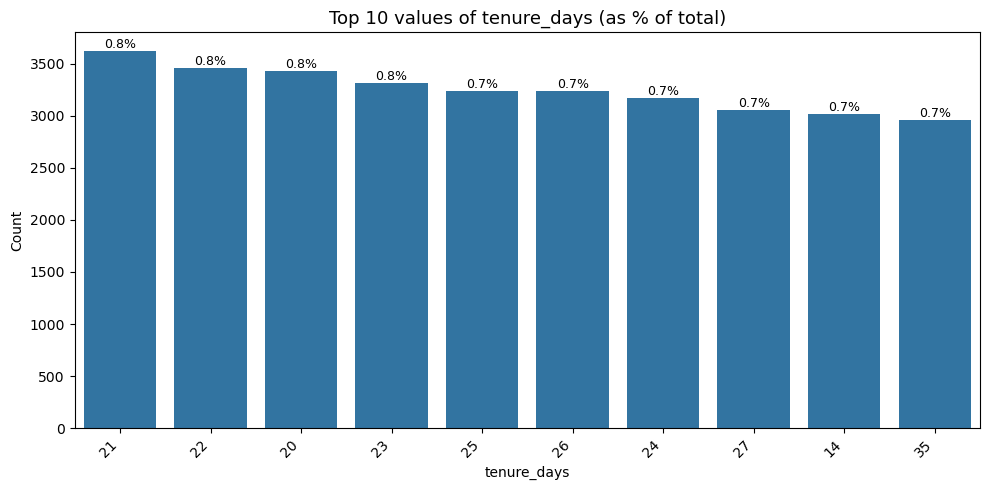

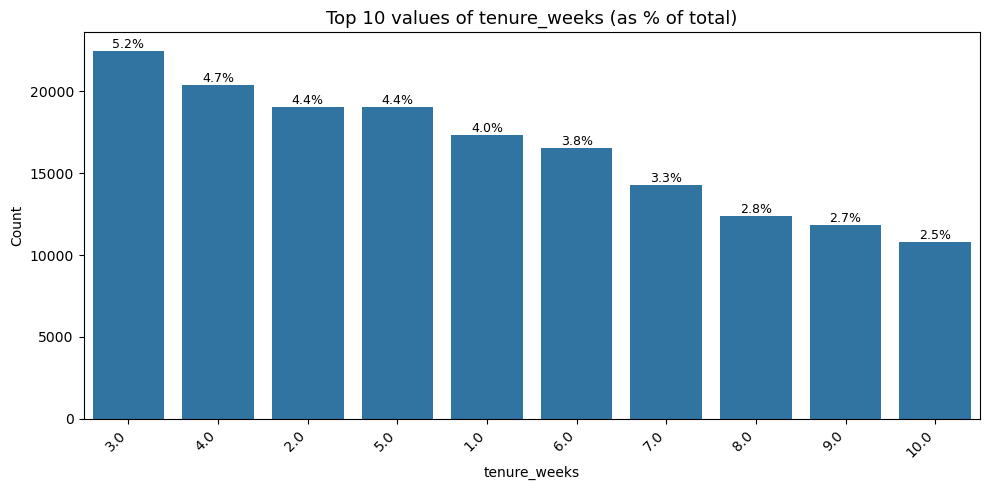

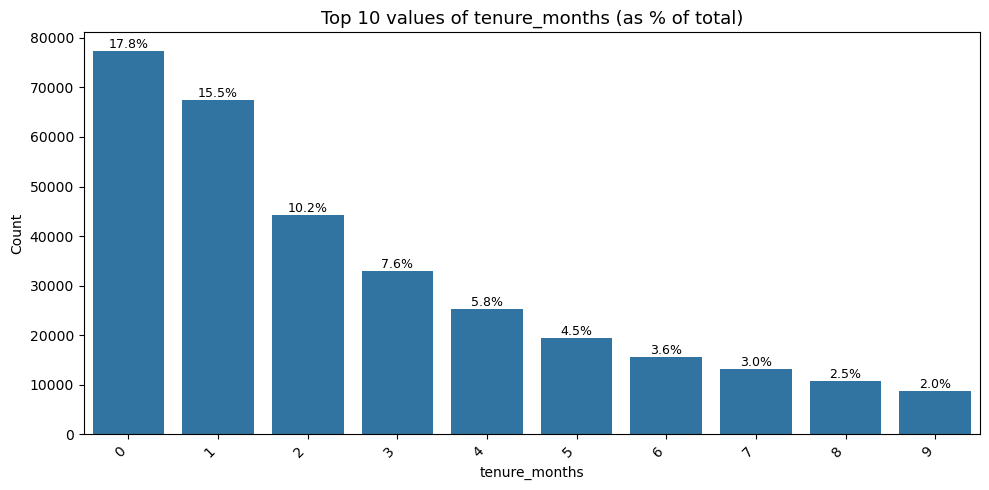

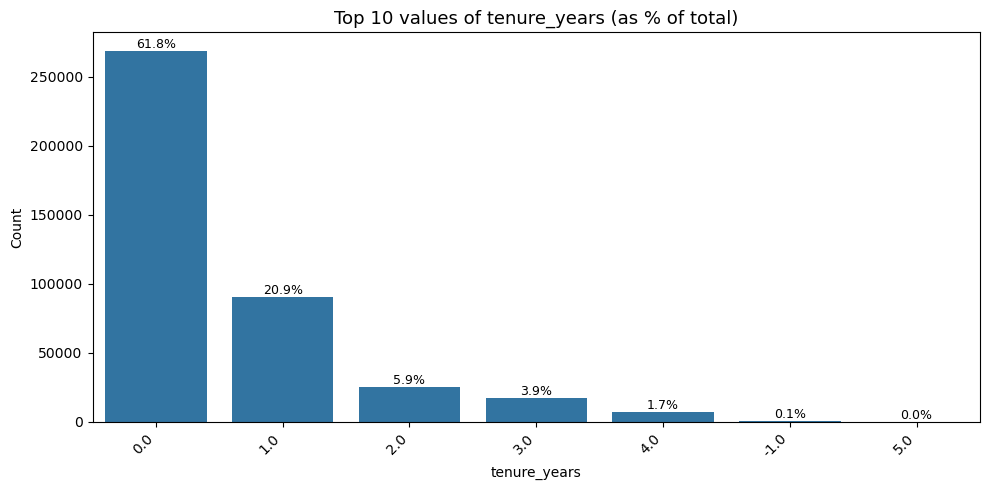

In [120]:

cat_cols = [
    'acquisition_master_channel', 'acquisition_channel',
    'restart_master_channel', 'restart_channel',
   'trip_number',
    'original_plan_frequency', 'latest_plan_frequency',
    'original_product_tier', 'latest_product_tier',
    'is_active', 'tenure_days', 'tenure_weeks', 'tenure_months', 'tenure_years'
]

#total rows for % values
total_rows = len(data_c)

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    
    # Get top 10 values
    top_values = data_c[col].value_counts().nlargest(10)
    top_categories = top_values.index
    filtered_data = data_c[data_c[col].isin(top_categories)]

    # Plot
    ax = sns.countplot(data=filtered_data, x=col, order=top_categories)
    plt.title(f"Top 10 values of {col} (as % of total)", fontsize=13)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count")
    
    # Annotate % of total on bars
    for p in ax.patches:
        height = p.get_height()
        percent = height / total_rows * 100
        ax.annotate(f"{percent:.1f}%", (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


## Countplots: Numerical Values

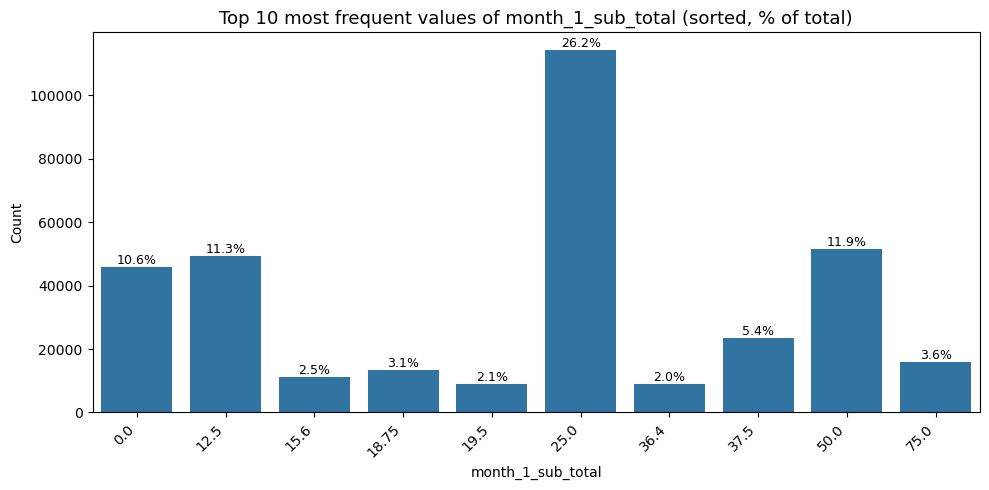

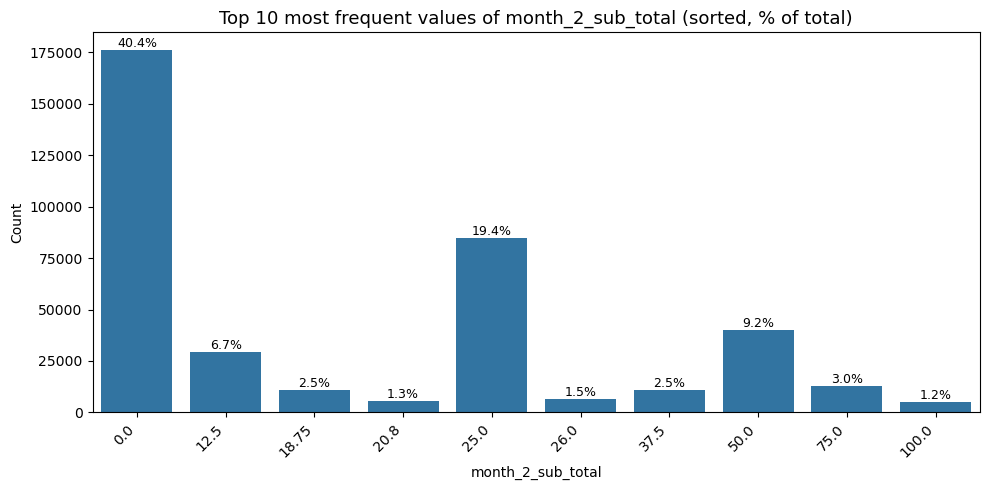

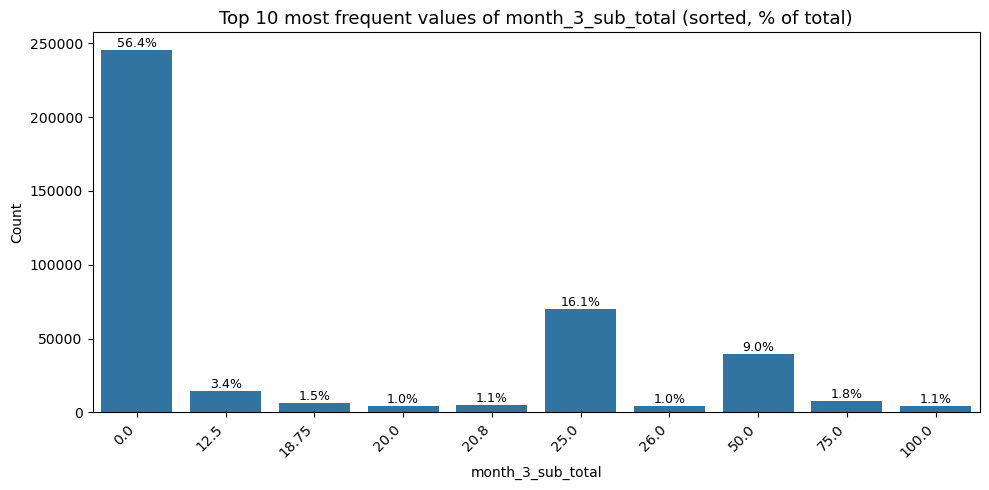

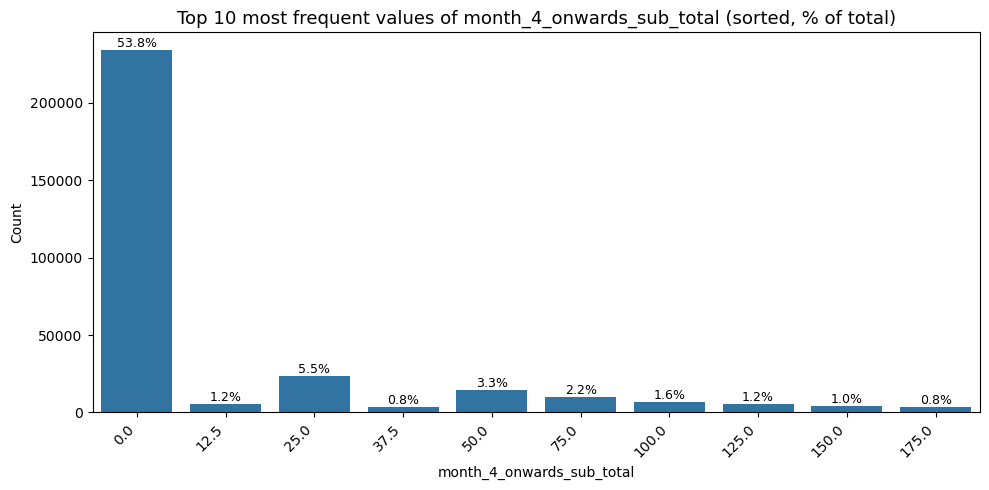

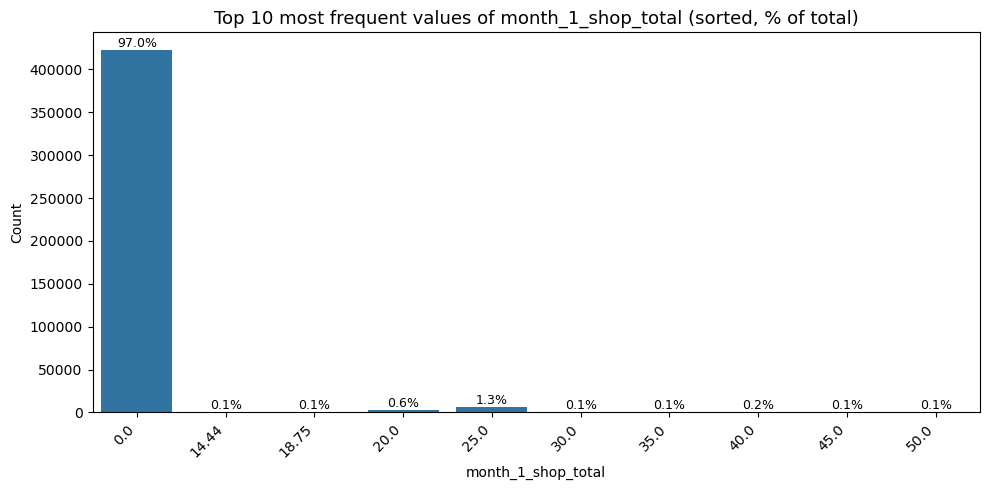

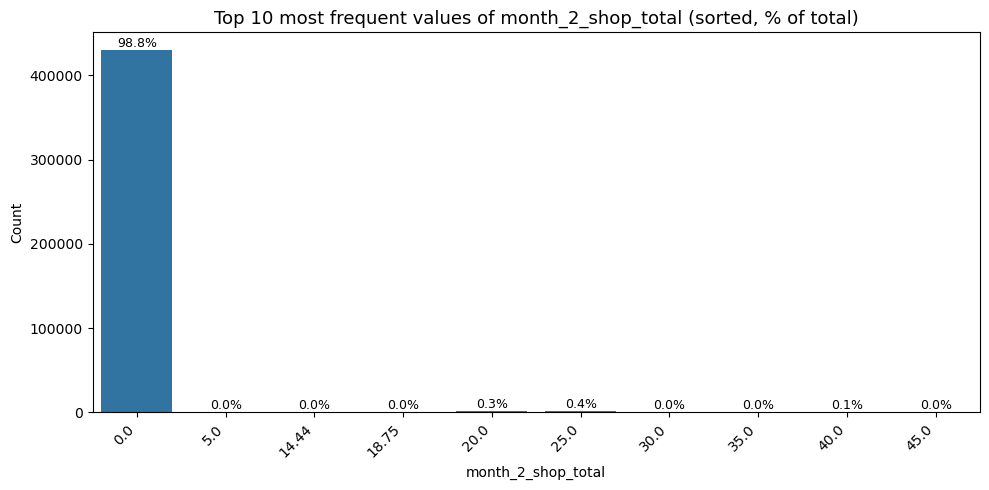

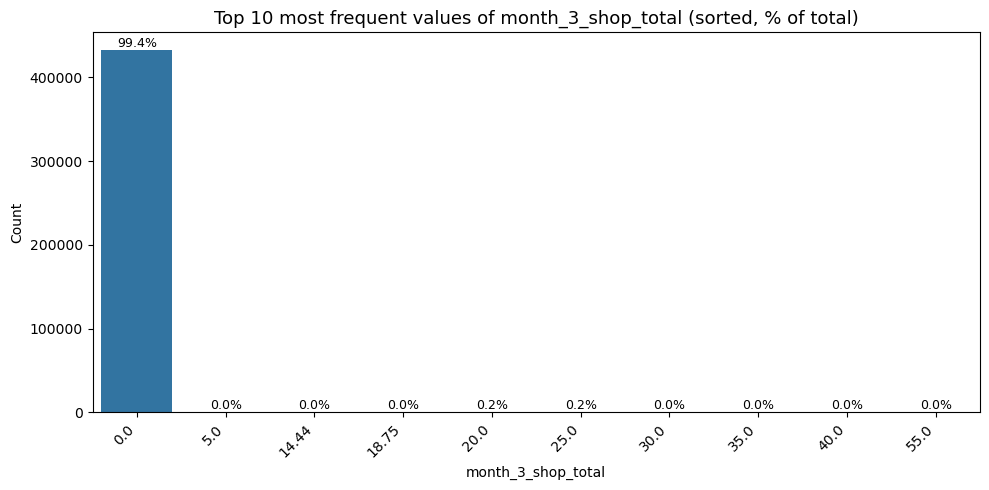

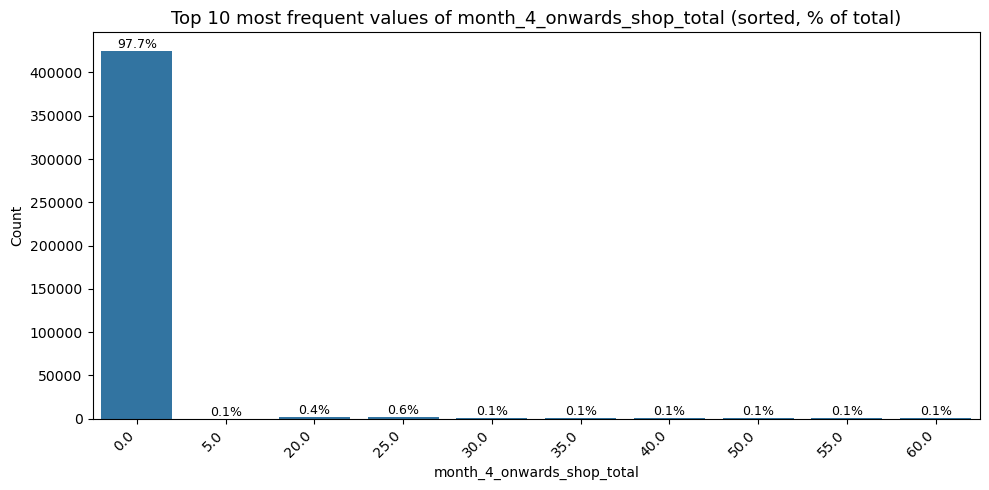

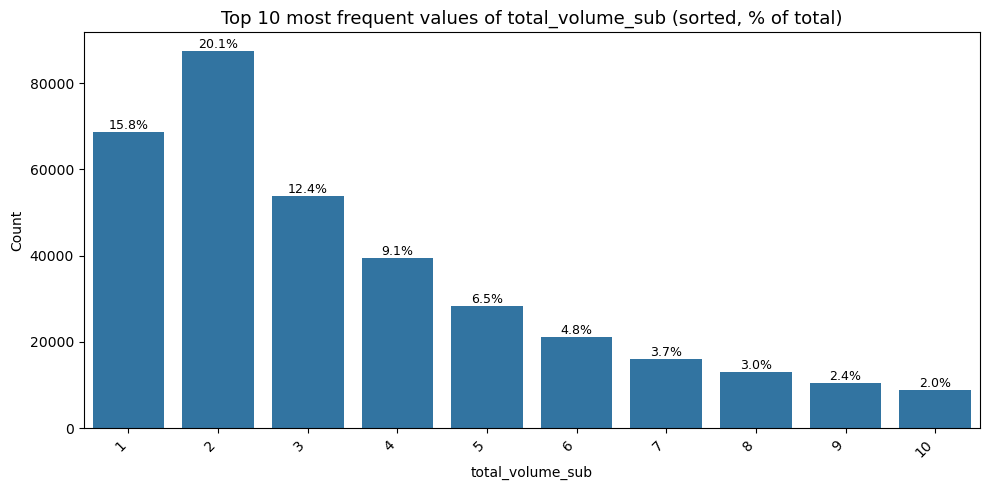

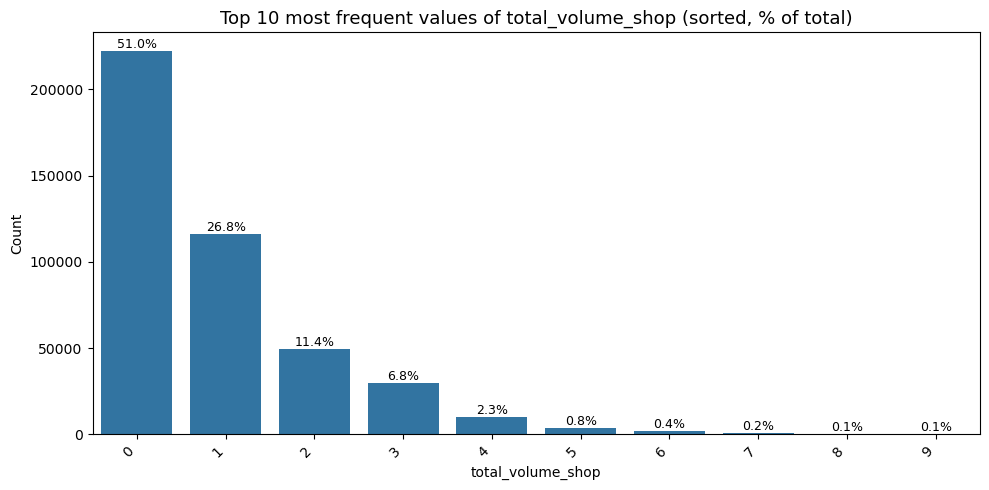

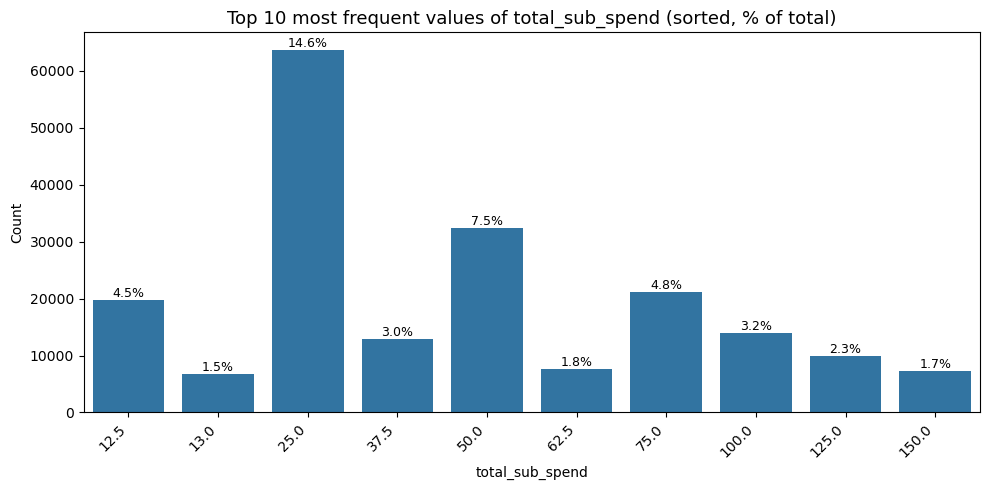

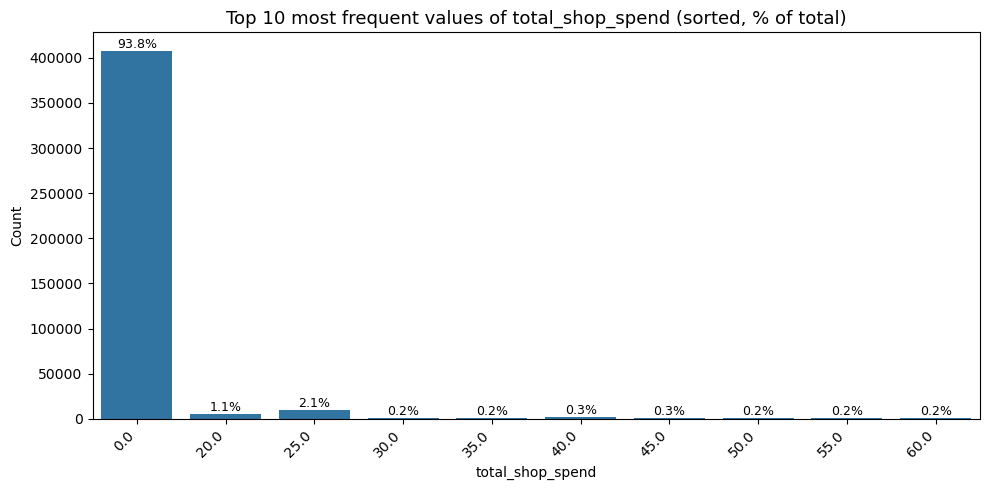

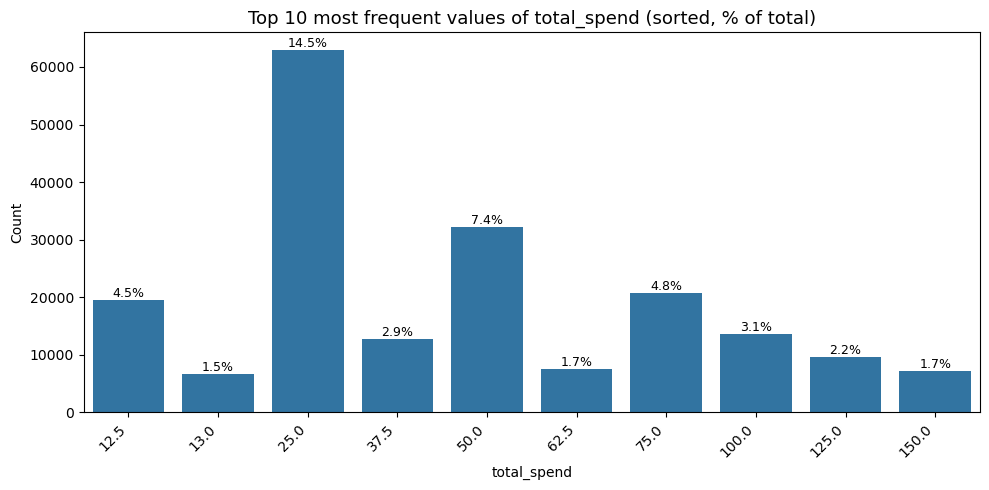

In [122]:

selected_cols = [
    'month_1_sub_total','month_2_sub_total','month_3_sub_total','month_4_onwards_sub_total','month_1_shop_total',
    'month_2_shop_total',
    'month_3_shop_total',
     'month_4_onwards_shop_total',
    'total_volume_sub', 'total_volume_shop', 'total_sub_spend', 'total_shop_spend', 'total_spend',
]


total_rows = len(data_c)

for col in selected_cols:
    plt.figure(figsize=(10, 5))

    # Get top 10 most frequent values, then sort numerically
    top_values = data_c[col].value_counts(dropna=True).nlargest(10)
    sorted_indices = sorted(top_values.index)  # Sort x-axis low to high

    filtered_data = data_c[data_c[col].isin(top_values.index)]

    # Plot
    ax = sns.countplot(data=filtered_data, x=col, order=sorted_indices)
    plt.title(f"Top 10 most frequent values of {col} (sorted, % of total)", fontsize=13)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

    # Annotate % of total
    for p in ax.patches:
        height = p.get_height()
        percent = height / total_rows * 100
        ax.annotate(f"{percent:.1f}%", (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()



## Histograms + boxplots: Numerical

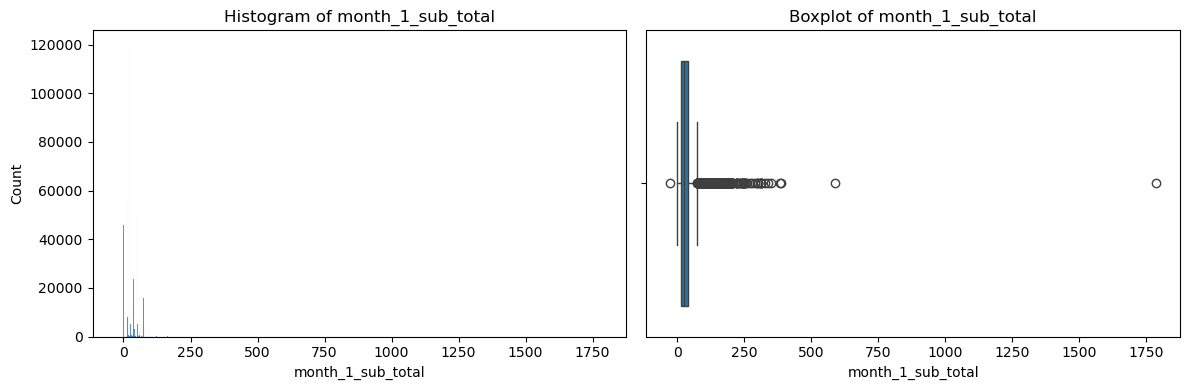

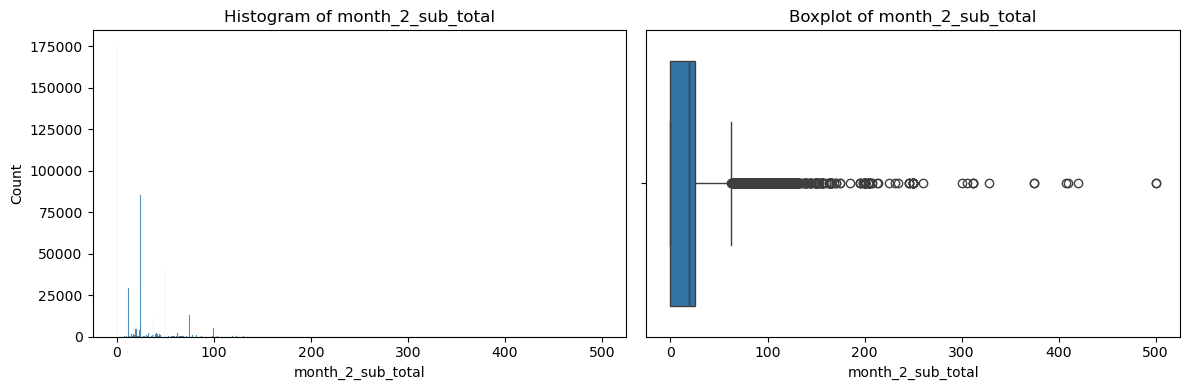

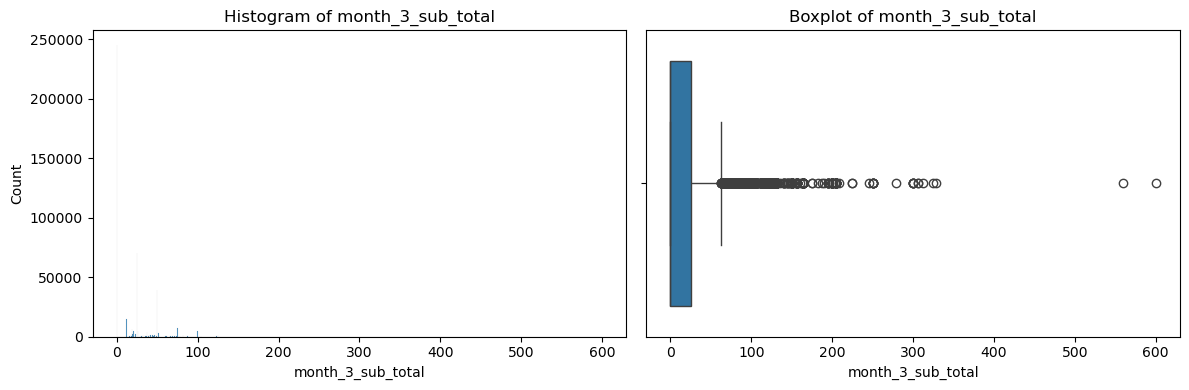

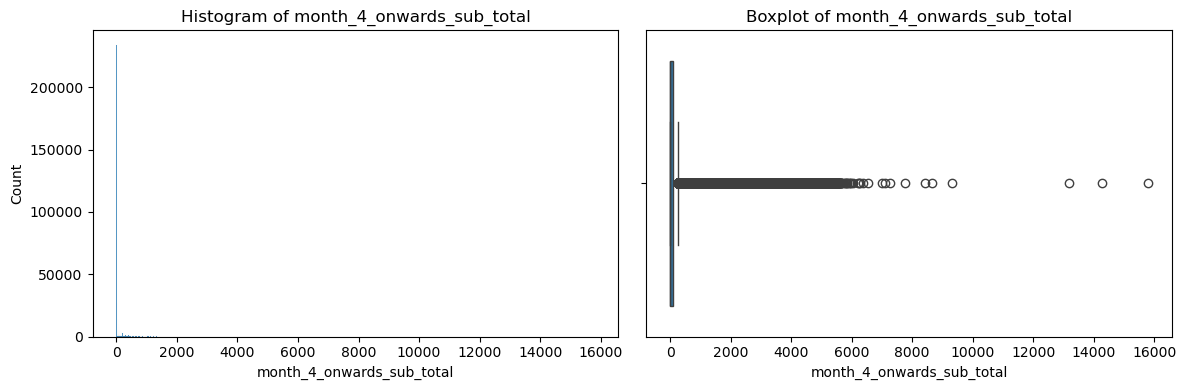

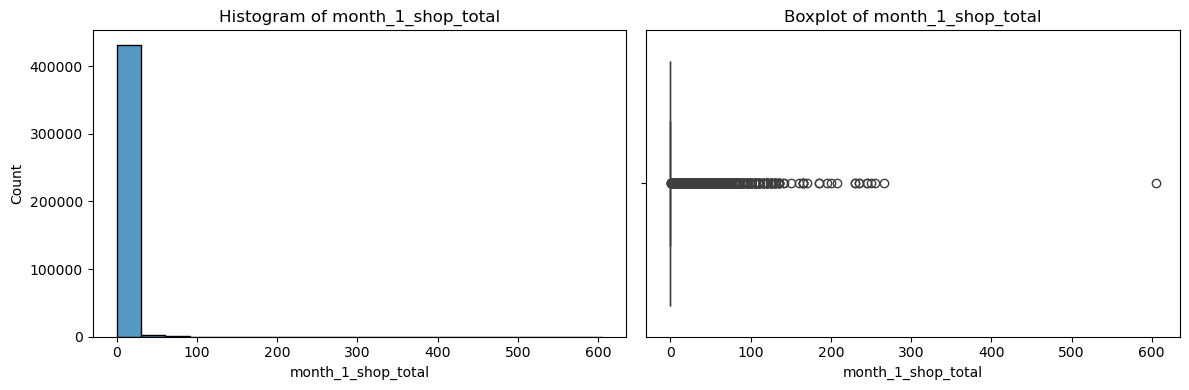

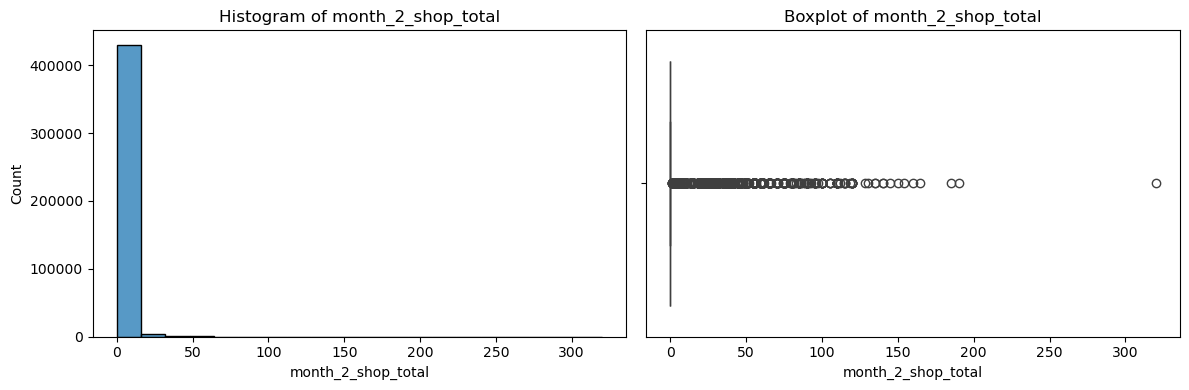

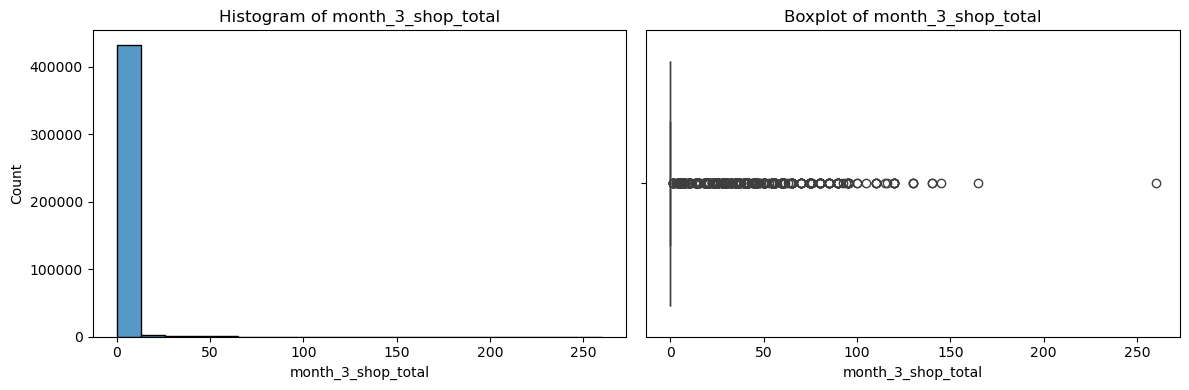

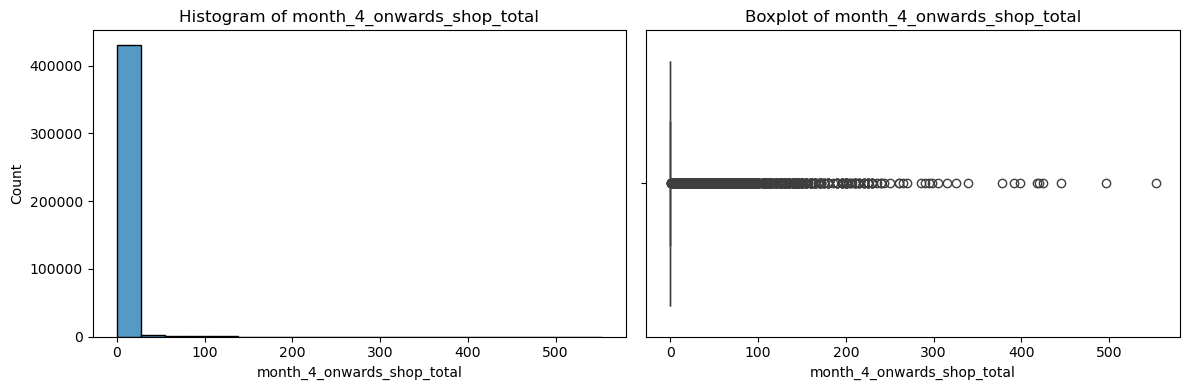

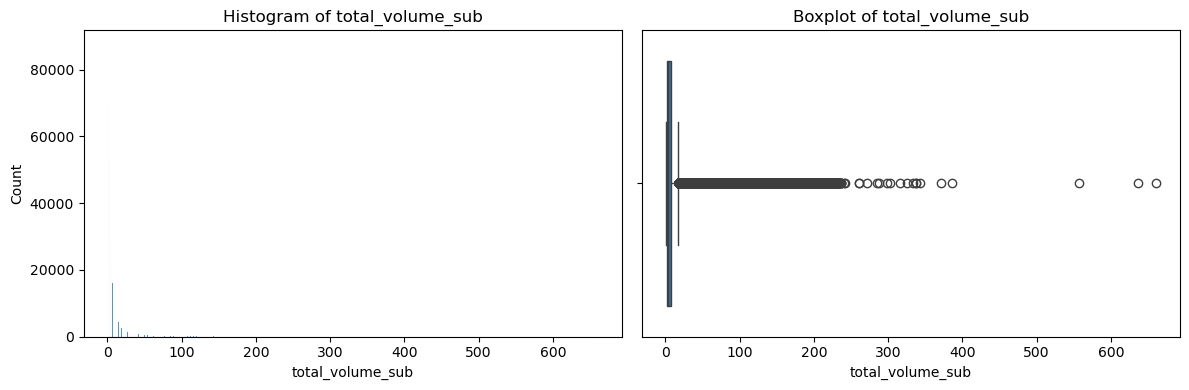

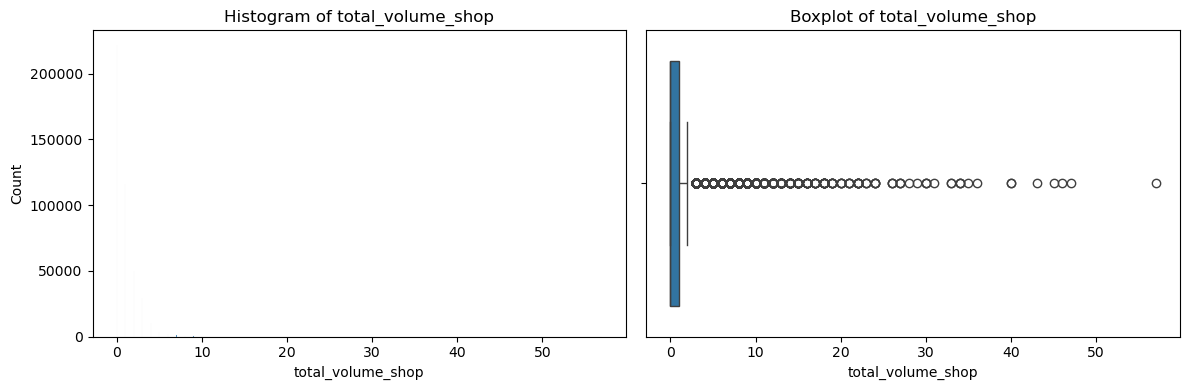

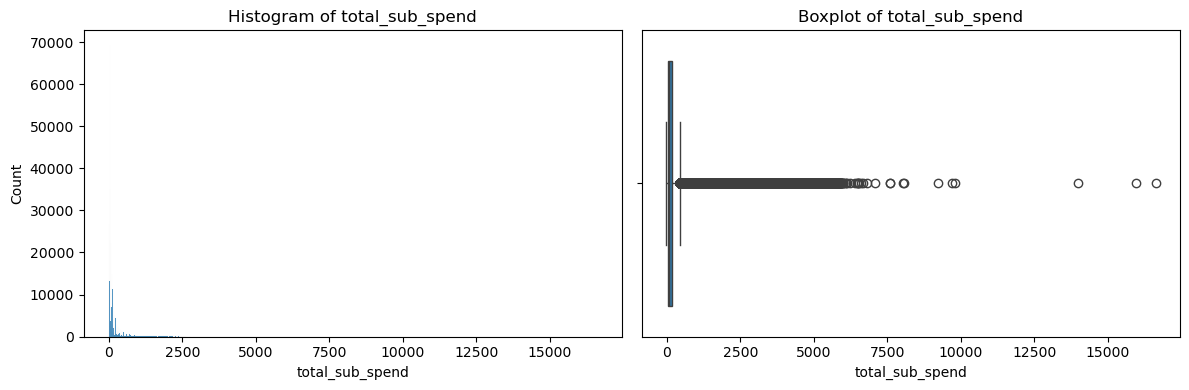

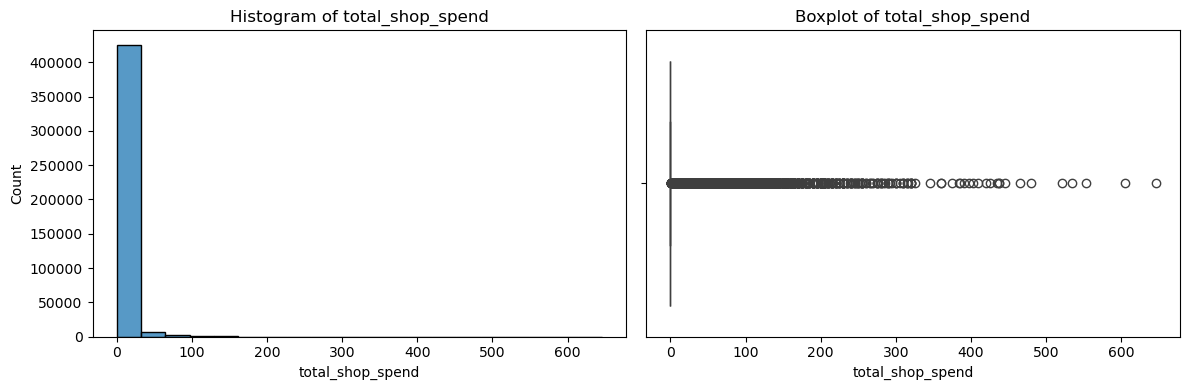

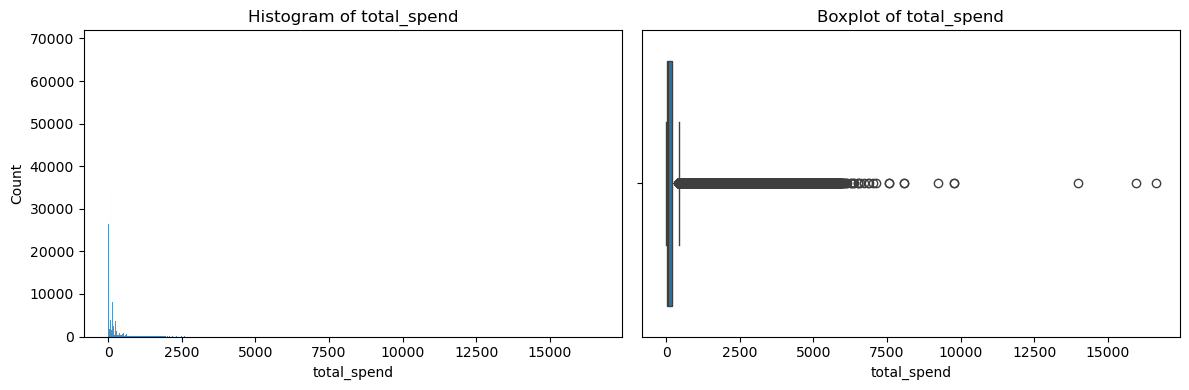

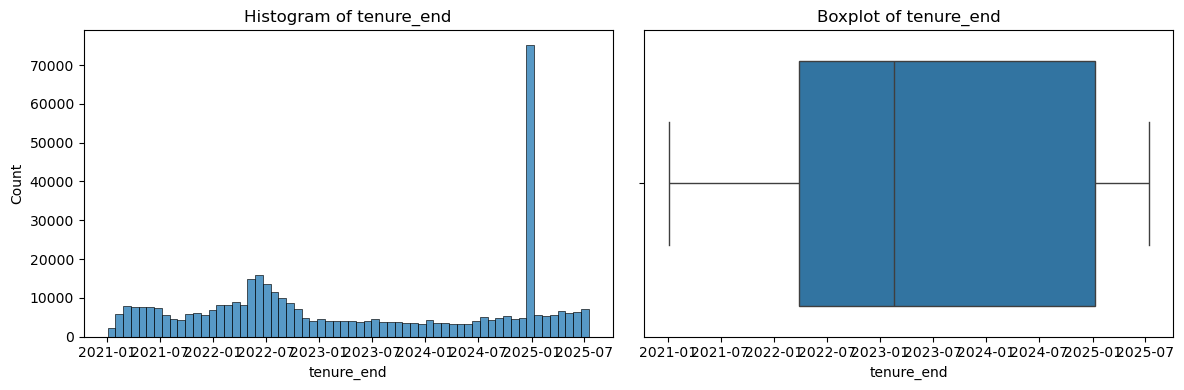

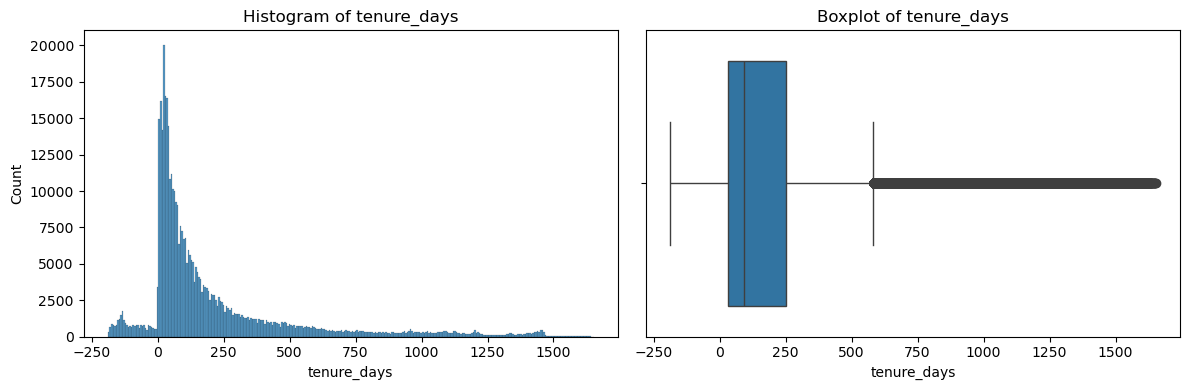

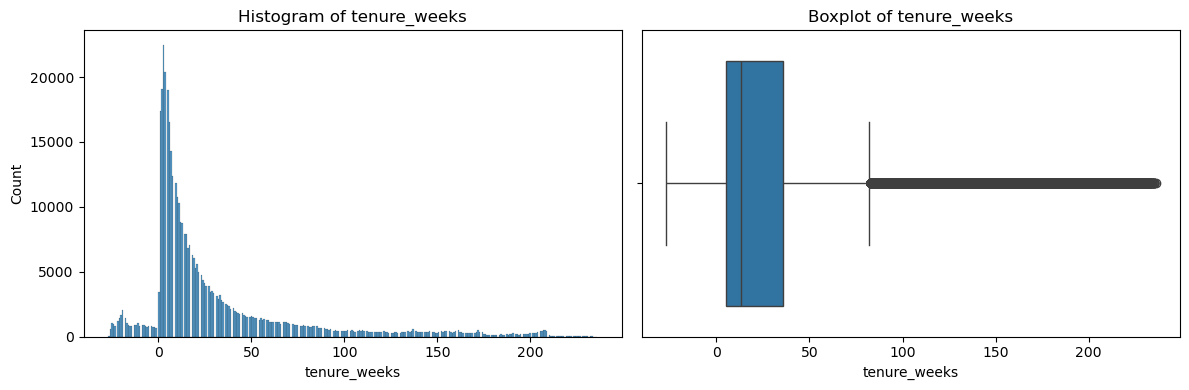

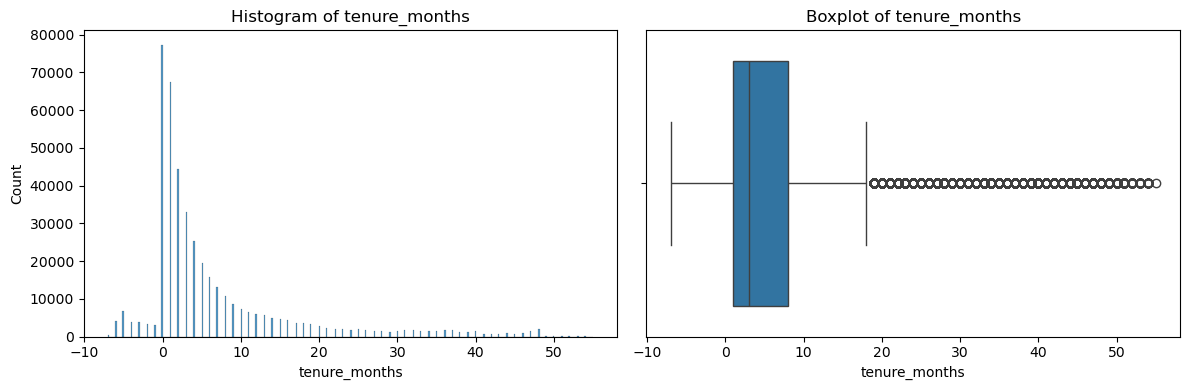

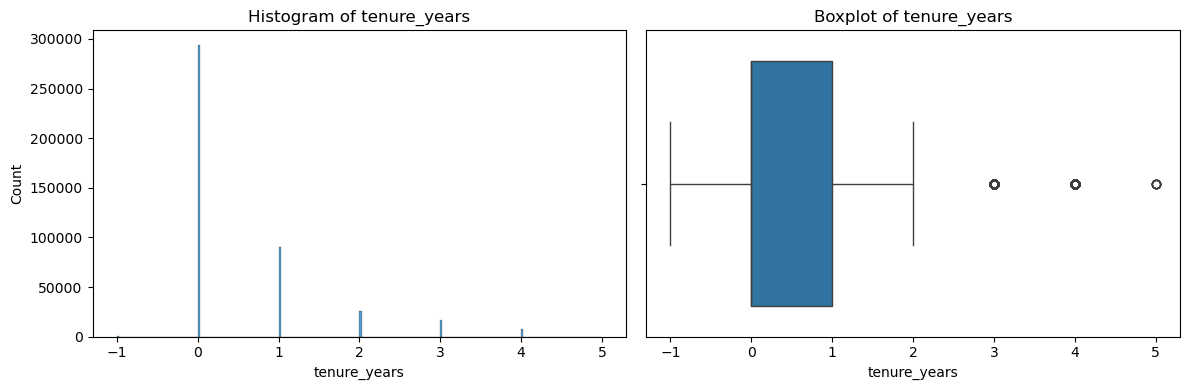

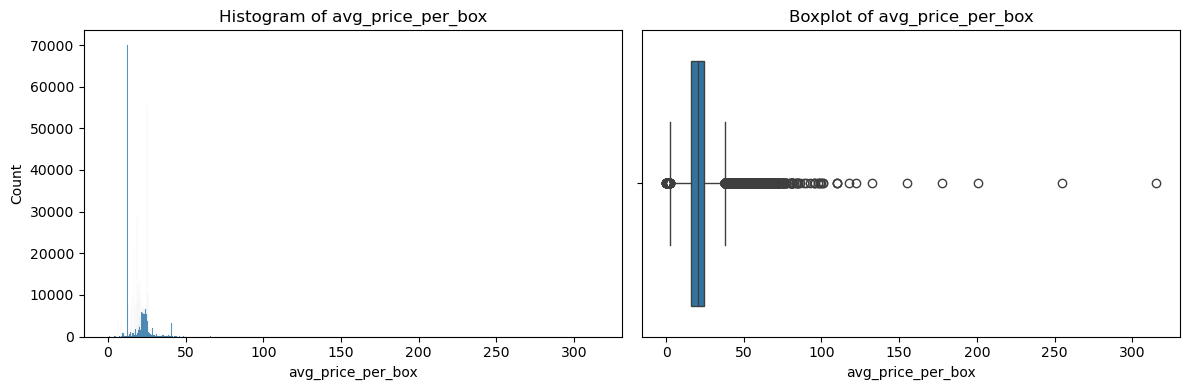

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_cols = [
 
 'month_1_sub_total','month_2_sub_total', 'month_3_sub_total', 'month_4_onwards_sub_total',
    'month_1_shop_total',
     'month_2_shop_total',
    'month_3_shop_total',
     'month_4_onwards_shop_total',
    'total_volume_sub', 'total_volume_shop', 'total_sub_spend', 'total_shop_spend', 'total_spend',
        'tenure_days', 'tenure_weeks', 'tenure_months', 'tenure_years',
       'avg_price_per_box']

for col in selected_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data_c[col], kde=False, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # Boxplot
    sns.boxplot(x=data_c[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


## Histograms + boxplots (no outliers): Numerical

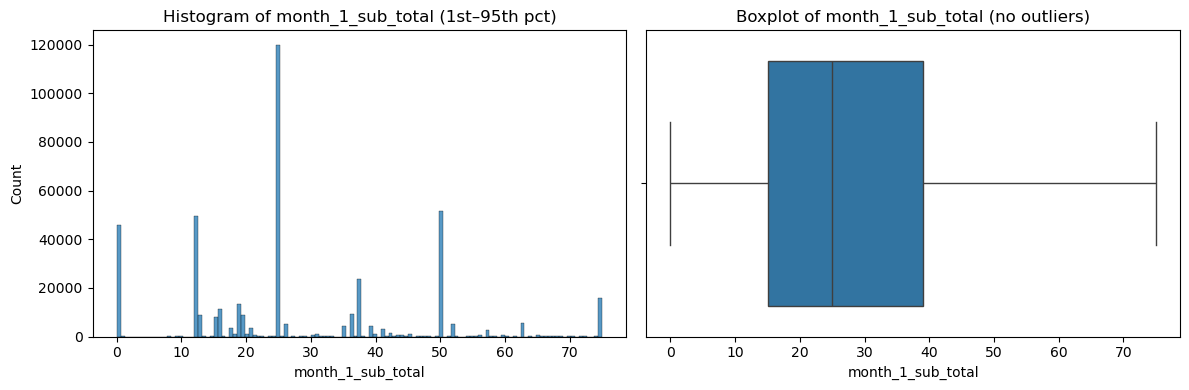

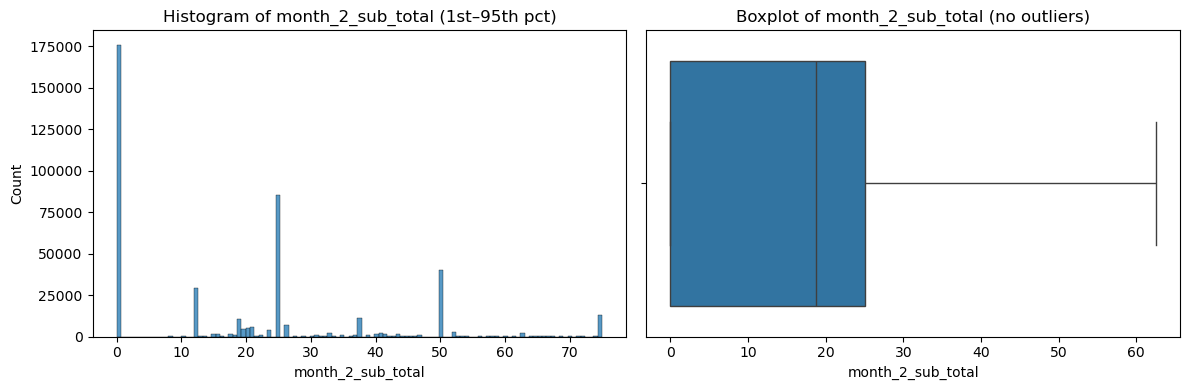

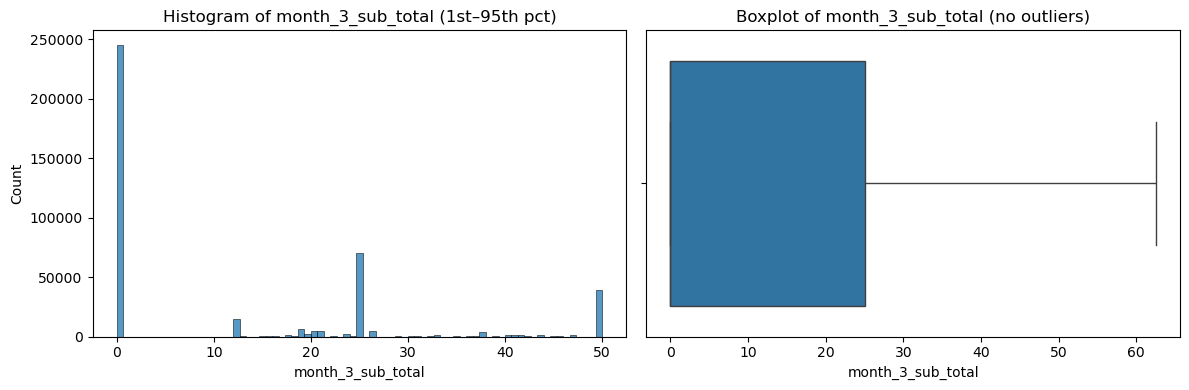

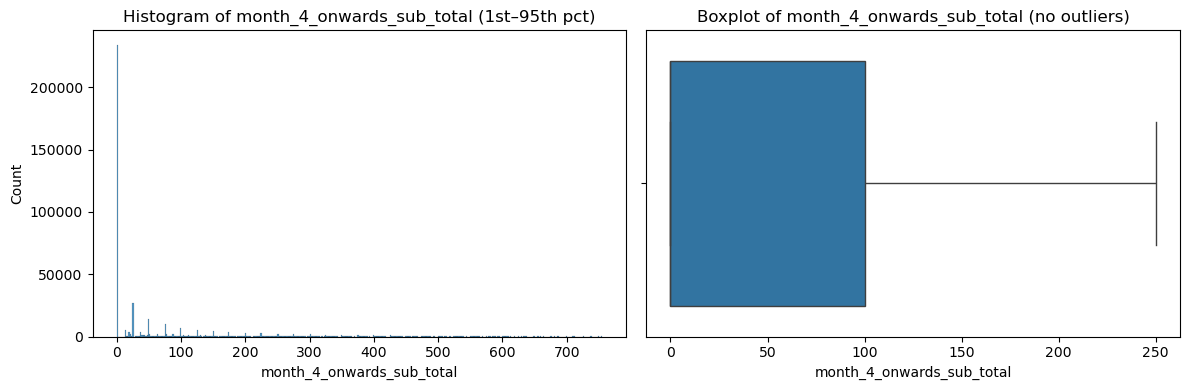

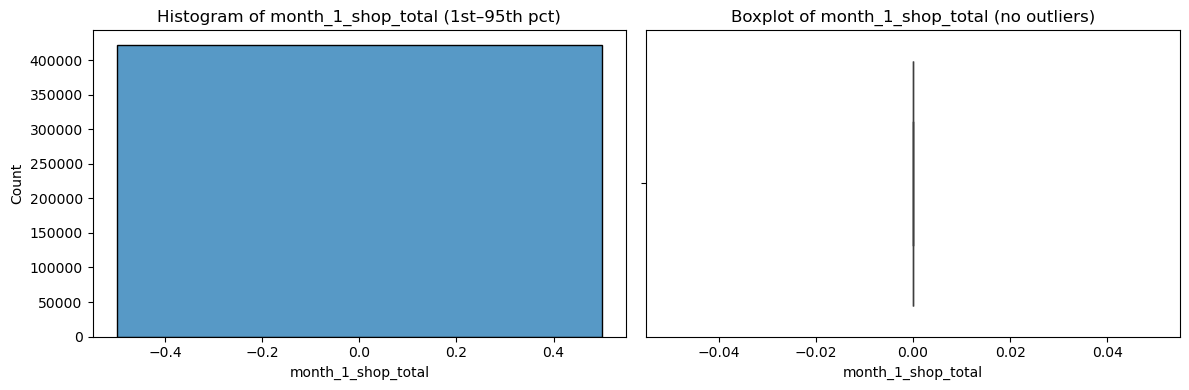

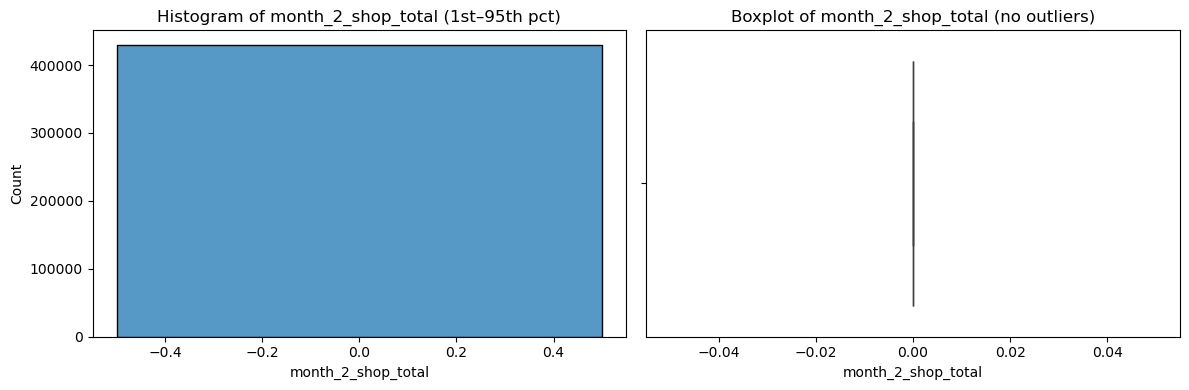

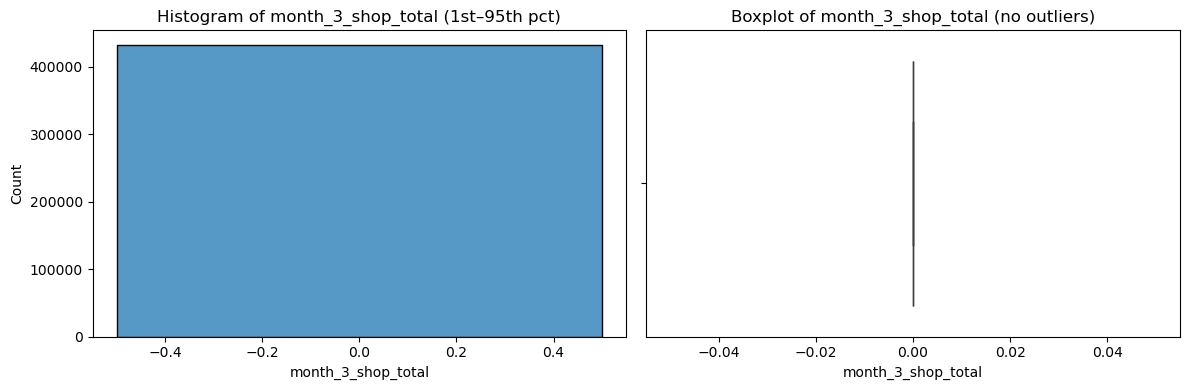

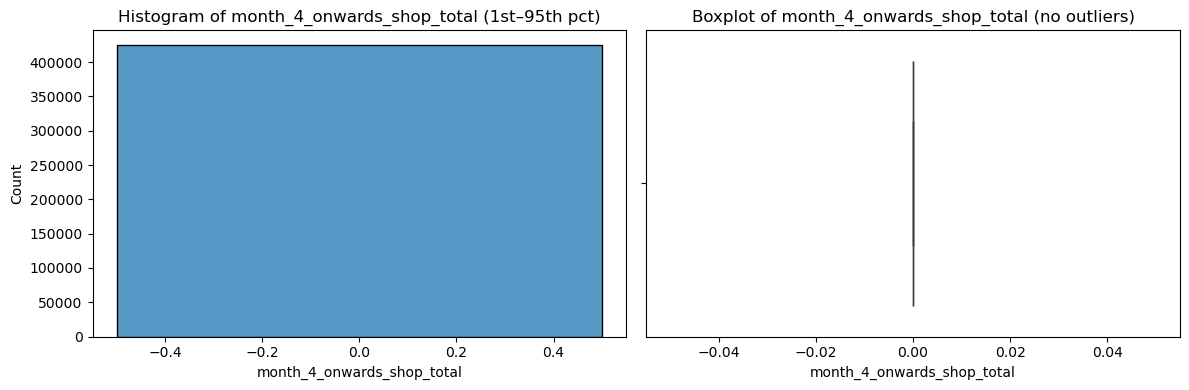

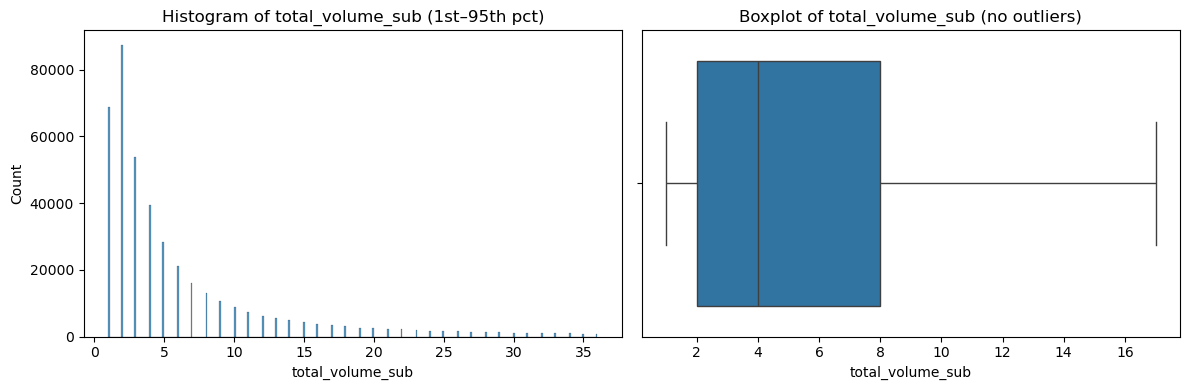

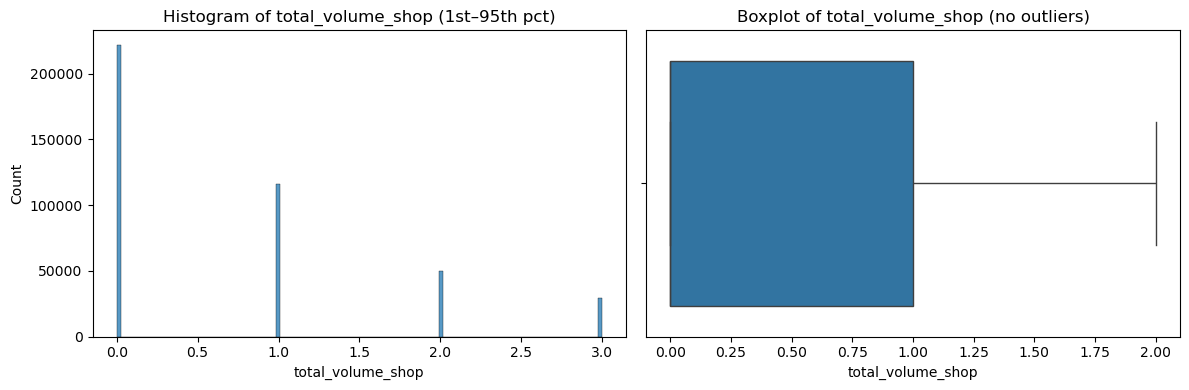

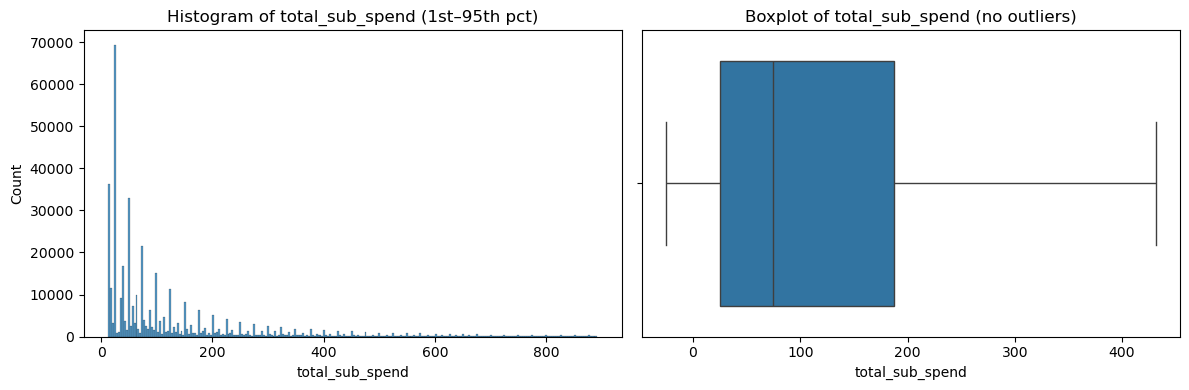

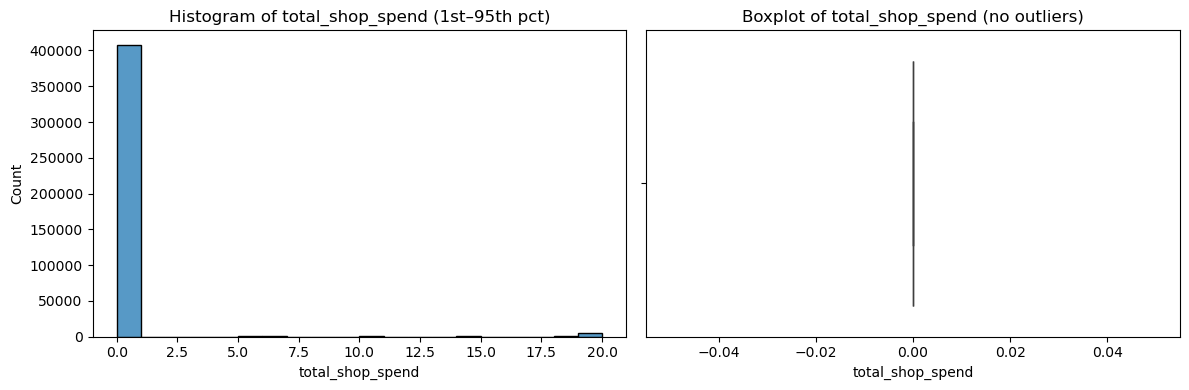

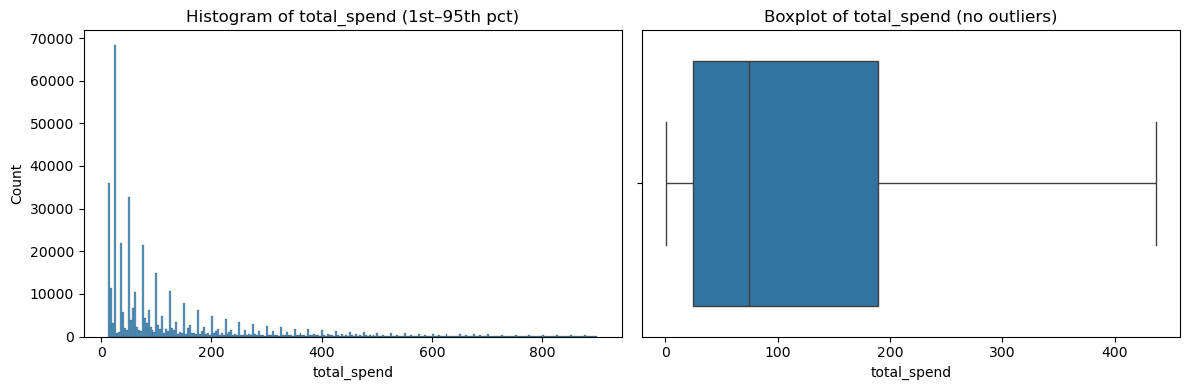

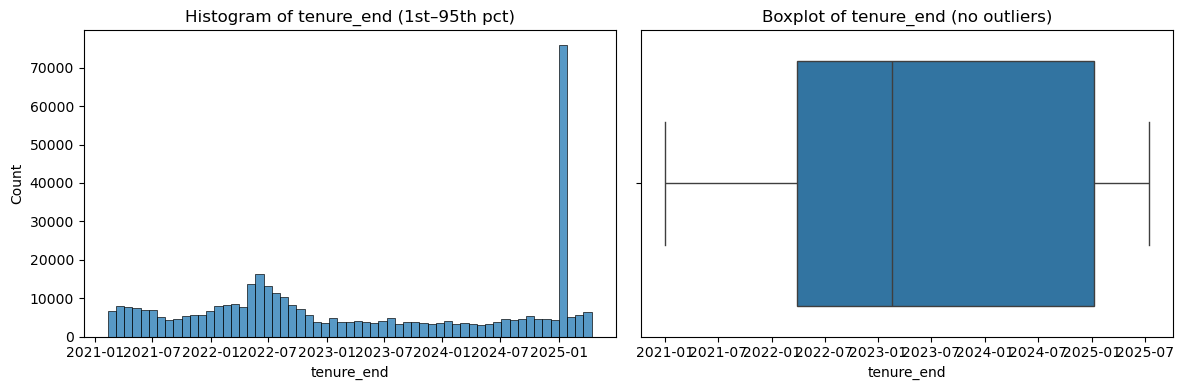

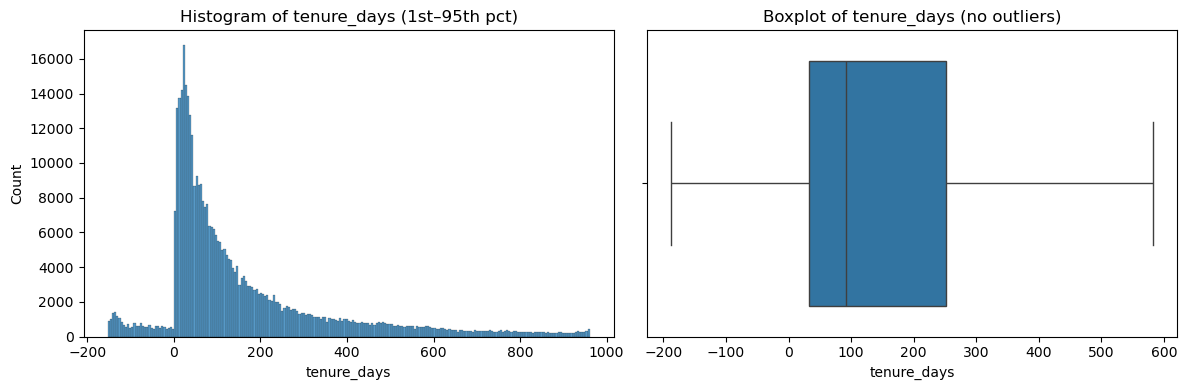

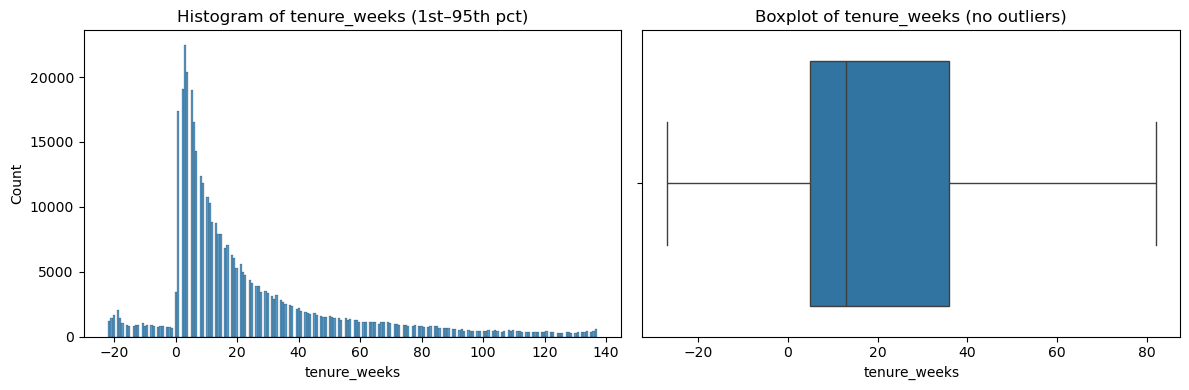

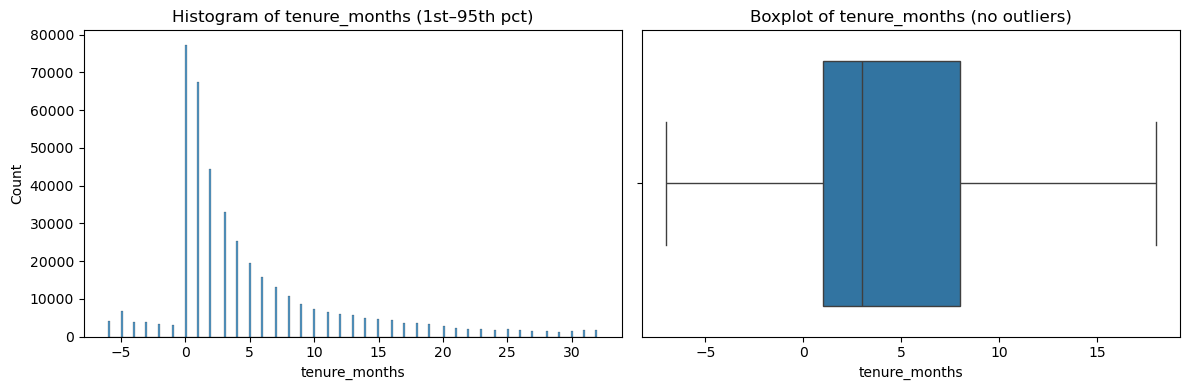

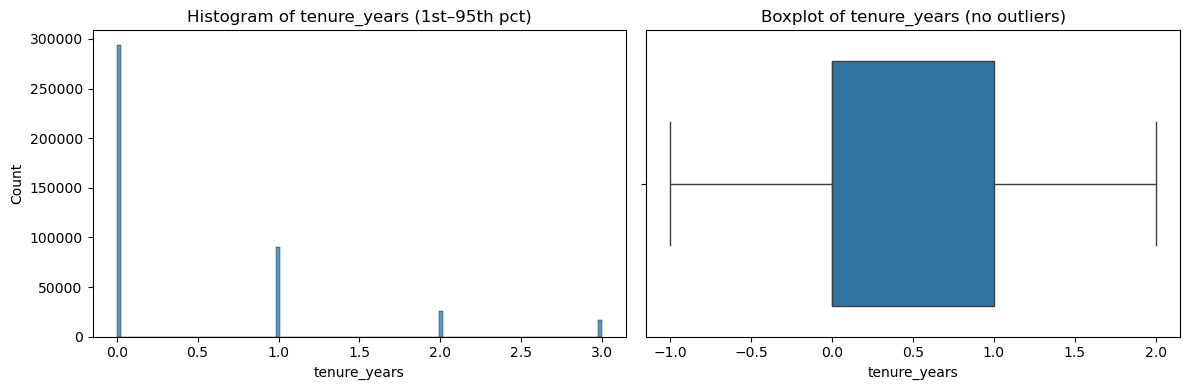

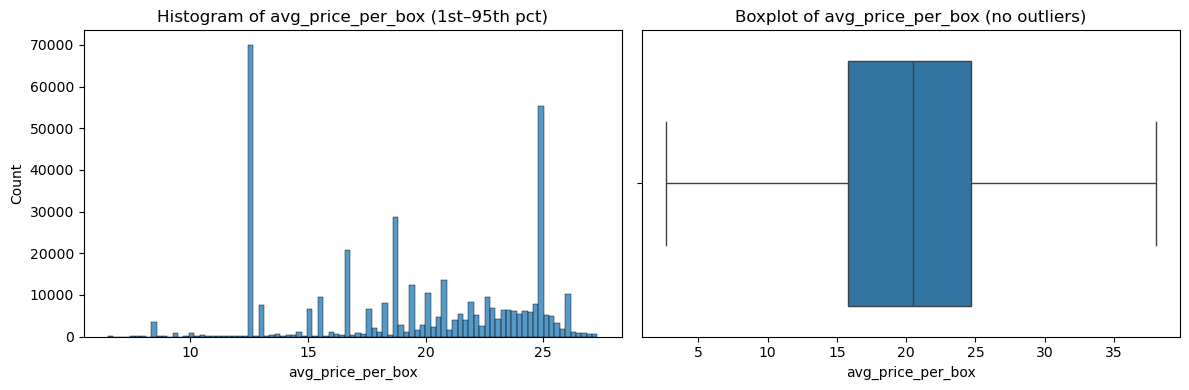

In [126]:



for col in selected_cols:
    values = data_c[col].dropna()

    # Clip to 1st–95th percentile for visualization only
    lower, upper = np.percentile(values, [1, 95])
    clipped = values[(values >= lower) & (values <= upper)]

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram (clipped)
    sns.histplot(clipped, kde=False, ax=axes[0])
    axes[0].set_title(f'Histogram of {col} (1st–95th pct)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # Boxplot (showfliers=False hides outliers)
    sns.boxplot(x=values, ax=axes[1], showfliers=False)
    axes[1].set_title(f'Boxplot of {col} (no outliers)')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()



# 1. Compare MONTH 1 TO 4+

In [203]:
data_c = data[data['total_spend'] != 0]

# Descriptive statistic for main spend values
data_c[ ['month_1_sub_total', 'month_2_sub_total',
    'month_3_sub_total', 'month_4_onwards_sub_total', 'total_spend']].describe().apply(lambda col: col.map(lambda x: f"{x:,.2f}"))


month_1_sub_total month_2_sub_total month_3_sub_total  \
count        434,913.00        434,913.00        434,913.00   
mean              29.80             20.82             15.72   
std               22.17             24.23             22.77   
min              -25.00              0.00              0.00   
25%               15.00              0.00              0.00   
50%               25.00             18.75              0.00   
75%               39.00             25.00             25.00   
max            1,785.00            500.00            600.00   

      month_4_onwards_sub_total total_spend  
count                434,913.00  434,913.00  
mean                     140.73      209.38  
std                      382.88      418.08  
min                        0.00        1.00  
25%                        0.00       25.00  
50%                        0.00       75.00  
75%                      100.00      189.50  
max                   15,795.00   16,620.00

In [52]:
# Descriptive statistic for main spend values
data[ ['month_1_sub_total', 'month_2_sub_total',
    'month_3_sub_total', 'month_4_onwards_sub_total', 'total_spend']].describe().apply(lambda col: col.map(lambda x: f"{x:,.2f}"))

month_1_sub_total month_2_sub_total month_3_sub_total  \
count        552,403.00        552,403.00        552,403.00   
mean              23.46             16.39             12.38   
std               23.15             23.13             21.20   
min              -25.00              0.00            -25.00   
25%                0.00              0.00              0.00   
50%               24.60              0.00              0.00   
75%               36.40             25.00             25.00   
max            1,785.00            500.00            600.00   

      month_4_onwards_sub_total total_spend  
count                552,403.00  552,403.00  
mean                     110.80      164.85  
std                      344.58      380.73  
min                        0.00        0.00  
25%                        0.00       13.00  
50%                        0.00       50.00  
75%                       50.00      137.50  
max                   15,795.00   16,620.00

## Visualize quartile and outliers

In [54]:
# Main spend values
cols = ['month_1_sub_total', 'month_2_sub_total',
        'month_3_sub_total', 'month_4_onwards_sub_total',
        'total_spend']

# Calculate Q1, Q3, IQR, and outlier bounds
iqr_table = pd.DataFrame(index=cols)
iqr_table['Q1'] = data[cols].quantile(0.25)
iqr_table['Q2'] = data[cols].quantile(0.50)
iqr_table['Q3'] = data[cols].quantile(0.75)
iqr_table['Max'] = data[cols].max()
iqr_table['Min'] = data[cols].min()
iqr_table['IQR'] = iqr_table['Q3'] - iqr_table['Q1']
iqr_table['Lower Bound'] = iqr_table['Q1'] - 1.5 * iqr_table['IQR']
iqr_table['Upper Bound'] = iqr_table['Q3'] + 1.5 * iqr_table['IQR']
iqr_table['spend'] = data[cols].sum()
iqr_table['cust_n'] = data[cols].apply(lambda col: col.ne(0) & col.notna()).sum()

# Count how many values fall outside the IQR bounds
iqr_table['Lower Outliers'] = [(data[col] < iqr_table.loc[col, 'Lower Bound']).sum() for col in cols]
iqr_table['Upper Outliers'] = [(data[col] > iqr_table.loc[col, 'Upper Bound']).sum() for col in cols]

# Total values
iqr_table['Non-Null Count'] = [data[col].notnull().sum() for col in cols]
iqr_table['Customers'] = [(data[col] > 0).sum() for col in cols]

# Add percentage of outliers
iqr_table['Outlier %'] = (iqr_table['Upper Outliers'] / iqr_table['Non-Null Count']) * 100
# Add percentage of outliers
iqr_table['Outlier % month'] = (iqr_table['Upper Outliers'] / iqr_table['Customers']) * 100

# display
iqr_table_display = iqr_table.apply(lambda col: col.map(lambda x: f"{x:,.2f}"))


iqr_table_display


Q1     Q2      Q3        Max     Min     IQR  \
month_1_sub_total           0.00  24.60   36.40   1,785.00  -25.00   36.40   
month_2_sub_total           0.00   0.00   25.00     500.00    0.00   25.00   
month_3_sub_total           0.00   0.00   25.00     600.00  -25.00   25.00   
month_4_onwards_sub_total   0.00   0.00   50.00  15,795.00    0.00   50.00   
total_spend                13.00  50.00  137.50  16,620.00    0.00  124.50   

                          Lower Bound Upper Bound          spend      cust_n  \
month_1_sub_total              -54.60       91.00  12,958,268.20  388,919.00   
month_2_sub_total              -37.50       62.50   9,055,372.52  259,118.00   
month_3_sub_total              -37.50       62.50   6,837,268.54  189,728.00   
month_4_onwards_sub_total      -75.00      125.00  61,205,091.24  201,026.00   
total_spend                   -173.75      324.25  91,061,759.03  434,913.00   

                          Lower Outliers Upper Outliers Non-Null Count  \
month_1_sub_total                   0.00       8,212.00     552,403.00   
month_2_sub_total                   0.00      25,822.00     552,403.00   
month_3_sub_total                   0.00      17,230.00     552,403.00   
month_4_onwards_sub_total           0.00      92,253.00     552,403.00   
total_spend                         0.00      69,366.00     552,403.00   

                            Customers Outlier % Outlier % month  
month_1_sub_total          388,918.00      1.49            2.11  
month_2_sub_total          259,118.00      4.67            9.97  
month_3_sub_total          189,727.00      3.12            9.08  
month_4_onwards_sub_total  201,026.00     16.70           45.89  
total_spend                434,913.00     12.56           15.95

## Visualize quartiles without 0 spend

In [131]:
# Main spend values
cols = ['month_1_sub_total', 'month_2_sub_total',
        'month_3_sub_total', 'month_4_onwards_sub_total',
        'total_spend']

# Calculate Q1, Q3, IQR, and outlier bounds
iqr_table = pd.DataFrame(index=cols)
iqr_table['Q1'] = data_c[cols].quantile(0.25)
iqr_table['Q2'] = data_c[cols].quantile(0.50)
iqr_table['Q3'] = data_c[cols].quantile(0.75)
iqr_table['Mean'] = data_c[cols].mean()
iqr_table['Median'] = data_c[cols].median()
iqr_table['Max'] = data_c[cols].max()
iqr_table['Min'] = data_c[cols].min()
iqr_table['IQR'] = iqr_table['Q3'] - iqr_table['Q1']
iqr_table['Lower Bound'] = iqr_table['Q1'] - 1.5 * iqr_table['IQR']
iqr_table['Upper Bound'] = iqr_table['Q3'] + 1.5 * iqr_table['IQR']
iqr_table['spend'] = data_c[cols].sum()
iqr_table['cust_n'] = data_c[cols].apply(lambda col: col.ne(0) & col.notna()).sum()

# Count how many values fall outside the IQR bounds
iqr_table['Lower Outliers'] = [(data_c[col] < iqr_table.loc[col, 'Lower Bound']).sum() for col in cols]
iqr_table['Upper Outliers'] = [(data_c[col] > iqr_table.loc[col, 'Upper Bound']).sum() for col in cols]

# Total values
iqr_table['Non-Null Count'] = [data_c[col].notnull().sum() for col in cols]
iqr_table['Customers'] = [(data_c[col] > 0).sum() for col in cols]

# Add percentage of outliers
iqr_table['Outlier %'] = (iqr_table['Upper Outliers'] / iqr_table['Non-Null Count']) * 100
# Add percentage of outliers
iqr_table['Outlier % month'] = (iqr_table['Upper Outliers'] / iqr_table['Customers']) * 100

# display
iqr_table_display = iqr_table.apply(lambda col: col.map(lambda x: f"{x:,.2f}"))


iqr_table_display

Q1     Q2      Q3    Mean Median        Max  \
month_1_sub_total          15.00  25.00   39.00   29.80  25.00   1,785.00   
month_2_sub_total           0.00  18.75   25.00   20.82  18.75     500.00   
month_3_sub_total           0.00   0.00   25.00   15.72   0.00     600.00   
month_4_onwards_sub_total   0.00   0.00  100.00  140.73   0.00  15,795.00   
total_spend                25.00  75.00  189.50  209.38  75.00  16,620.00   

                              Min     IQR Lower Bound Upper Bound  \
month_1_sub_total          -25.00   24.00      -21.00       75.00   
month_2_sub_total            0.00   25.00      -37.50       62.50   
month_3_sub_total            0.00   25.00      -37.50       62.50   
month_4_onwards_sub_total    0.00  100.00     -150.00      250.00   
total_spend                  1.00  164.50     -221.75      436.25   

                                   spend      cust_n Lower Outliers  \
month_1_sub_total          12,958,268.20  388,919.00           1.00   
month_2_sub_total           9,055,372.52  259,118.00           0.00   
month_3_sub_total           6,837,293.54  189,727.00           0.00   
month_4_onwards_sub_total  61,205,091.24  201,026.00           0.00   
total_spend                91,061,759.03  434,913.00           0.00   

                          Upper Outliers Non-Null Count   Customers Outlier %  \
month_1_sub_total              13,063.00     434,913.00  388,918.00      3.00   
month_2_sub_total              25,822.00     434,913.00  259,118.00      5.94   
month_3_sub_total              17,230.00     434,913.00  189,727.00      3.96   
month_4_onwards_sub_total      60,358.00     434,913.00  201,026.00     13.88   
total_spend                    50,945.00     434,913.00  434,913.00     11.71   

                          Outlier % month  
month_1_sub_total                    3.36  
month_2_sub_total                    9.97  
month_3_sub_total                    9.08  
month_4_onwards_sub_total           30.02  
total_spend                         11.71

### Compare Boxplot Subscriptipns

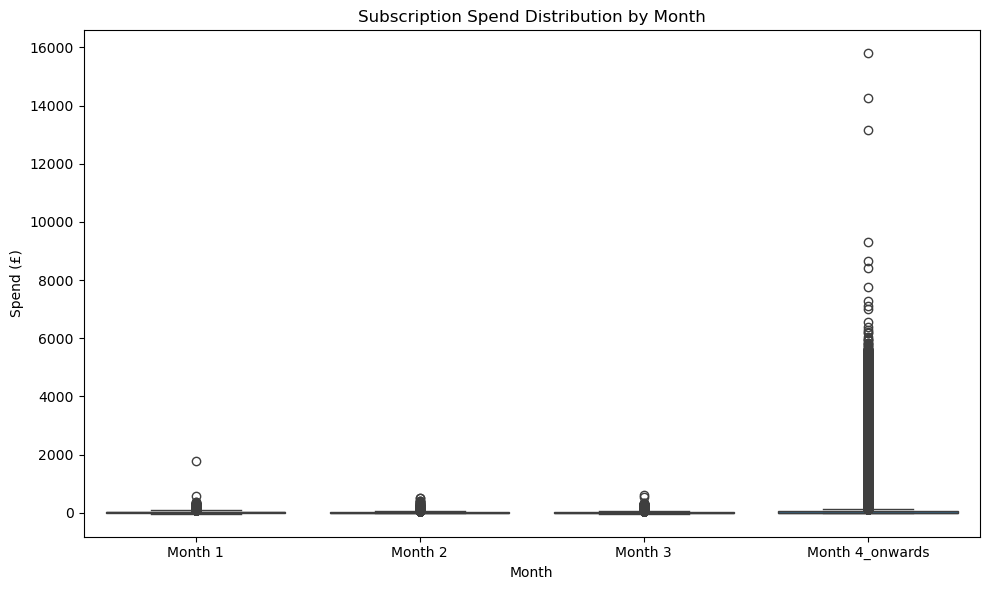

In [212]:
## 4 MONTHS WIHT OUTLIERS

# Columns to compare
monthly_cols = [
    'month_1_sub_total', 'month_2_sub_total',
    'month_3_sub_total', 'month_4_onwards_sub_total'
]

# Melt the data into long format
melted = data[monthly_cols].melt(var_name='Month', value_name='Spend')

# labels
melted['Month'] = melted['Month'].str.replace('_sub_total', '').str.replace('month_', 'Month ')

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Month', y='Spend')
plt.title('Subscription Spend Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Spend (£)')
plt.tight_layout()
plt.show()

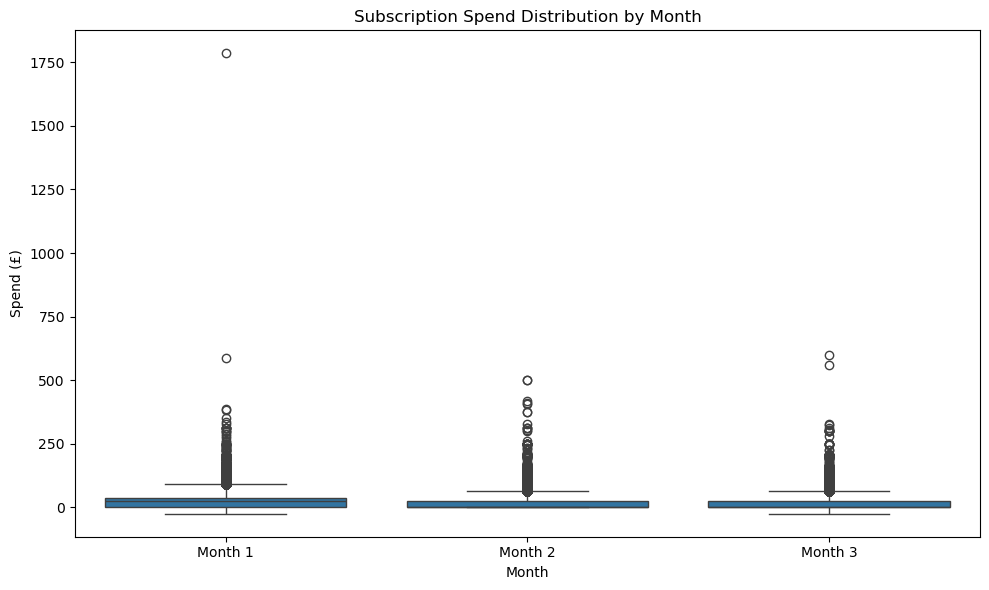

In [57]:
## 3 MONTHS WIHT OUTLIERS


# Columns to compare
monthly_cols = [
    'month_1_sub_total', 'month_2_sub_total',
    'month_3_sub_total'
]

# Melt the data into long format
melted = data[monthly_cols].melt(var_name='Month', value_name='Spend')

# labels
melted['Month'] = melted['Month'].str.replace('_sub_total', '').str.replace('month_', 'Month ')

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Month', y='Spend')
plt.title('Subscription Spend Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Spend (£)')
plt.tight_layout()
plt.show()


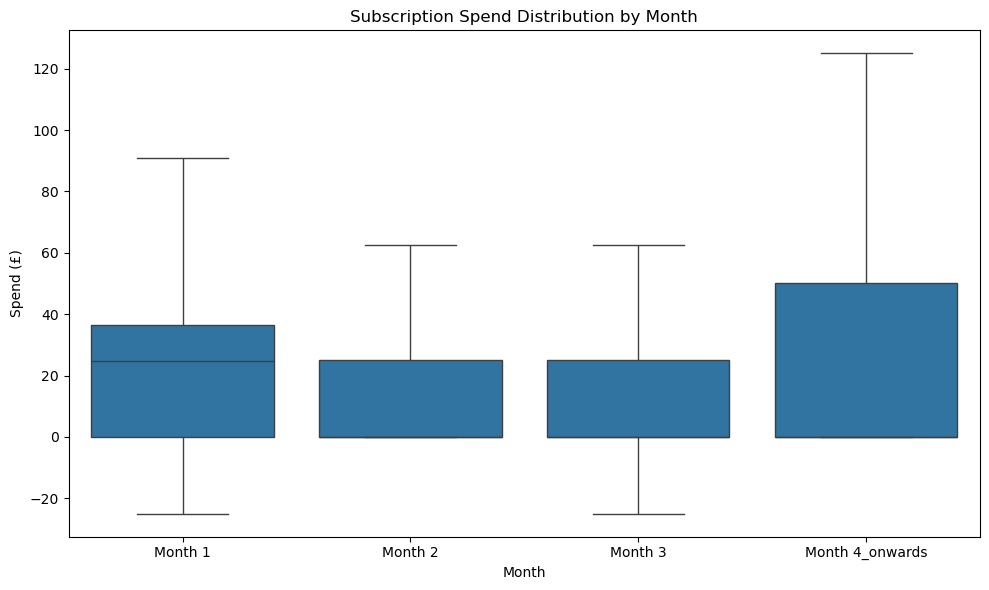

In [218]:
## 4 MONTHS WITHOUT OUTLIERS

# Columns to compare
monthly_cols = [
    'month_1_sub_total', 'month_2_sub_total',
    'month_3_sub_total', 'month_4_onwards_sub_total'
]

# Melt the data into long format
melted = data[monthly_cols].melt(var_name='Month', value_name='Spend')

# Clean up labels
melted['Month'] = melted['Month'].str.replace('_sub_total', '').str.replace('month_', 'Month ')

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Month', y='Spend', showfliers=False)
plt.title('Subscription Spend Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Spend (£)')
plt.tight_layout()
plt.show()


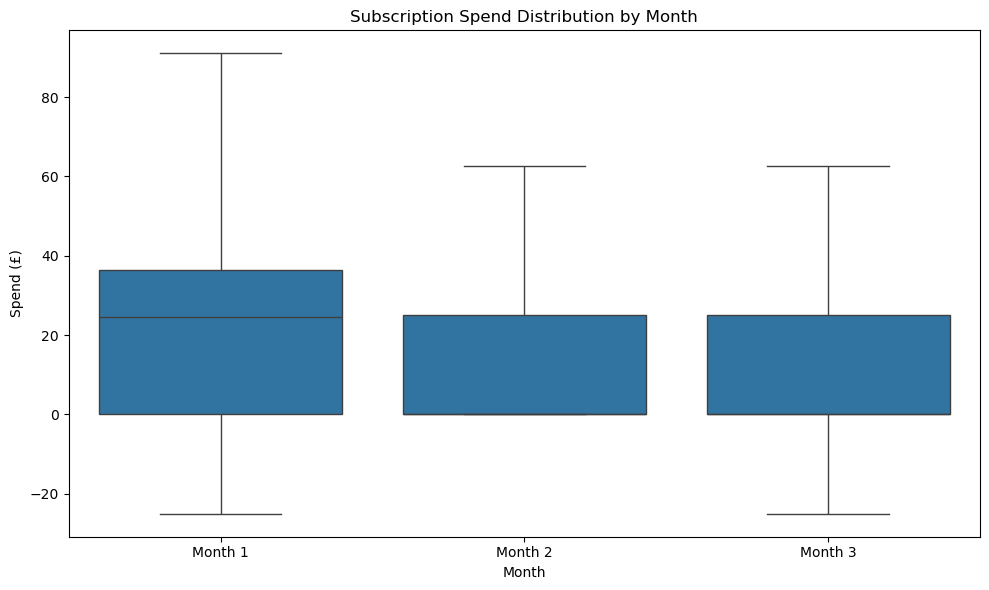

In [59]:
## 3 MONTHS WITHOUT OUTLIERS
# Columns to compare
monthly_cols = [
    'month_1_sub_total', 'month_2_sub_total',
    'month_3_sub_total'
]

# Melt the data into long format
melted = data[monthly_cols].melt(var_name='Month', value_name='Spend')

# Clean up labels
melted['Month'] = melted['Month'].str.replace('_sub_total', '').str.replace('month_', 'Month ')

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Month', y='Spend', showfliers=False)
plt.title('Subscription Spend Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Spend (£)')
plt.tight_layout()
plt.show()


In [ ]:
##

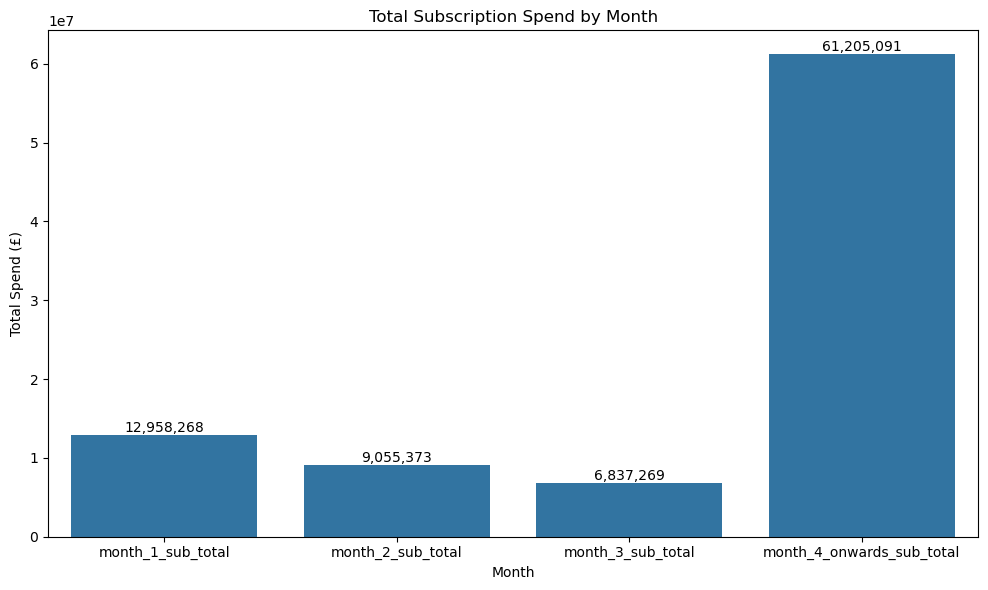

In [60]:
# Aggregate sum of spend per month

monthly_cols = [
    'month_1_sub_total', 'month_2_sub_total',
    'month_3_sub_total', 'month_4_onwards_sub_total'
]
melted= data[monthly_cols].melt(var_name='Month', value_name='Spend')
monthly_totals = melted.groupby('Month', as_index=False)['Spend'].sum()

# Plot total spend per month
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=monthly_totals,
    x='Month',
    y='Spend',
    errorbar=None
)

# Add labels on top of bars
for p in ax.patches:
    amount = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position
        amount,                         # Y position
        f"{amount:,.0f}",                # Format with commas, no decimals
        ha='center', va='bottom', fontsize=10
    )

plt.title('Total Subscription Spend by Month')
plt.xlabel('Month')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()



## BARPLOT spend

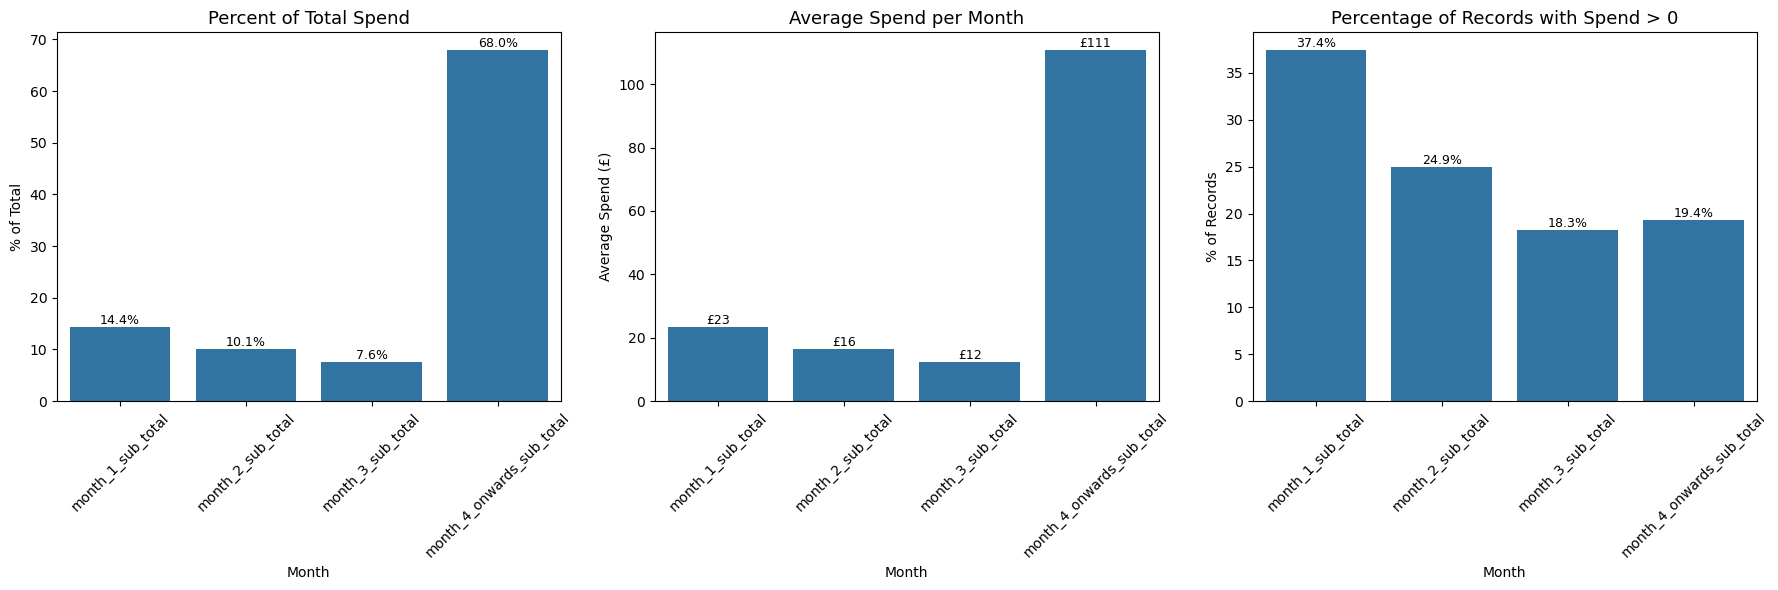

In [129]:
# Ensure month order is consistent
month_order = [
    'month_1_sub_total', 
    'month_2_sub_total',
    'month_3_sub_total', 
    'month_4_onwards_sub_total'
]

# Prepare data
melted = data[month_order].melt(var_name='Month', value_name='Spend')

# 1. Percent of total spend
monthly_totals = (
    melted.groupby('Month', as_index=False)['Spend']
    .sum()
    .assign(Percent=lambda df: df['Spend'] / df['Spend'].sum() * 100)
)

# 2. Average spend per month
monthly_avg = (
    melted.groupby('Month', as_index=False)['Spend']
    .mean()
)

# 3. Percentage of records with spend > 0
monthly_counts = (
    melted[melted['Spend'] > 0]
    .groupby('Month', as_index=False)['Spend']
    .count()
    .rename(columns={'Spend': 'Count'})
)
total_count = monthly_counts['Count'].sum()
monthly_counts['Percent'] = monthly_counts['Count'] / total_count * 100

# Create plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- 1. Percent of total spend ---
ax1 = sns.barplot(
    data=monthly_totals, x='Month', y='Percent',
    ax=axes[0], errorbar=None, order=month_order
)
for p in ax1.patches:
    ax1.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"{p.get_height():.1f}%",
        ha='center', va='bottom', fontsize=9
    )
ax1.set_title('Percent of Total Spend', fontsize=13)
ax1.set_ylabel('% of Total')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)

# --- 2. Average spend per month ---
ax2 = sns.barplot(
    data=monthly_avg, x='Month', y='Spend',
    ax=axes[1], errorbar=None, order=month_order
)
for p in ax2.patches:
    ax2.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"£{p.get_height():,.0f}",
        ha='center', va='bottom', fontsize=9
    )
ax2.set_title('Average Spend per Month', fontsize=13)
ax2.set_ylabel('Average Spend (£)')
ax2.set_xlabel('Month')
ax2.tick_params(axis='x', rotation=45)

# --- 3. Percentage of records where Spend > 0 ---
ax3 = sns.barplot(
    data=monthly_counts, x='Month', y='Percent',
    ax=axes[2], errorbar=None, order=month_order
)
for p in ax3.patches:
    ax3.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"{p.get_height():.1f}%",
        ha='center', va='bottom', fontsize=9
    )
ax3.set_title('Percentage of Records with Spend > 0', fontsize=13)
ax3.set_ylabel('% of Records')
ax3.set_xlabel('Month')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


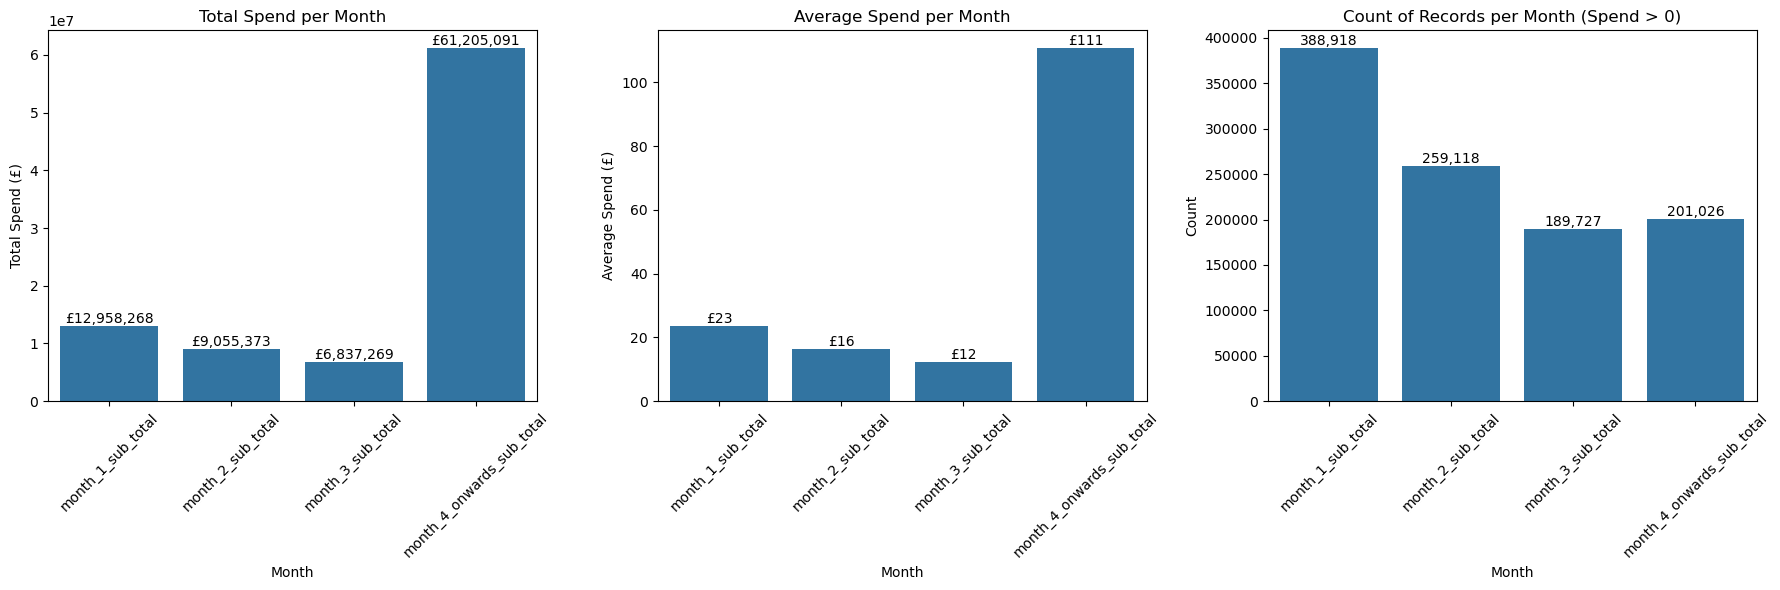

In [145]:
plt.close()


# Ensure month order is consistent
month_order = [
    'month_1_sub_total', 
    'month_2_sub_total',
    'month_3_sub_total', 
    'month_4_onwards_sub_total'
]

# Prepare data
melted = data[month_order].melt(var_name='Month', value_name='Spend')

# 1. Total spend per month
monthly_totals = (
    melted.groupby('Month', as_index=False)['Spend']
    .sum()
)

# 2. Average spend per month
monthly_avg = (
    melted.groupby('Month', as_index=False)['Spend']
    .mean()
)

# 3. Count > 0 only
monthly_counts = (
    melted[melted['Spend'] > 0]
    .groupby('Month', as_index=False)['Spend']
    .count()
    .rename(columns={'Spend': 'Count'})
)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- 1. Total spend in £ ---
ax1 = sns.barplot(data=monthly_totals, x='Month', y='Spend', ax=axes[0], errorbar=None, order=month_order)
for p in ax1.patches:
    ax1.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"£{p.get_height():,.0f}",
        ha='center', va='bottom'
    )
ax1.set_title('Total Spend per Month')
ax1.set_ylabel('Total Spend (£)')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)

# --- 2. Average spend in £ ---
ax2 = sns.barplot(data=monthly_avg, x='Month', y='Spend', ax=axes[1], errorbar=None, order=month_order)
for p in ax2.patches:
    ax2.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"£{p.get_height():,.0f}",
        ha='center', va='bottom'
    )
ax2.set_title('Average Spend per Month')
ax2.set_ylabel('Average Spend (£)')
ax2.set_xlabel('Month')
ax2.tick_params(axis='x', rotation=45)

# --- 3. Count of records ---
ax3 = sns.barplot(data=monthly_counts, x='Month', y='Count', ax=axes[2], errorbar=None, order=month_order)
for p in ax3.patches:
    ax3.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"{int(p.get_height()):,}",
        ha='center', va='bottom'
    )
ax3.set_title('Count of Records per Month (Spend > 0)')
ax3.set_ylabel('Count')
ax3.set_xlabel('Month')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



### Compare Boxplots Shop

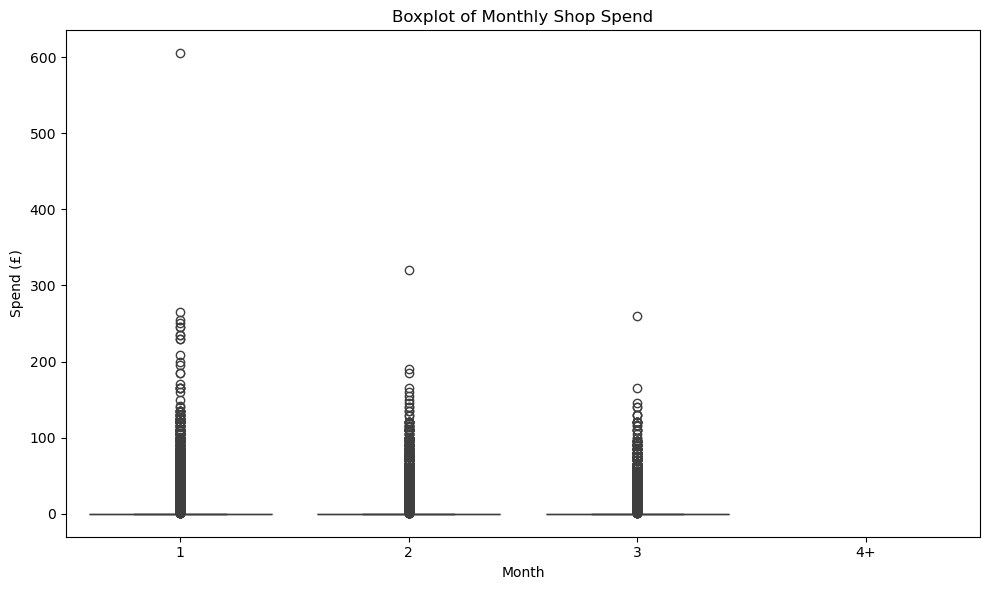

In [63]:


# Columns for shop spend
shop_cols = [
    'month_1_shop_total',
    'month_2_shop_total',
    'month_3_shop_total',
    'month_4_onwards_shop_total'
]

# Melt into long format
shop_melted = data[shop_cols].melt(var_name='Month', value_name='Spend')

# labels
shop_melted['Month'] = shop_melted['Month'].str.extract(r'month_(\d+|4_onwards)')[0]
shop_melted['Month'] = shop_melted['Month'].replace({'4_onwards': '4+'})
shop_melted['Month'] = pd.Categorical(shop_melted['Month'], categories=['1', '2', '3', '4+'], ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=shop_melted, x='Month', y='Spend')
plt.title('Boxplot of Monthly Shop Spend')
plt.xlabel('Month')
plt.ylabel('Spend (£)')
plt.tight_layout()
plt.show()


# TOTAL SPEND + Average Spend by CATEGORY

In [147]:
data_c.select_dtypes(include=['object', 'category']).columns.tolist()

['market_code',
 'customer_id',
 'subscription_id',
 'postcode_sector',
 'acquisition_master_channel',
 'acquisition_channel',
 'acquisition_coupon_code',
 'restart_master_channel',
 'restart_channel',
 'restart_coupon_code',
 'original_plan_frequency',
 'latest_plan_frequency',
 'original_product_tier',
 'latest_product_tier',
 'email_unsubscribe_date',
 'is_active']

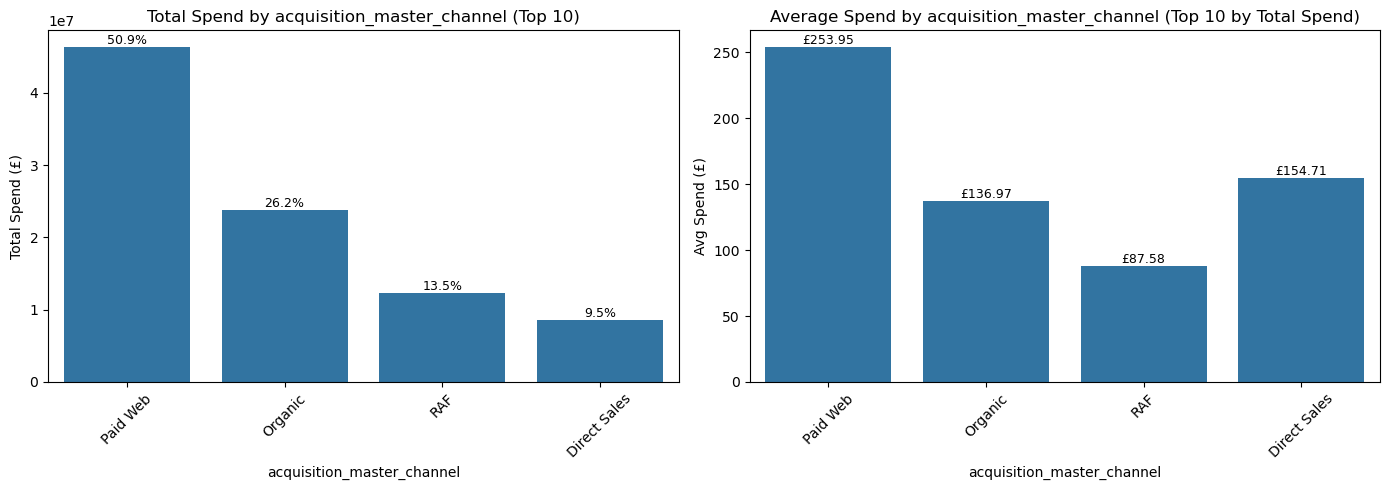

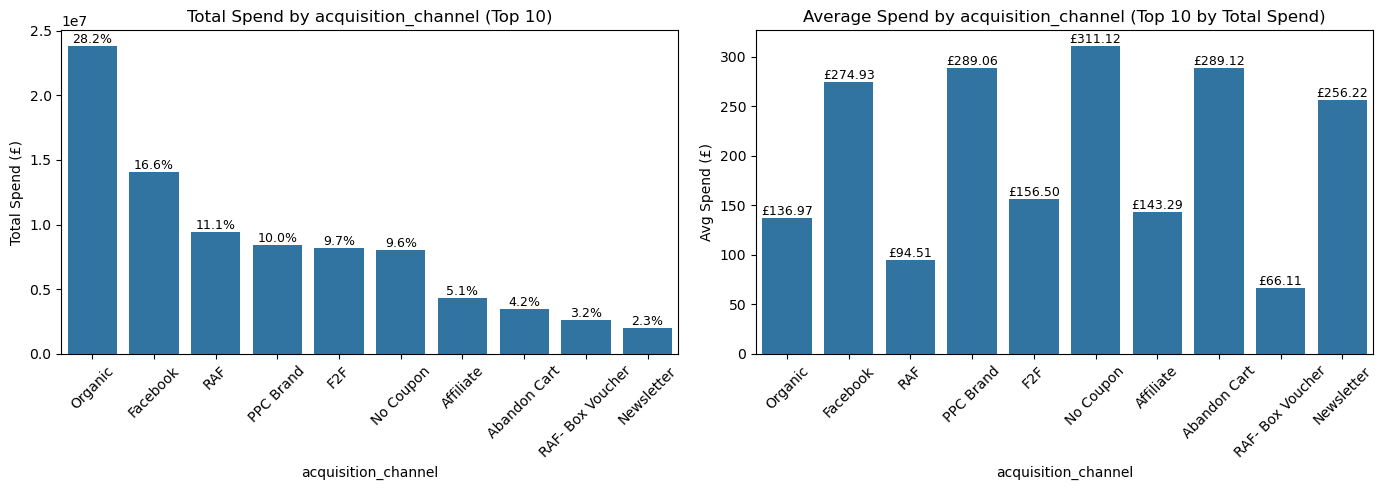

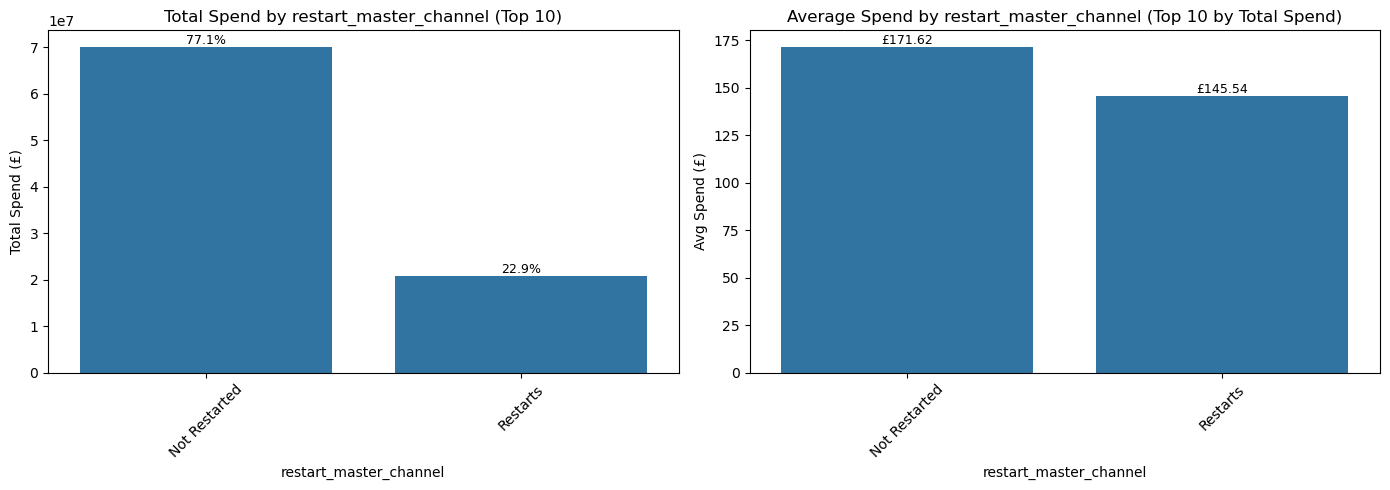

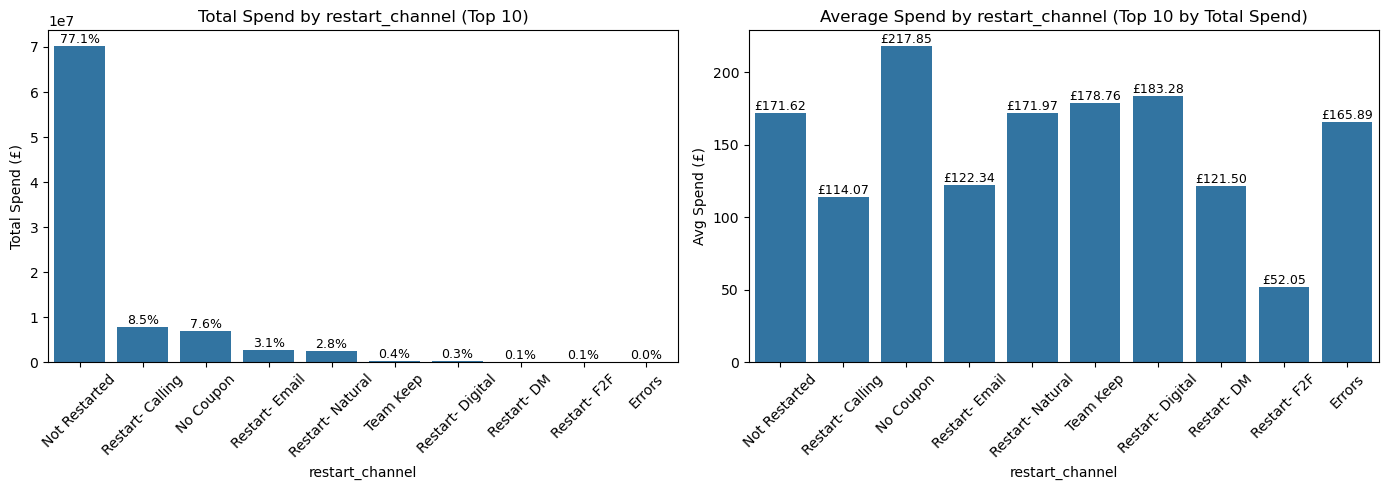

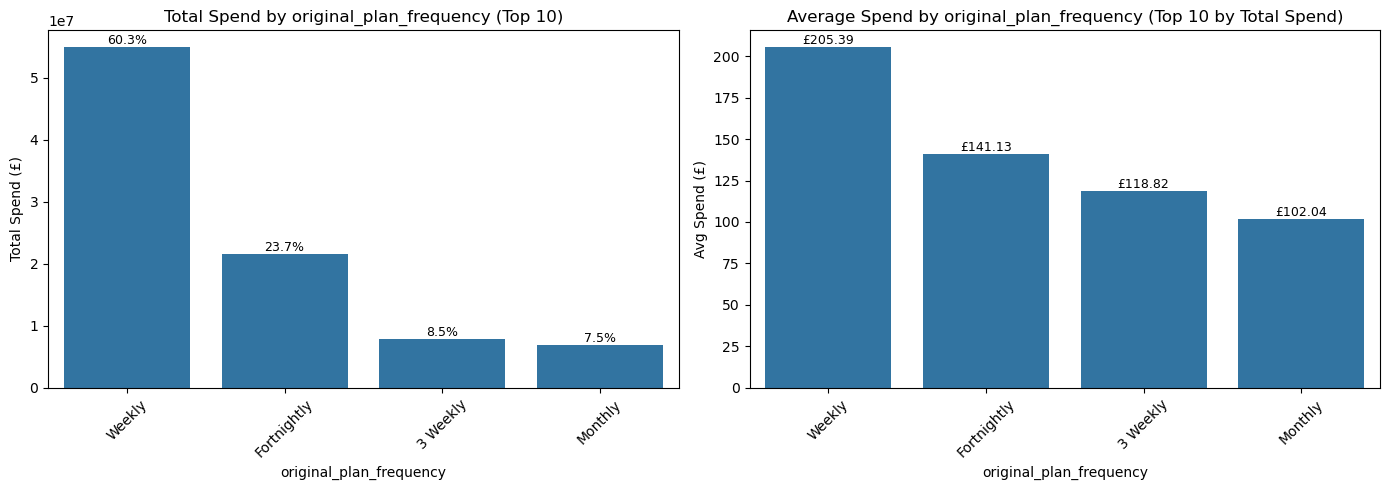

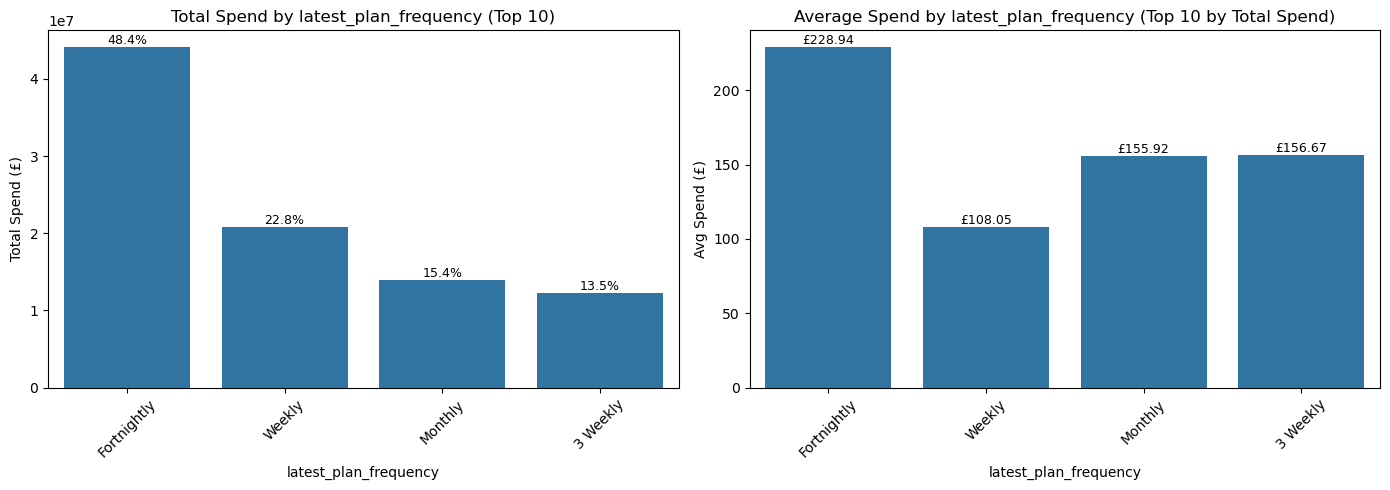

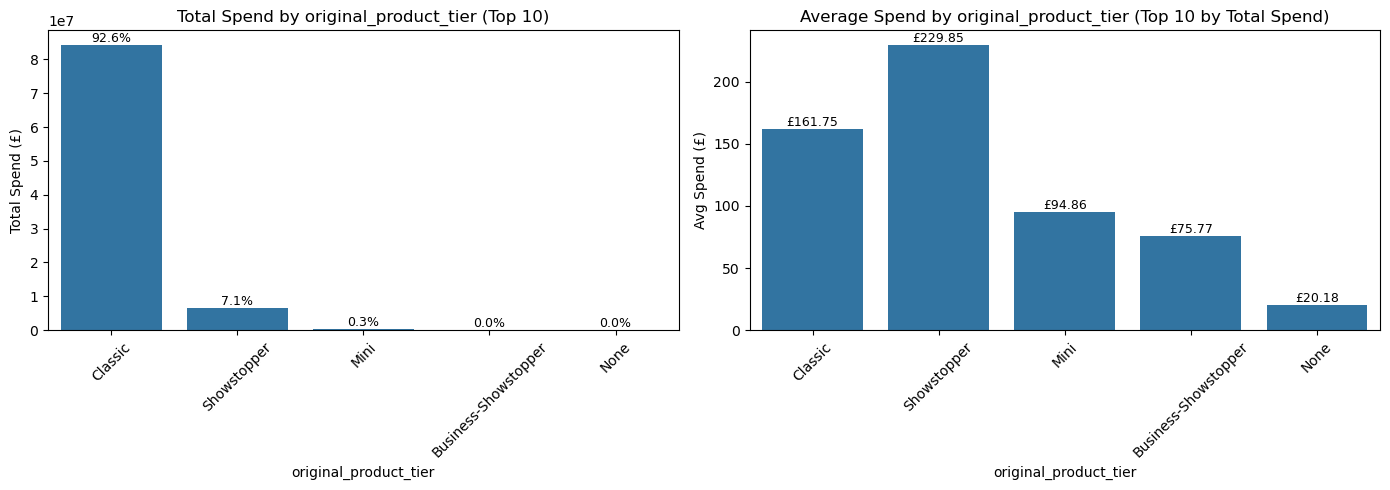

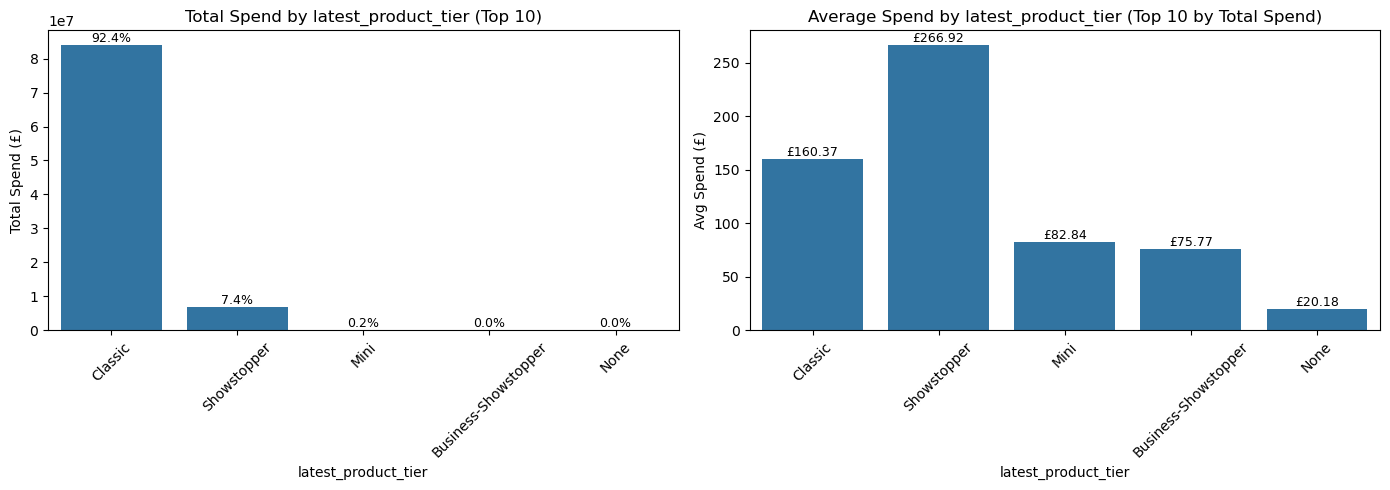

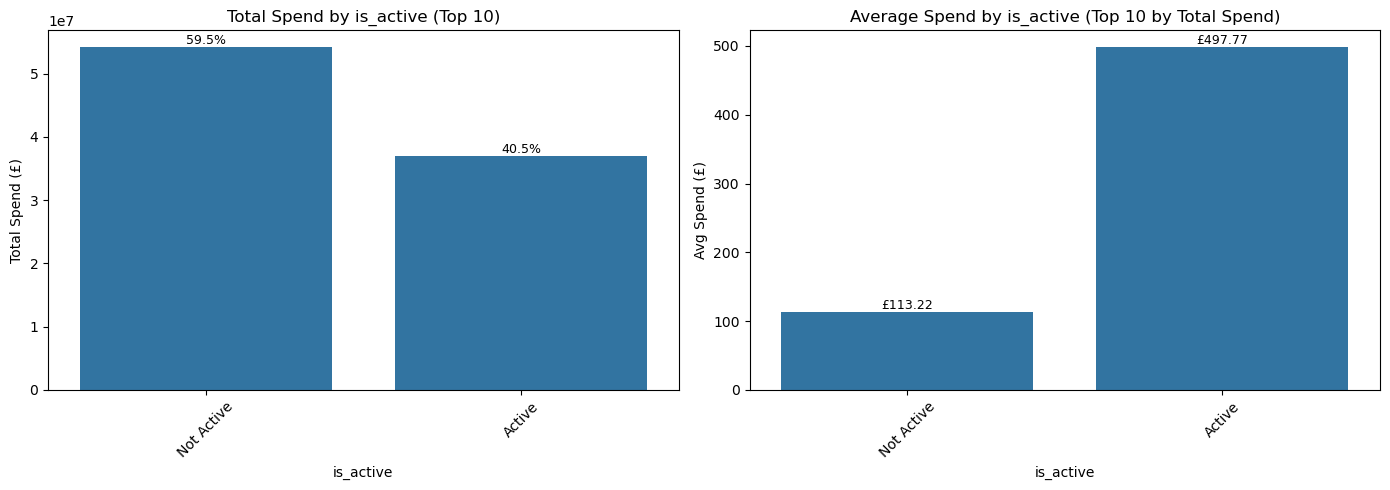

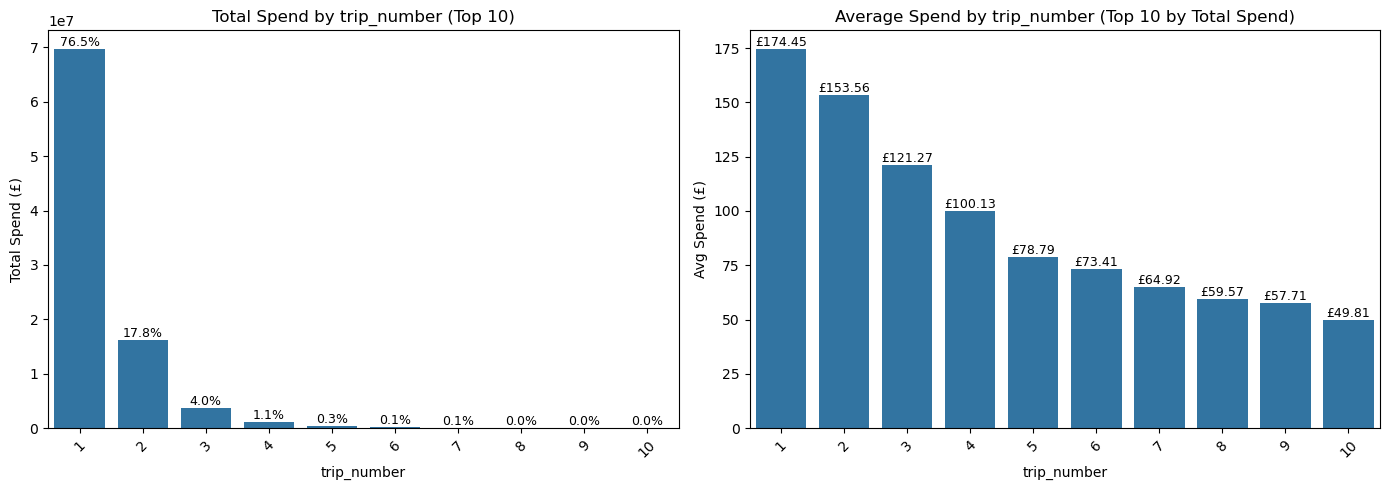

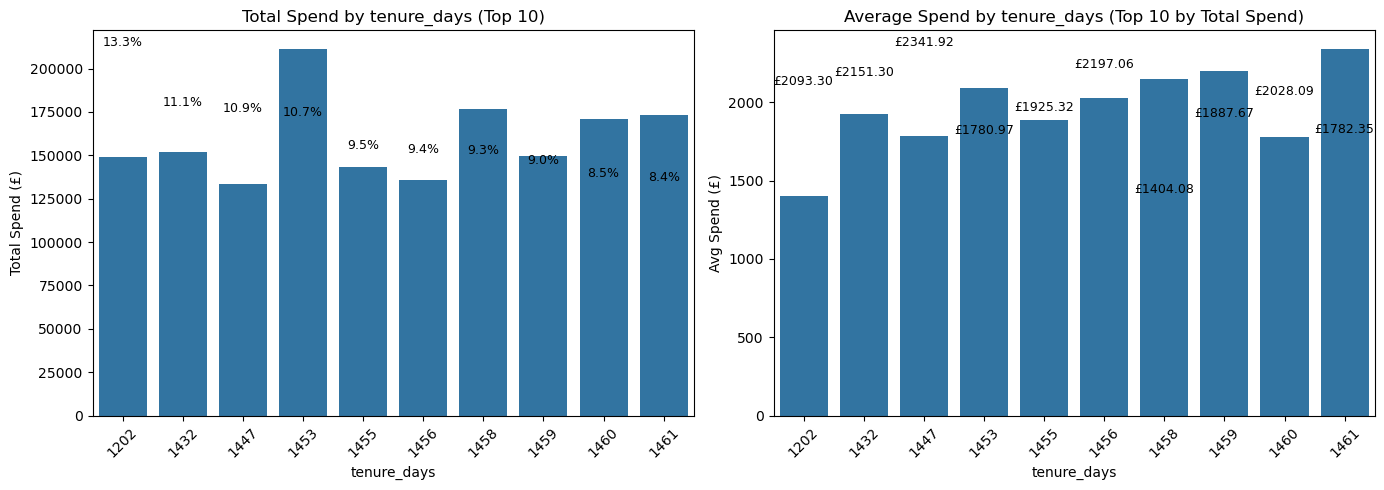

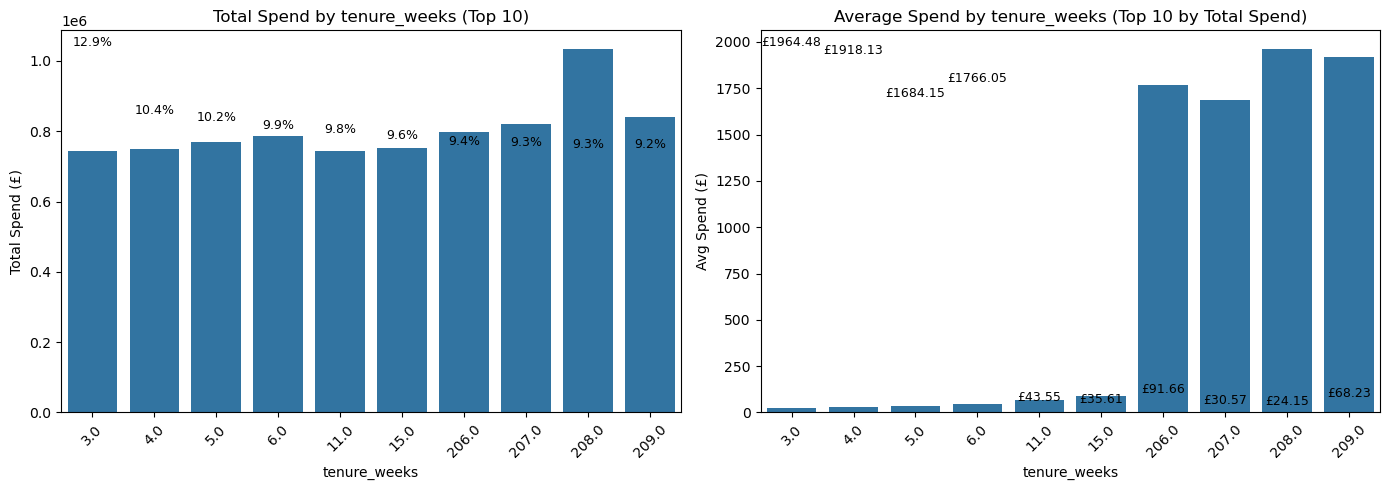

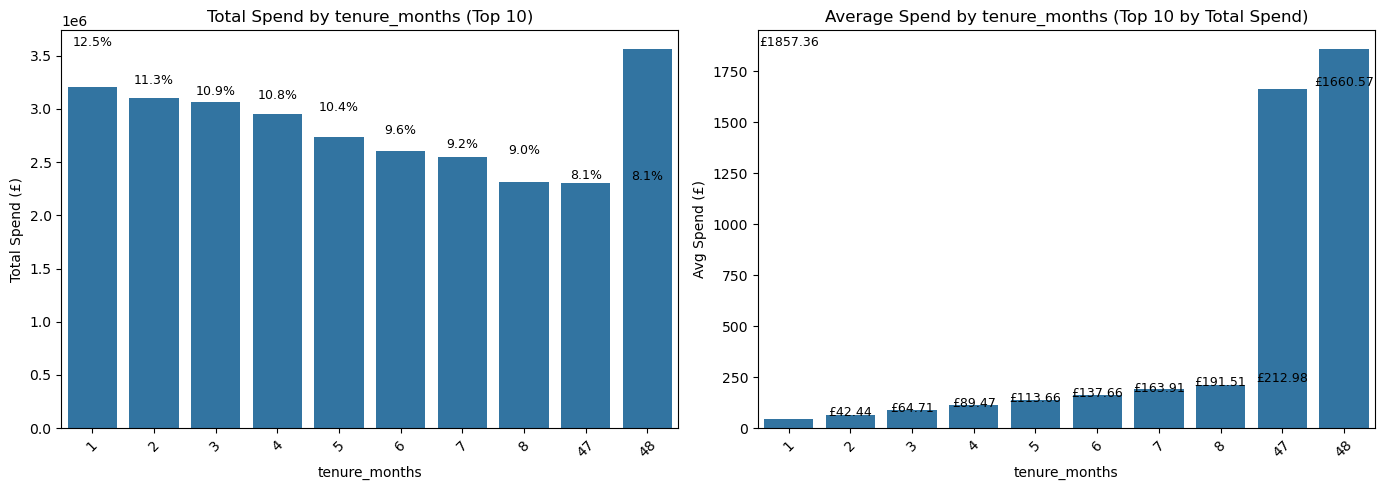

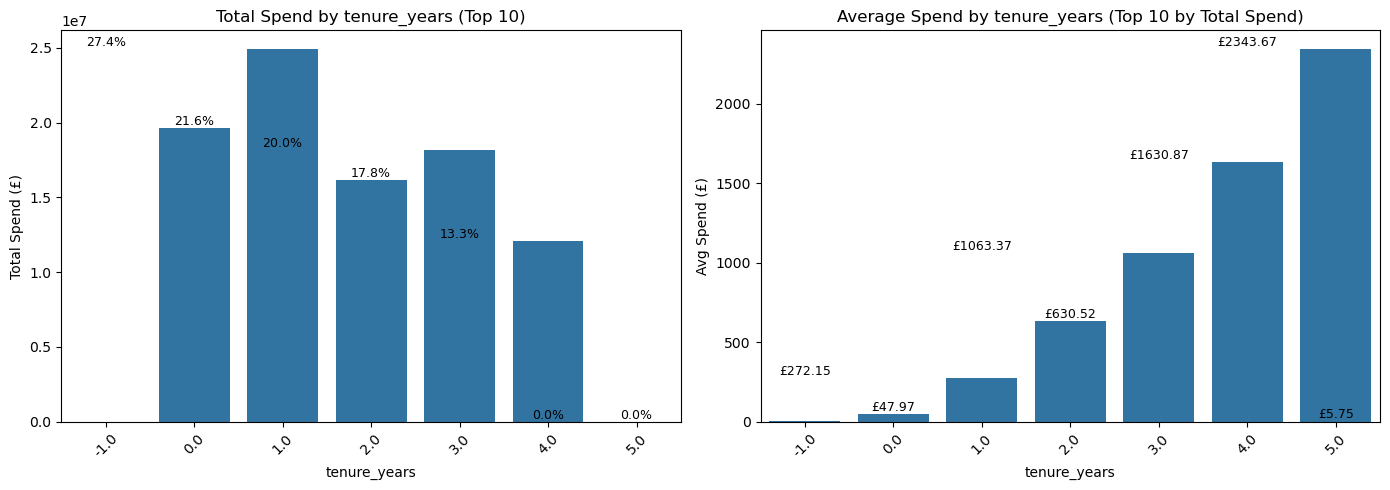

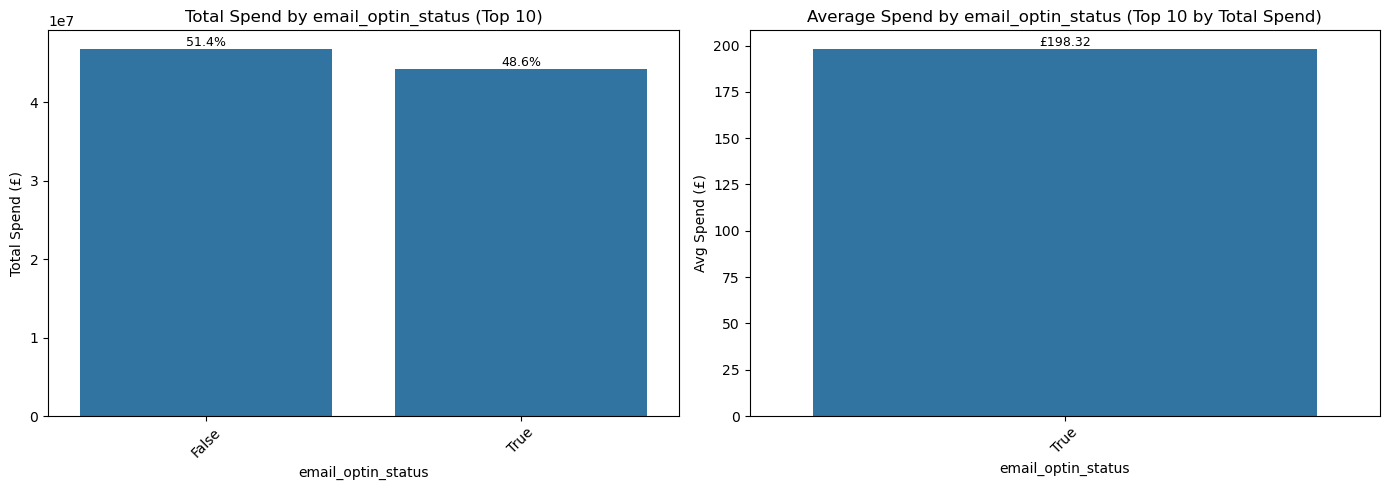

In [154]:

categorical_cols = [
    'acquisition_master_channel', 'acquisition_channel',
    'restart_master_channel', 'restart_channel',
    'original_plan_frequency', 'latest_plan_frequency',
    'original_product_tier', 'latest_product_tier',
    'is_active', 'trip_number', 'tenure_days', 'tenure_weeks', 'tenure_months', 'tenure_years', 'email_optin_status', 
]

# Round tenure for grouping
data['tenure_months'] = data['tenure_months'].round()
data['tenure_years'] = data['tenure_years'].round(1)

for col in categorical_cols:
    # Total spend (top 10)
    total_spend = (
        data.groupby(col)['total_spend']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )

    # % of total
    grand_total = total_spend['total_spend'].sum()
    total_spend['percent'] = (total_spend['total_spend'] / grand_total * 100).round(1)

    # Average spend
    avg_spend = (
        data.groupby(col)['total_spend']
        .mean()
        .loc[total_spend[col]]
        .reset_index()
        .rename(columns={'total_spend': 'avg_spend'})
    )

    # Plot side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Total Spend Plot
    sns.barplot(data=total_spend, x=col, y='total_spend', ax=axes[0])
    axes[0].set_title(f'Total Spend by {col} (Top 10)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Total Spend (£)')
    axes[0].tick_params(axis='x', rotation=45)

    for i, row in total_spend.iterrows():
        axes[0].text(i, row['total_spend'], f"{row['percent']}%", ha='center', va='bottom', fontsize=9)

    # Average Spend Plot
    sns.barplot(data=avg_spend, x=col, y='avg_spend', ax=axes[1])
    axes[1].set_title(f'Average Spend by {col} (Top 10 by Total Spend)')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Avg Spend (£)')
    axes[1].tick_params(axis='x', rotation=45)

    for i, row in avg_spend.iterrows():
        axes[1].text(i, row['avg_spend'], f"£{row['avg_spend']:.2f}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()




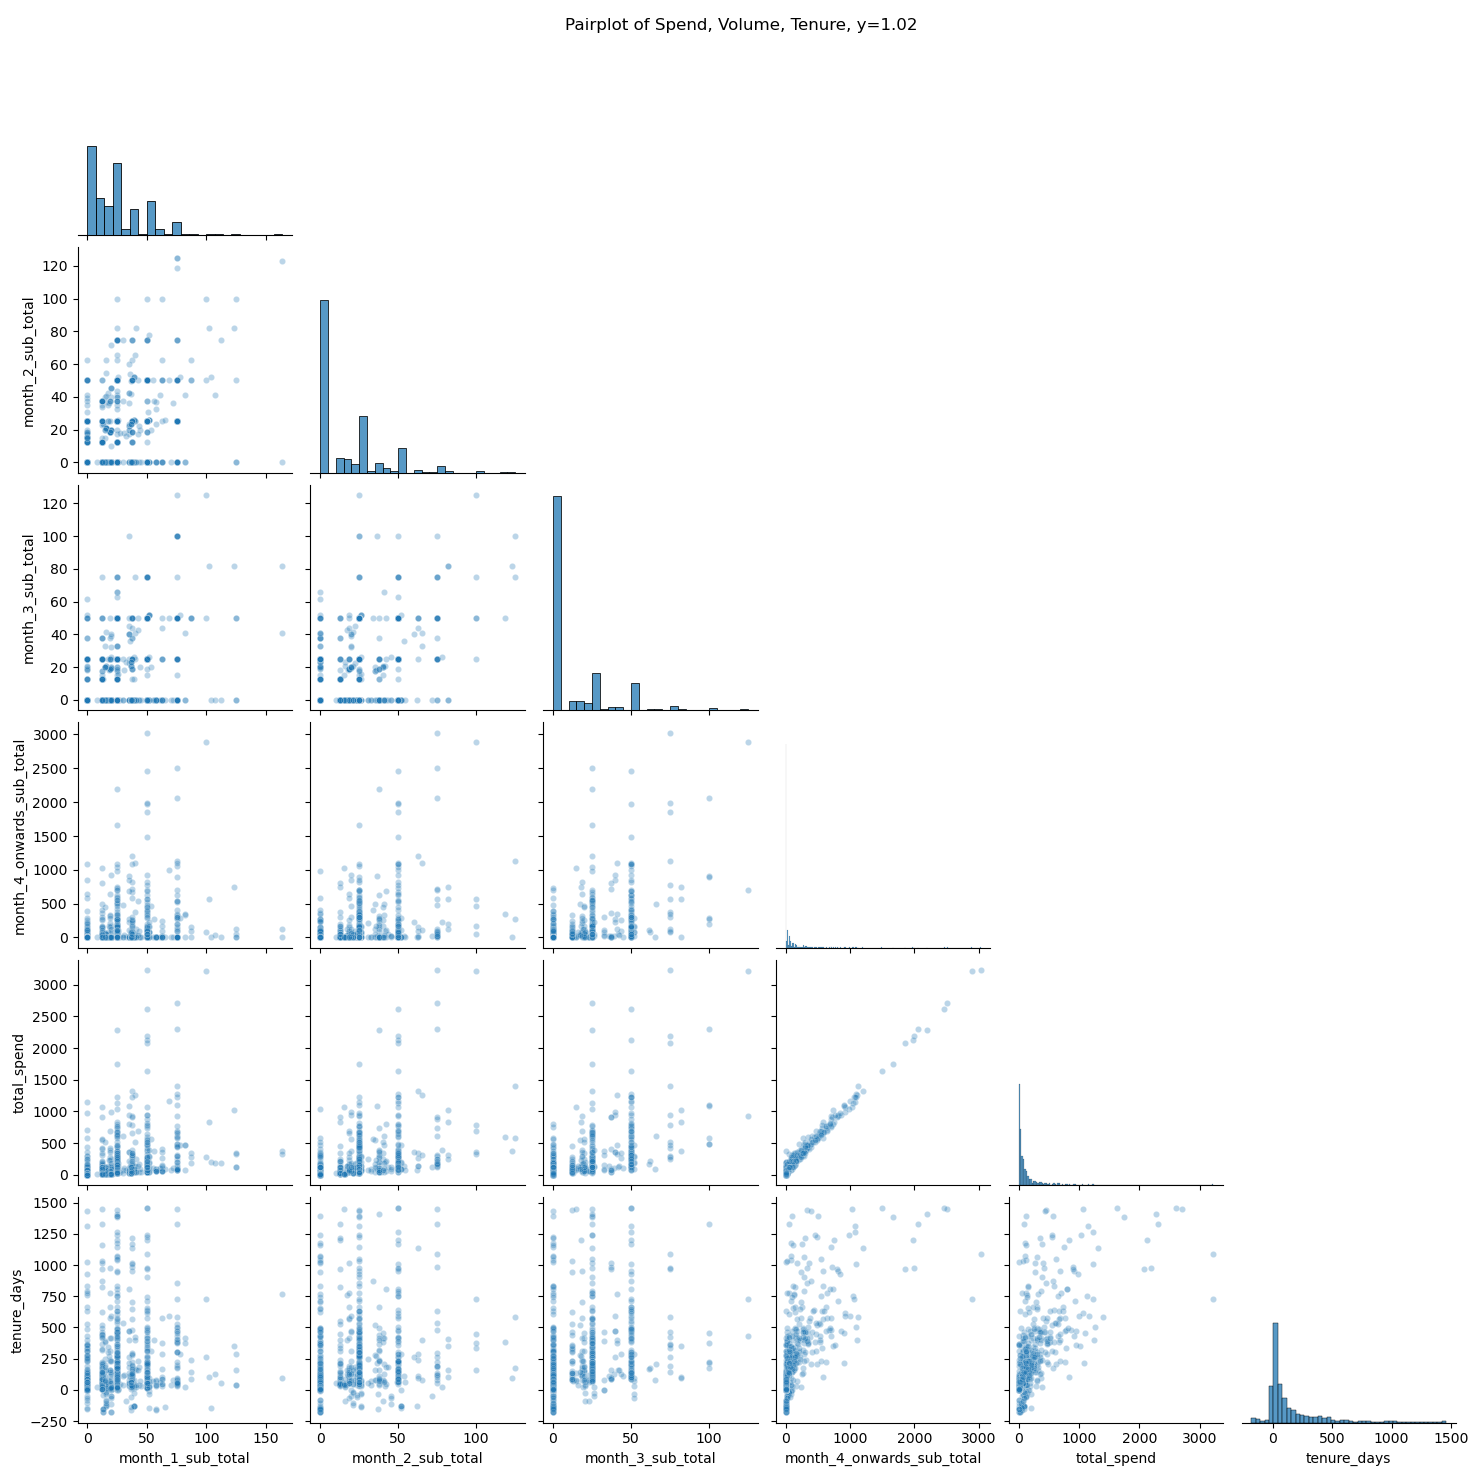

In [66]:


pairplot_cols = [

    'month_1_sub_total',
    'month_2_sub_total',
    'month_3_sub_total',
    'month_4_onwards_sub_total', 'total_spend',
    'tenure_days']

# Sample (optional) if dataset is large to speed up rendering
sampled_data = data[pairplot_cols].dropna().sample(n=1000, random_state=42)

# Plot
sns.pairplot(sampled_data, corner=True, plot_kws={'alpha': 0.3, 's': 20})
plt.suptitle("Pairplot of Spend, Volume, Tenure, y=1.02")
plt.show()


# Quartiles on total spend 

In [160]:
## Create columns for total spend quartiles and outliers


# build quartiles
Q1 = data['total_spend'].quantile(0.25)
Q2 = data['total_spend'].quantile(0.5)
Q3 = data['total_spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Full 6-category spend_segment
def label_spend(value):
    if value < lower_bound:
        return 'Low Outlier'
    elif value > upper_bound:
        return 'High Outlier'
    elif value <= Q1:
        return 'Q1'
    elif value <= Q2:
        return 'Q2'
    elif value <= Q3:
        return 'Q3'
    else:
        return 'Q4'

data['spend_segment'] = data['total_spend'].apply(label_spend)

# Adjusted quartiles: collapse outliers into Q1/Q4
def map_outliers_to_quartiles(segment):
    if segment == 'Low Outlier':
        return 'Q1'
    elif segment == 'High Outlier':
        return 'Q4'
    else:
        return segment

data['spend_quartile_adjusted'] = data['spend_segment'].apply(map_outliers_to_quartiles)




In [69]:
quartile_order = ['Q1', 'Q2', 'Q3', 'Q4']
full_order = ['Low Outlier', 'Q1', 'Q2', 'Q3', 'Q4', 'High Outlier']

data['spend_segment'] = pd.Categorical(data['spend_segment'], categories=full_order, ordered=True)

data['spend_quartile_adjusted'] = pd.Categorical(data['spend_quartile_adjusted'], categories=quartile_order, ordered=True)


In [70]:
data.head()

market_code customer_id subscription_id subscription_start_date  \
0          UK     2287026          564953              2021-08-24   
1          UK     2646497          761192              2022-07-01   
2          UK     2577429          647982              2022-01-13   
3          UK     2685035          759259              2022-06-25   
4          UK     2481431          610650              2021-11-22   

  subscription_cancellation_date postcode_sector acquisition_master_channel  \
0                     2021-12-16            CA13                    Organic   
1                     2022-08-02            NE31                    Organic   
2                     2022-04-29            EX16                   Paid Web   
3                     2023-05-15             SW8               Direct Sales   
4                            NaT            TW18                        RAF   

  acquisition_channel acquisition_coupon_code restart_master_channel  \
0             Organic               No Coupon               Restarts   
1             Organic               No Coupon               Restarts   
2            Facebook               NEWYEAR15          Not Restarted   
3                 F2F               50FLOWERY          Not Restarted   
4                 RAF               ANDYW9971          Not Restarted   

    restart_channel restart_coupon_code  trip_number original_plan_frequency  \
0  Restart- Natural              R3X7H3            2                  Weekly   
1         No Coupon           No Coupon            2             Fortnightly   
2     Not Restarted           No Coupon            1             Fortnightly   
3     Not Restarted           No Coupon            1                  Weekly   
4     Not Restarted           No Coupon            1                  Weekly   

  latest_plan_frequency original_product_tier latest_product_tier  \
0                Weekly               Classic             Classic   
1           Fortnightly               Classic             Classic   
2           Fortnightly               Classic             Classic   
3               Monthly               Classic             Classic   
4           Fortnightly               Classic             Classic   

   no_of_showstopper_boxes_received  email_optin_status  \
0                                 0                True   
1                                 0                True   
2                                 0               False   
3                                 0                True   
4                                 0               False   

  email_unsubscribe_date  raf_subscription_count  raf_gift_count  \
0                    NaN                       0               0   
1                    NaN                       4               0   
2             20/03/2025                       1               0   
3                    NaN                       0               0   
4             16/12/2022                       1               0   

   volume_of_RMF_ratings  average_RMF_rating  order_error_tag_total  \
0                      2                3.63                      1   
1                      1                2.50                      0   
2                      1                4.00                      0   
3                      1                5.00                      3   
4                      3                2.50                      0   

   error_discount_total  month_1_sub_total  month_1_shop_total  \
0                   0.0                0.0                 0.0   
1                   0.0               12.5                 0.0   
2                   0.0               17.5                 0.0   
3                  25.0               25.0                 0.0   
4                   0.0                0.0                 0.0   

   month_2_sub_total  month_2_shop_total  month_3_sub_total  \
0                0.0                 0.0                0.0   
1                0.0                 0.0                0.0   
2     

### Average spend by Quartile

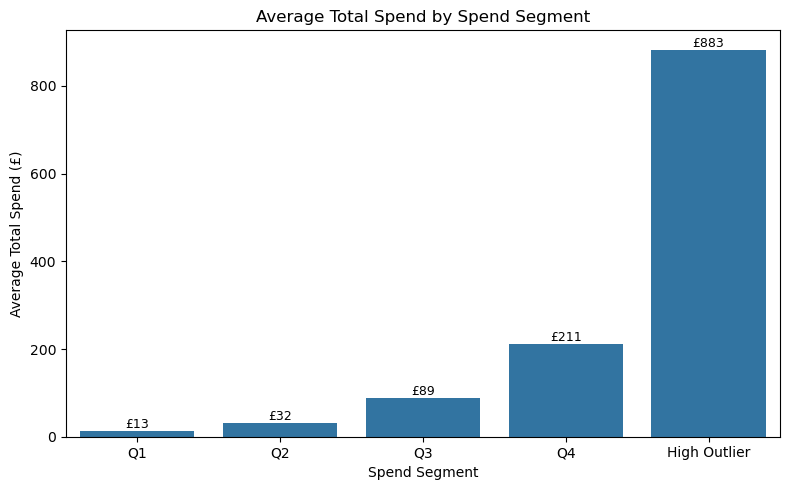

In [170]:
# Group by segment - Mean (Spend > 0 only)
avg_spend_by_segment = (
    data[data['total_spend'] > 0]
    .groupby('spend_segment', observed=False)['total_spend']
    .mean()
    .reindex(['Low Outlier', 'Q1', 'Q2', 'Q3', 'Q4', 'High Outlier'])
    .reset_index()
    .dropna()
)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=avg_spend_by_segment, x='spend_segment', y='total_spend')
plt.title('Average Total Spend by Spend Segment')
plt.xlabel('Spend Segment')
plt.ylabel('Average Total Spend (£)')

# Correctly placed labels
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # center of the bar
        p.get_height(),                 # top of the bar
        f"£{p.get_height():,.0f}",
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()




### Total spend by Quartile

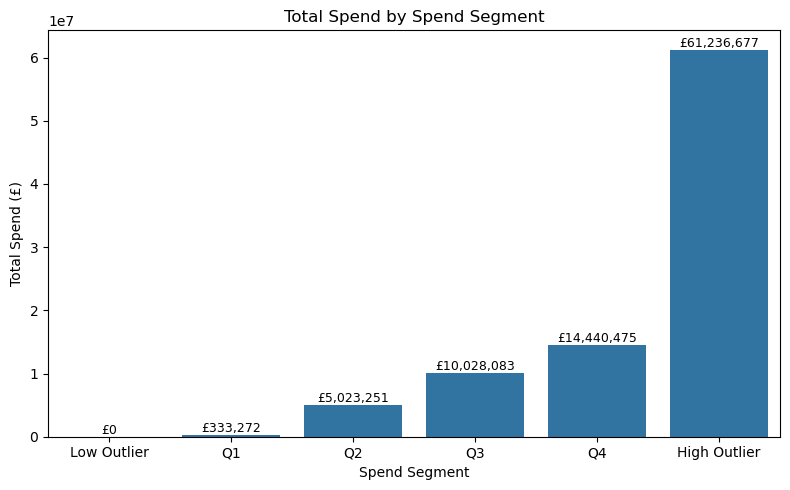

In [74]:
# Group by segment - Sum
total_spend_by_segment = (
    data.groupby('spend_segment', observed=False)['total_spend']
    .sum()
    .reindex(['Low Outlier', 'Q1', 'Q2', 'Q3', 'Q4', 'High Outlier'])
    .reset_index()
    .dropna()
)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=total_spend_by_segment, x='spend_segment', y='total_spend')
plt.title('Total Spend by Spend Segment')
plt.xlabel('Spend Segment')
plt.ylabel('Total Spend (£)')

# Value labels
for i, row in total_spend_by_segment.iterrows():
    ax.text(i, row['total_spend'], f"£{row['total_spend']:,.0f}", 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Count of cusotmers by Quartile

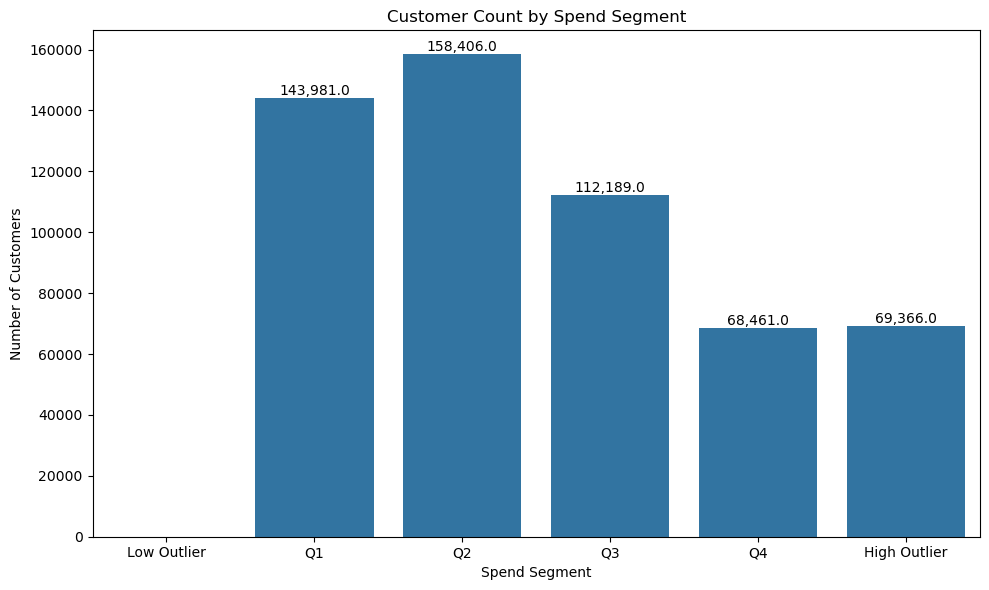

In [76]:
## countplot

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='spend_segment')

# Add text labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Customer Count by Spend Segment')
plt.xlabel('Spend Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()



### Total spend, Average spend anc cusotmers by Quartile

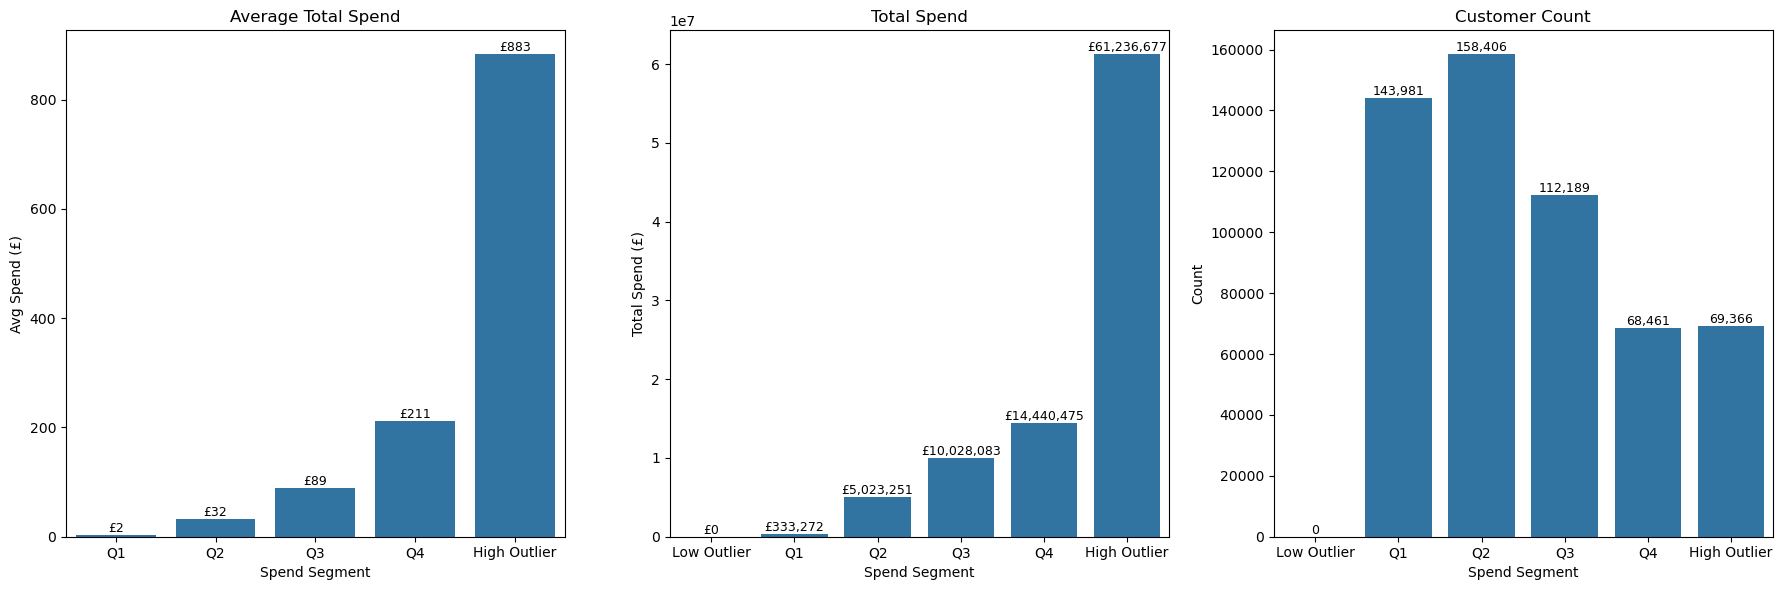

In [78]:

# Compute count
count_by_segment = (
    data['spend_segment']
    .value_counts()
    .fillna(0)
    .astype(int)  
    .reset_index()
)
count_by_segment.columns = ['spend_segment', 'count']

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Average Spend
sns.barplot(data=avg_spend_by_segment, x='spend_segment', y='total_spend', ax=axes[0])
axes[0].set_title('Average Total Spend')
axes[0].set_ylabel('Avg Spend (£)')
axes[0].set_xlabel('Spend Segment')
for i, val in enumerate(avg_spend_by_segment['total_spend']):
    axes[0].text(i, val, f'£{val:,.0f}', ha='center', va='bottom', fontsize=9)

# Total Spend
sns.barplot(data=total_spend_by_segment, x='spend_segment', y='total_spend', ax=axes[1])
axes[1].set_title('Total Spend')
axes[1].set_ylabel('Total Spend (£)')
axes[1].set_xlabel('Spend Segment')
for i, val in enumerate(total_spend_by_segment['total_spend']):
    axes[1].text(i, val, f'£{val:,.0f}', ha='center', va='bottom', fontsize=9)

# Count of Customers
sns.barplot(data=count_by_segment, x='spend_segment', y='count', ax=axes[2])
axes[2].set_title('Customer Count')
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Spend Segment')
for p in axes[2].patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    axes[2].text(x, height, f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# Final layout
plt.tight_layout()
plt.show()



### TOTAL SPEND, Average spend anc cusotmers by QUARTILE with %

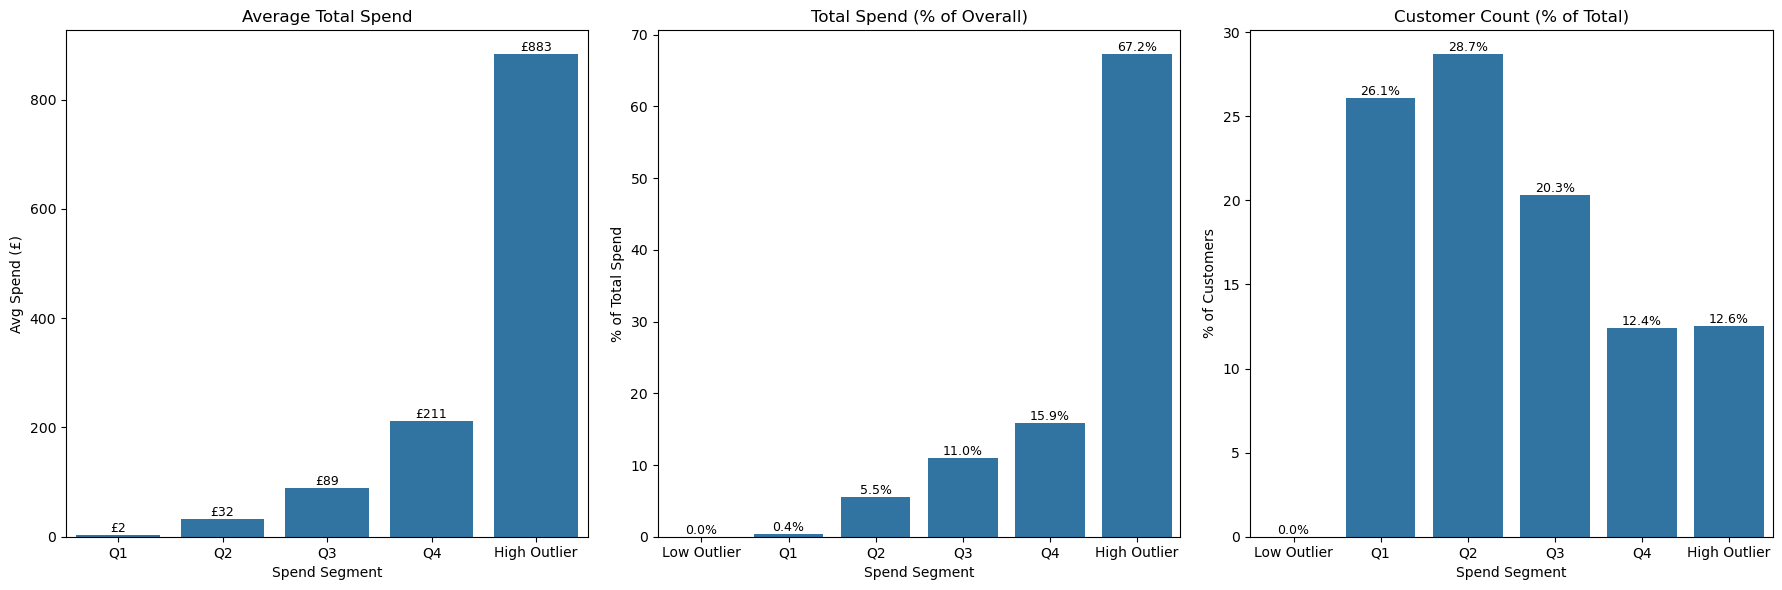

In [80]:
# Compute total spend percentage
total_spend_by_segment_pct = total_spend_by_segment.copy()
total_spend_by_segment_pct['percent'] = (
    total_spend_by_segment_pct['total_spend'] / total_spend_by_segment_pct['total_spend'].sum() * 100
)

# Compute customer count percentage
count_by_segment = (
    data['spend_segment']
    .value_counts()
    .fillna(0)
    .astype(int)  
    .reset_index()
)
count_by_segment.columns = ['spend_segment', 'count']
count_by_segment['percent'] = (
    count_by_segment['count'] / count_by_segment['count'].sum() * 100
)

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Average Spend
sns.barplot(data=avg_spend_by_segment, x='spend_segment', y='total_spend', ax=axes[0])
axes[0].set_title('Average Total Spend')
axes[0].set_ylabel('Avg Spend (£)')
axes[0].set_xlabel('Spend Segment')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width()/2, height, f'£{height:,.0f}', 
                 ha='center', va='bottom', fontsize=9)

# 2. Total Spend as Percentage of Total
sns.barplot(data=total_spend_by_segment_pct, x='spend_segment', y='percent', ax=axes[1])
axes[1].set_title('Total Spend (% of Overall)')
axes[1].set_ylabel('% of Total Spend')
axes[1].set_xlabel('Spend Segment')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width()/2, height, f'{height:.1f}%', 
                 ha='center', va='bottom', fontsize=9)

# 3. Customer Count as Percentage
sns.barplot(data=count_by_segment, x='spend_segment', y='percent', ax=axes[2])
axes[2].set_title('Customer Count (% of Total)')
axes[2].set_ylabel('% of Customers')
axes[2].set_xlabel('Spend Segment')
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(p.get_x() + p.get_width()/2, height, f'{height:.1f}%', 
                 ha='center', va='bottom', fontsize=9)

# Final layout
plt.tight_layout()
plt.show()


### Total spenddistribution by psend segments (quartiles)

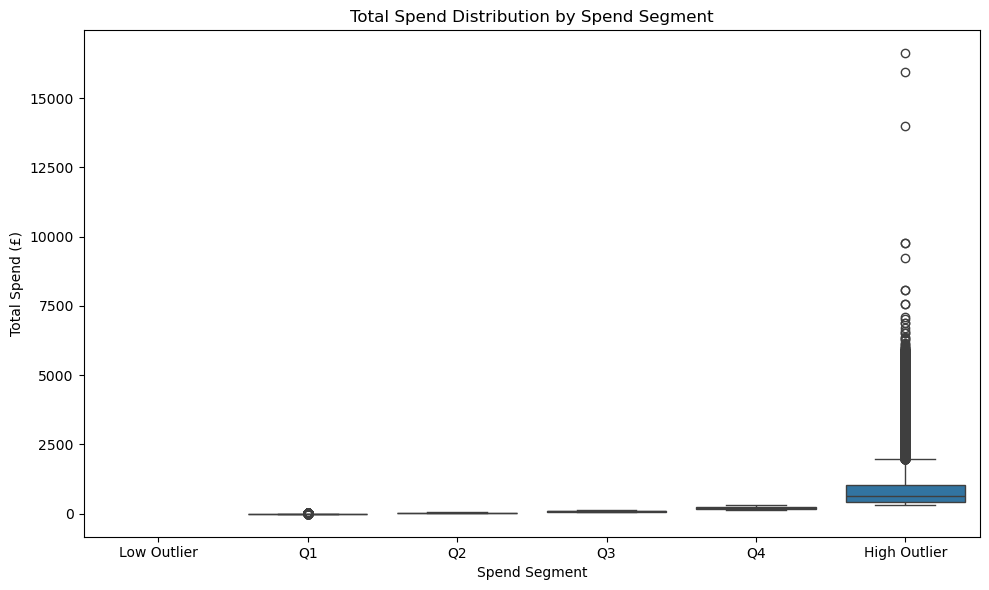

In [82]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='spend_segment', y='total_spend')
plt.title('Total Spend Distribution by Spend Segment')
plt.xlabel('Spend Segment')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()


### Total spenddistribution by psend segments (quartiles) No OUTLIERS

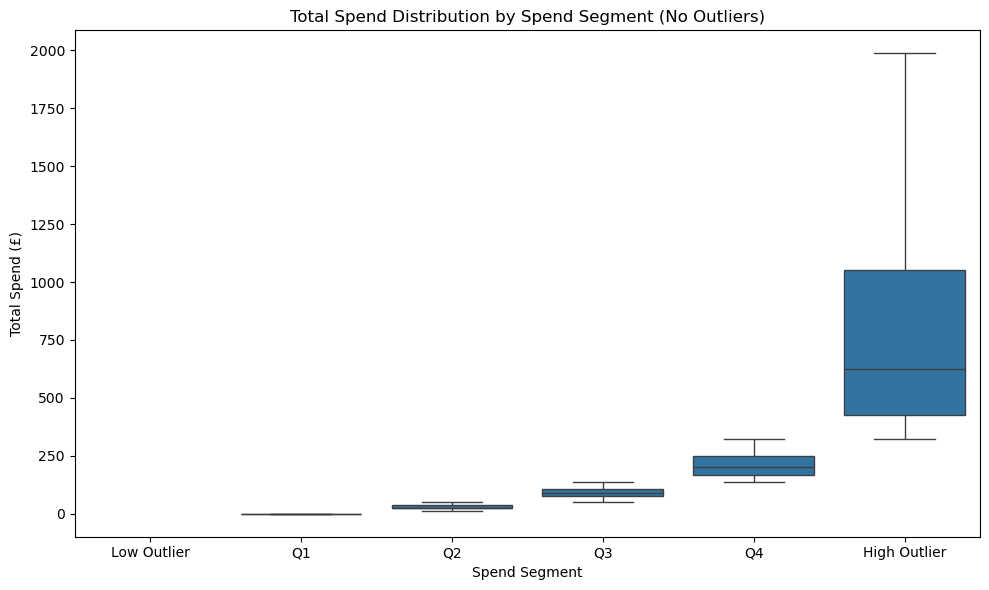

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='spend_segment', y='total_spend', showfliers=False)
plt.title('Total Spend Distribution by Spend Segment (No Outliers)')
plt.xlabel('Spend Segment')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()


### Total spenddistribution by psend segments (quartiles) No OUTLIERS no category outliers

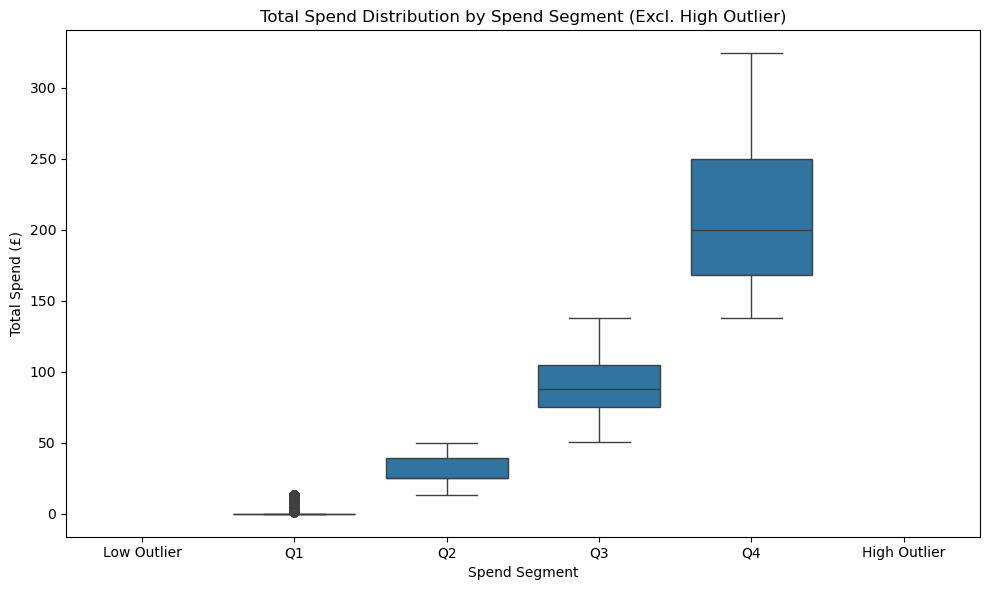

In [86]:


# Filter out High Outliers
filtered_data = data[data['spend_segment'] != 'High Outlier']

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='spend_segment', y='total_spend')
plt.title('Total Spend Distribution by Spend Segment (Excl. High Outlier)')
plt.xlabel('Spend Segment')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()


# SPEND BY QUARTILE SEGMENT + CATEGORIES

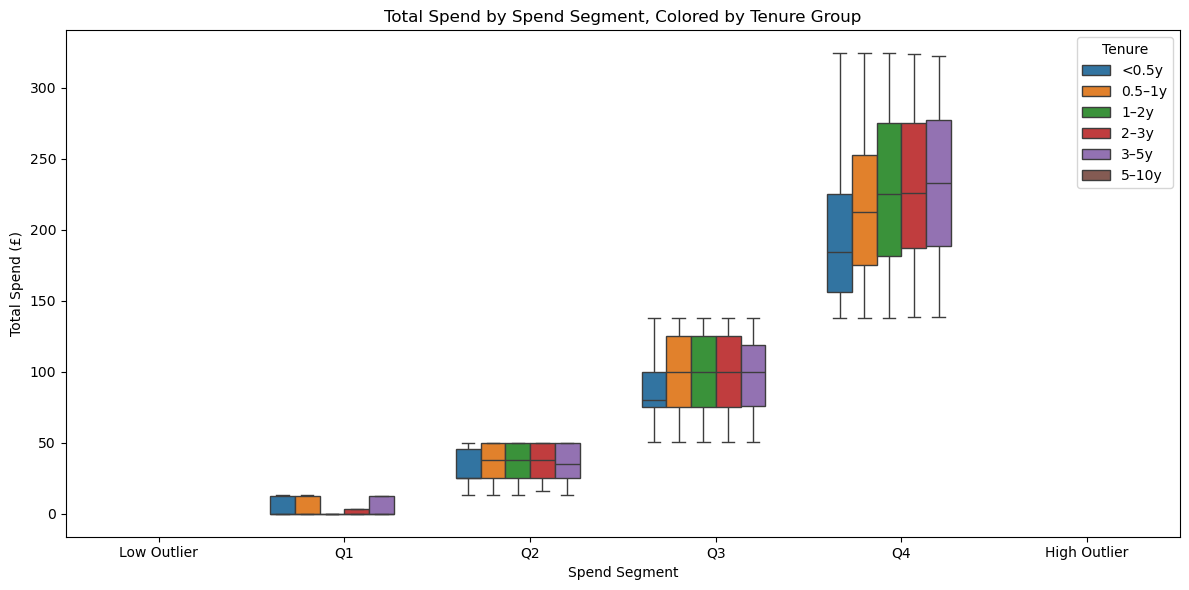

In [87]:
# Filter out 'High Outlier' to clean up view
filtered_data = data[data['spend_segment'] != 'High Outlier'].copy()

# Bin tenure_years into categories
filtered_data['tenure_group'] = pd.cut(
    filtered_data['tenure_years'],
    bins=[0, 0.5, 1, 2, 3, 5, 10],
    labels=['<0.5y', '0.5–1y', '1–2y', '2–3y', '3–5y', '5–10y']
)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_data,
    x='spend_segment',
    y='total_spend',
    hue='tenure_group',
    showfliers=False
)
plt.title('Total Spend by Spend Segment, Colored by Tenure Group')
plt.xlabel('Spend Segment')
plt.ylabel('Total Spend (£)')
plt.legend(title='Tenure')
plt.tight_layout()
plt.show()


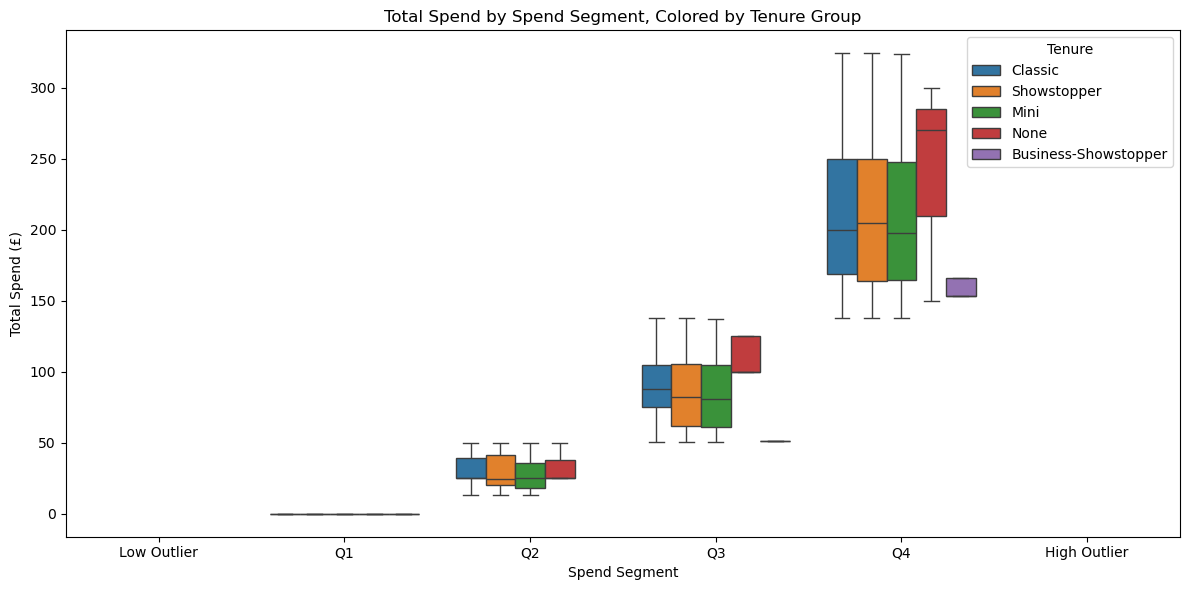

In [88]:
# Filter out 'High Outlier' to clean up view
filtered_data = data[data['spend_segment'] != 'High Outlier'].copy()

# Bin tenure_years into categories
filtered_data['tenure_group'] = pd.cut(
    filtered_data['tenure_years'],
    bins=[0, 0.5, 1, 2, 3, 5, 10],
    labels=['<0.5y', '0.5–1y', '1–2y', '2–3y', '3–5y', '5–10y']
)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_data,
    x='spend_segment',
    y='total_spend',
    hue='original_product_tier',
    showfliers=False
)
plt.title('Total Spend by Spend Segment, Colored by Tenure Group')
plt.xlabel('Spend Segment')
plt.ylabel('Total Spend (£)')
plt.legend(title='Tenure')
plt.tight_layout()
plt.show()

# High Outliers Breakdown

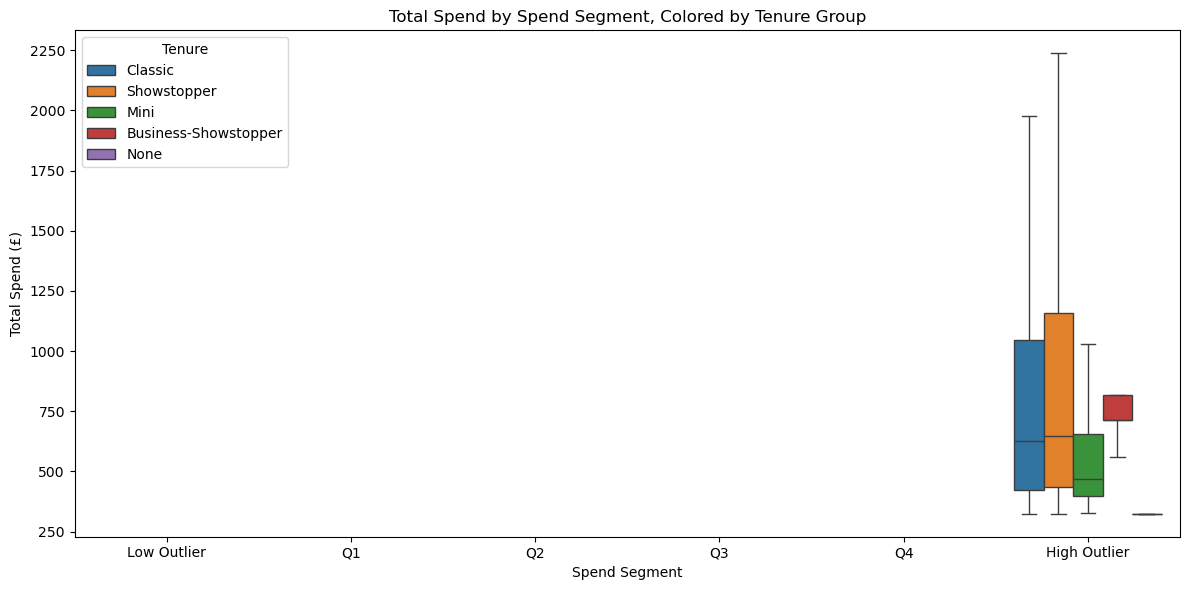

In [90]:
# Filter out 'High Outlier' to clean up view
filtered_data = data[data['spend_segment'] == 'High Outlier'].copy()

# Bin tenure_years into categories
filtered_data['tenure_group'] = pd.cut(
    filtered_data['tenure_years'],
    bins=[0, 0.5, 1, 2, 3, 5, 10],
    labels=['<0.5y', '0.5–1y', '1–2y', '2–3y', '3–5y', '5–10y']
)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_data,
    x='spend_segment',
    y='total_spend',
    hue='original_product_tier',
    showfliers=False
)
plt.title('Total Spend by Spend Segment, Colored by Tenure Group')
plt.xlabel('Spend Segment')
plt.ylabel('Total Spend (£)')
plt.legend(title='Tenure')
plt.tight_layout()
plt.show()

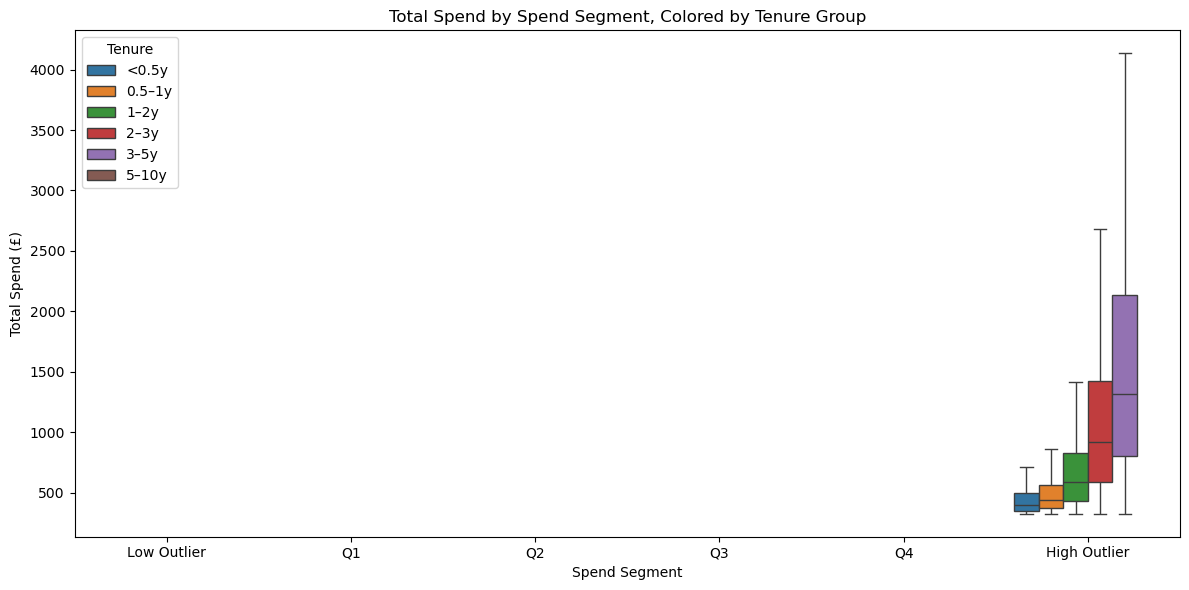

In [91]:
# Filter out 'High Outlier' to clean up view
filtered_data = data[data['spend_segment'] == 'High Outlier'].copy()

# Bin tenure_years into categories
filtered_data['tenure_group'] = pd.cut(
    filtered_data['tenure_years'],
    bins=[0, 0.5, 1, 2, 3, 5, 10],
    labels=['<0.5y', '0.5–1y', '1–2y', '2–3y', '3–5y', '5–10y']
)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_data,
    x='spend_segment',
    y='total_spend',
    hue='tenure_group',
    showfliers=False
)
plt.title('Total Spend by Spend Segment, Colored by Tenure Group')
plt.xlabel('Spend Segment')
plt.ylabel('Total Spend (£)')
plt.legend(title='Tenure')
plt.tight_layout()
plt.show()


In [92]:
data

market_code customer_id subscription_id subscription_start_date  \
0               UK     2287026          564953              2021-08-24   
1               UK     2646497          761192              2022-07-01   
2               UK     2577429          647982              2022-01-13   
3               UK     2685035          759259              2022-06-25   
4               UK     2481431          610650              2021-11-22   
...            ...         ...             ...                     ...   
552398          UK     2712424          799500              2022-12-18   
552399          UK     2639626          702038              2022-03-23   
552400          UK     2639911          702362              2022-03-23   
552401          UK     2639850          717743              2022-04-12   
552402          UK     2640365          930901              2024-11-01   

       subscription_cancellation_date postcode_sector  \
0                          2021-12-16            CA13   
1                          2022-08-02            NE31   
2                          2022-04-29            EX16   
3                          2023-05-15             SW8   
4                                 NaT            TW18   
...                               ...             ...   
552398                     2022-12-22             BS6   
552399                            NaT             WS4   
552400                     2022-06-16            KT24   
552401                     2022-06-15            SE22   
552402                     2024-11-28              N6   

       acquisition_master_channel acquisition_channel acquisition_coupon_code  \
0                         Organic             Organic               No Coupon   
1                         Organic             Organic               No Coupon   
2                        Paid Web            Facebook               NEWYEAR15   
3                    Direct Sales                 F2F               50FLOWERY   
4                             RAF                 RAF               ANDYW9971   
...                           ...                 ...                     ...   
552398                        RAF    RAF- Box Voucher                  R44EM9   
552399                   Paid Web           PPC Brand               50FLOWERY   
552400                   Paid Web           PPC Brand               50FLOWERY   
552401                    Organic             Organic               No Coupon   
552402                    Organic             Organic               No Coupon   

       restart_master_channel   restart_channel restart_coupon_code  \
0                    Restarts  Restart- Natural              R3X7H3   
1                    Restarts         No Coupon           No Coupon   
2               Not Restarted     Not Restarted           No Coupon   
3               Not Restarted     Not Restarted           No Coupon   
4               Not Restarted     Not Restarted           No Coupon   
...                       ...               ...                 ...   
552398          Not Restarted     Not Restarted           No Coupon   
552399          Not Restarted     Not Restarted           No Coupon   
552400          Not Restarted     Not Restarted           No Coupon   
552401          Not Restarted     Not Restarted           No Coupon   
552402               Restarts  Restart- Calling    RESTART40X20LONG   

        trip_number original_plan_frequency latest_plan_frequency  \
0                 2                  Weekly                Weekly   
1                 2             Fortnightly           Fortnightly   
2                 1             Fortnightly           Fortnightly   
3                 1                  Weekly               Monthly   
4                 1                  Weekly           Fortnightly   
...             ...                     ...                   ...   
552398            1                3 Weekly              3 Weekly   
552399            1             Fortnightly           F

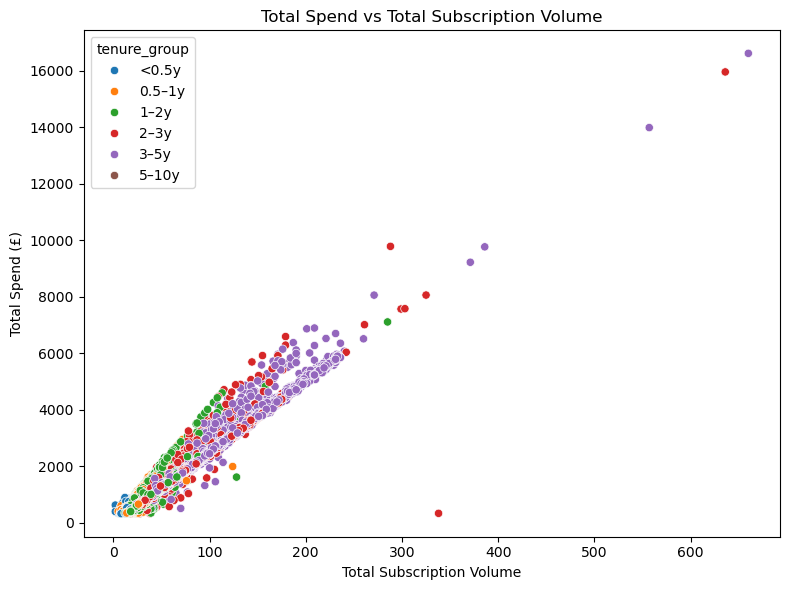

In [93]:
# Filter out 'High Outlier' to clean up view
filtered_data = data[data['spend_segment'] == 'High Outlier'].copy()

# Bin tenure_years into categories
filtered_data['tenure_group'] = pd.cut(
    filtered_data['tenure_years'],
    bins=[0, 0.5, 1, 2, 3, 5, 10],
    labels=['<0.5y', '0.5–1y', '1–2y', '2–3y', '3–5y', '5–10y']
)


plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=filtered_data,
    x='total_volume_sub',
    y='total_spend',
    hue = 'tenure_group'
)
plt.title('Total Spend vs Total Subscription Volume')
plt.xlabel('Total Subscription Volume')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_13048\1269356029.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


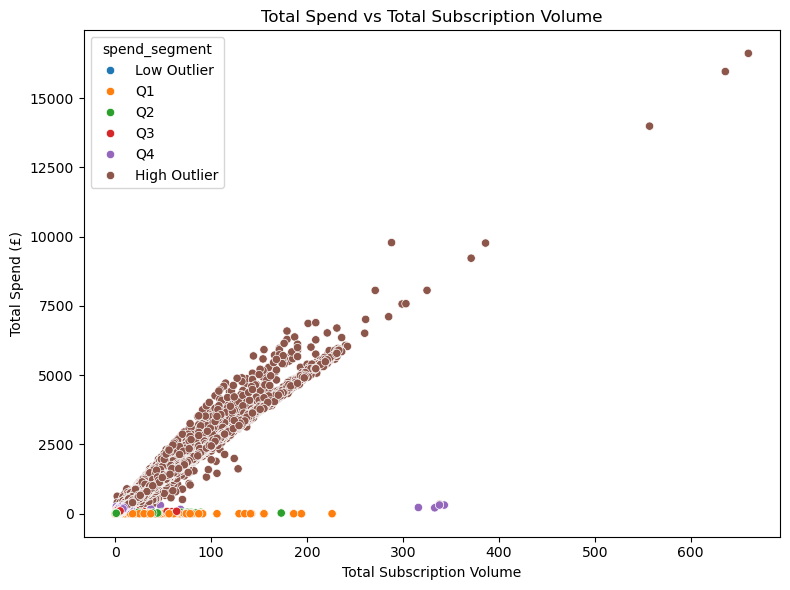

In [94]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='total_volume_sub',
    y='total_spend',
    hue = 'spend_segment'
)
plt.title('Total Spend vs Total Subscription Volume')
plt.xlabel('Total Subscription Volume')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_13048\1804826347.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


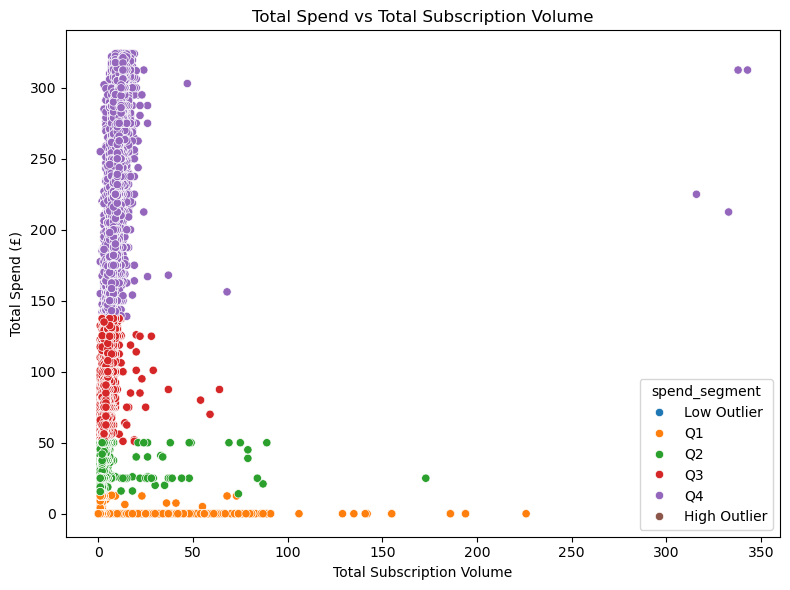

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data[data['spend_segment'] != 'High Outlier'],  # filter out
    x='total_volume_sub',
    y='total_spend',
    hue='spend_segment'
)
plt.title('Total Spend vs Total Subscription Volume')
plt.xlabel('Total Subscription Volume')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()


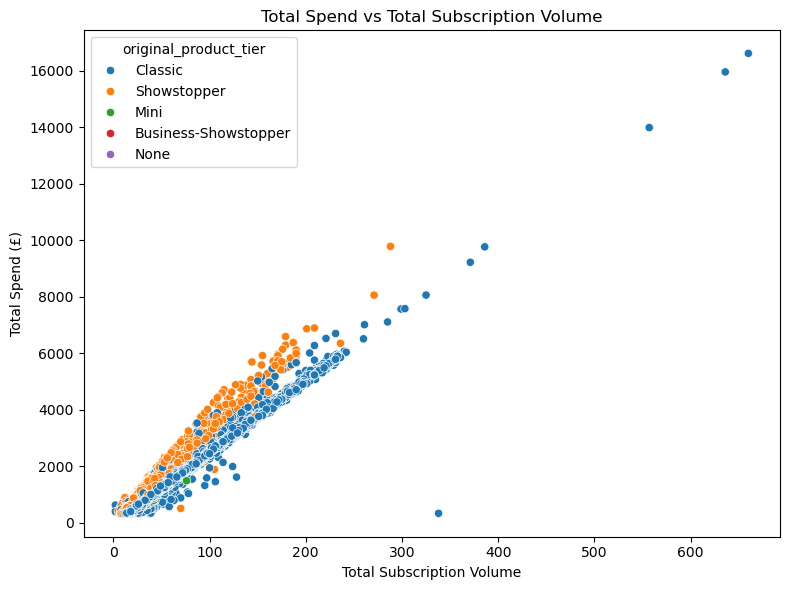

In [96]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data[data['spend_segment'] == 'High Outlier'],  # filter out
    x='total_volume_sub',
    y='total_spend',
    hue='original_product_tier'
)
plt.title('Total Spend vs Total Subscription Volume')
plt.xlabel('Total Subscription Volume')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()

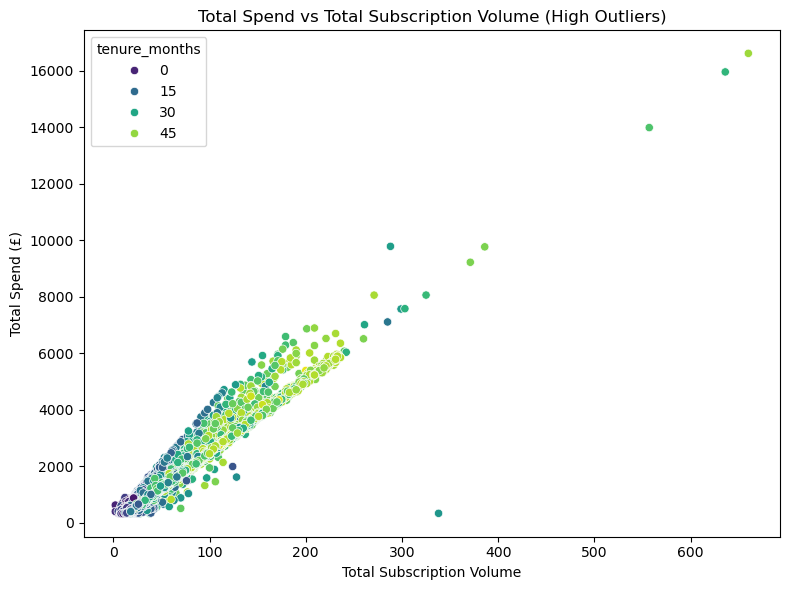

In [97]:
plt.close()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data[data['spend_segment'] == 'High Outlier'],
    x='total_volume_sub',
    y='total_spend',
    hue='tenure_months',
    palette='viridis'
)
plt.title('Total Spend vs Total Subscription Volume (High Outliers)')
plt.xlabel('Total Subscription Volume')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()



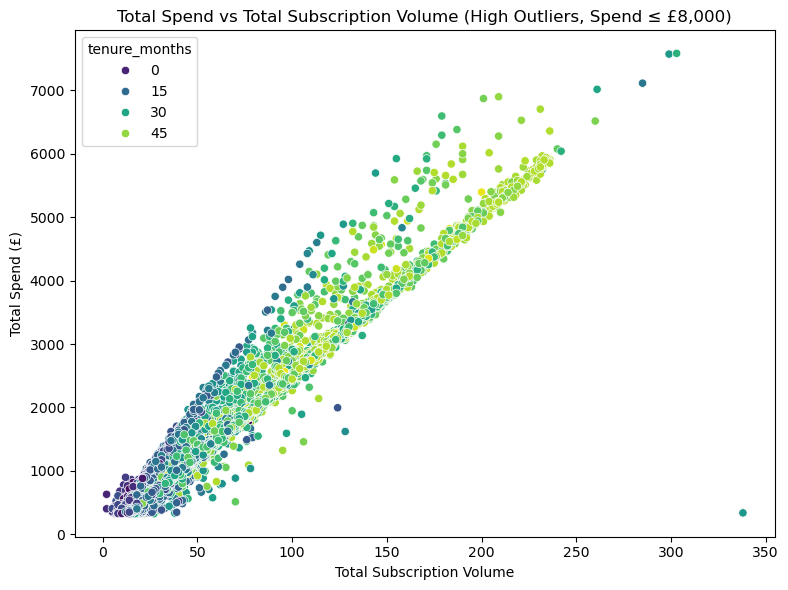

In [98]:
plt.close()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data[(data['spend_segment'] == 'High Outlier') & (data['total_spend'] <= 8000)],
    x='total_volume_sub',
    y='total_spend',
    hue='tenure_months',
    palette='viridis'
)
plt.title('Total Spend vs Total Subscription Volume (High Outliers, Spend ≤ £8,000)')
plt.xlabel('Total Subscription Volume')

plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()


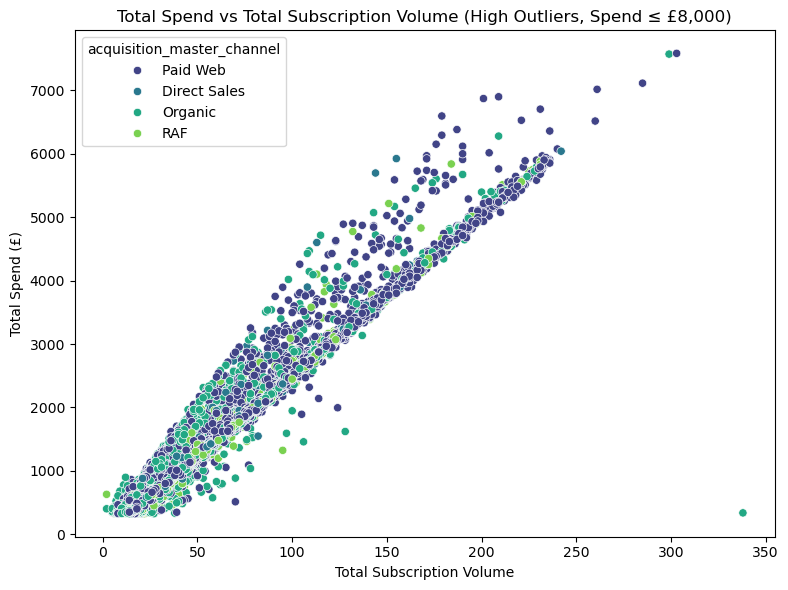

In [99]:

plt.close()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data[(data['spend_segment'] == 'High Outlier') & (data['total_spend'] <= 8000)],
    x='total_volume_sub',
    y='total_spend',
    hue='acquisition_master_channel',
    palette='viridis'
)
plt.title('Total Spend vs Total Subscription Volume (High Outliers, Spend ≤ £8,000)')
plt.xlabel('Total Subscription Volume')
plt.ylabel('Total Spend (£)')
plt.tight_layout()
plt.show()








In [100]:
import os
os.getcwd()


'C:\\Users\\andre\\Documents\\git\\Employer_Project\\Eddie-s-Flowers'

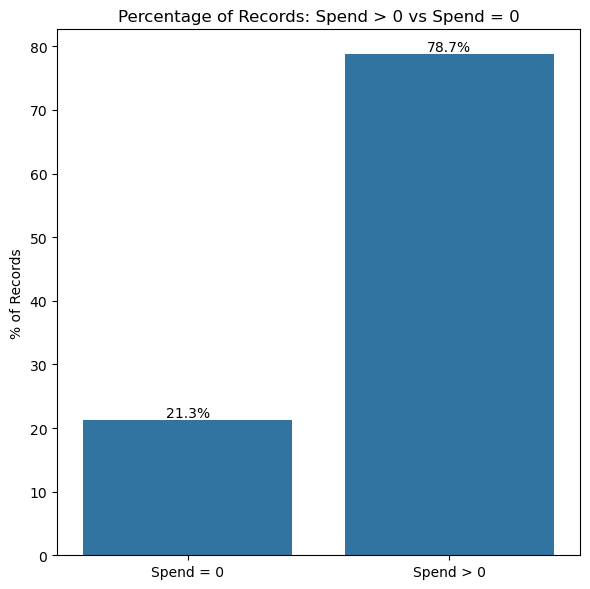

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a flag column
data['Spend_Flag'] = data['total_spend'].apply(lambda x: 'Spend > 0' if x > 0 else 'Spend = 0')

# Calculate percentage of each category
percent_df = (
    data.groupby('Spend_Flag')
    .size()
    .reset_index(name='Count')
)
percent_df['Percent'] = (percent_df['Count'] / percent_df['Count'].sum()) * 100

# Plot
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=percent_df, x='Spend_Flag', y='Percent', errorbar=None)

# Add labels on bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"{p.get_height():.1f}%",
        ha='center', va='bottom'
    )

plt.title('Percentage of Records: Spend > 0 vs Spend = 0')
plt.ylabel('% of Records')
plt.xlabel('')
plt.tight_layout()
plt.show()



In [173]:
# TENURE